<a href="https://colab.research.google.com/github/anonymous0897/ICML_Draft/blob/main/Fine_Tuning_Heart_Disease_Performance_Compiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fine-Tuning for Predicting Heart Disease Risk (Performance Compiler):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter



from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
# !pip install pytorch-tabnet

# from pytorch_tabnet.tab_model import TabNetClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Data taken from the UCI Machine Learning repository [here](https://doi.org/10.24432/C53919):

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)



In [4]:
data = cdc_diabetes_health_indicators.data
# data (as pandas dataframes)
X = data.features
y = data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [5]:
X.iloc[:,6]

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    0
253677    0
253678    0
253679    1
Name: HeartDiseaseorAttack, Length: 253680, dtype: int64

In [6]:
## Scaling the predictive data

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [7]:
data2 = pd.concat([X_scaled, y], axis=1)
data2

0    1    2         3    4    5    6    7    8    9  ...   12    13  \
0       1.0  1.0  1.0  0.325581  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.00   
1       0.0  0.0  0.0  0.151163  1.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.50   
2       1.0  1.0  1.0  0.186047  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.00   
3       1.0  0.0  1.0  0.174419  0.0  0.0  0.0  1.0  1.0  1.0  ...  0.0  0.25   
4       1.0  1.0  1.0  0.139535  0.0  0.0  0.0  1.0  1.0  1.0  ...  0.0  0.25   
...     ...  ...  ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
253675  1.0  1.0  1.0  0.383721  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.50   
253676  1.0  1.0  1.0  0.069767  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.75   
253677  0.0  0.0  1.0  0.186047  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  0.00   
253678  1.0  0.0  1.0  0.127907  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.50   
253679  1.0  1.0  1.0  0.151163  0.0  0.0  1.0  1.0  1.0  0.0  ...  0.0  0.25   

         14        15   16   17        18   19        20  Diabetes_binary  
0       0.6  0.500000  1.0  0.0  0.666667  0.6  0.285714                0  
1       0.0  0.000000  0.0  0.0  0.500000  1.0  0.000000                0  
2       1.0  1.000000  1.0  0.0  0.666667  0.6  1.000000                0  
3       0.0  0.000000  0.0  0.0  0.833333  0.4  0.714286                0  
4       0.1  0.000000  0.0  0.0  0.833333  0.8  0.428571                0  
...     ...       ...  ...  ...       ...  ...       ...              ...  
253675  0.0  0.166667  0.0  1.0  0.333333  1.0  0.857143                0  
253676  0.0  0.000000  1.0  0.0  0.833333  0.2  0.428571                1  
253677  0.0  0.000000  0.0  0.0  0.083333  0.8  0.142857                0  
253678  0.0  0.000000  0.0  1.0  0.500000  0.8  0.000000                0  
253679  0.0  0.000000  0.0  0.0  0.666667  1.0  0.142857                1  

[253680 rows x 22 columns]

In [8]:
y.value_counts()

Diabetes_binary
0                  218334
1                   35346
Name: count, dtype: int64

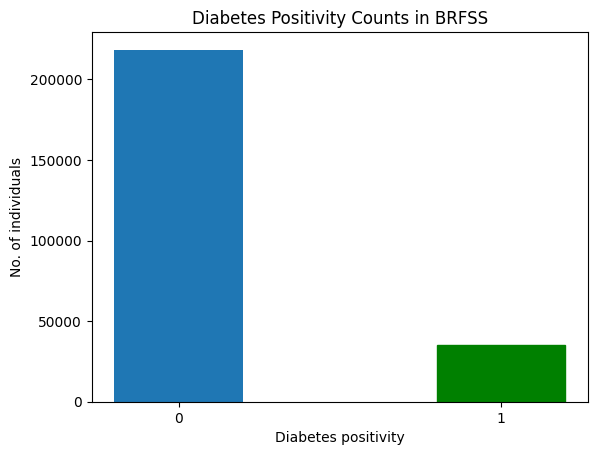

In [9]:
barlist = plt.bar([str(0),str(1)], y.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS")
plt.show()

# Splitting for Source and Target Domains:


# Full Dataset:

For the Heart Disease prediction, we split the dataset between low education level (**now including high-school dropouts**) and the high education level. The high-education data (with diabetes as response variable/label) becomes the source data and the low-education data (with Heart Disease as response variable/label) is the target data.

In [10]:
data_S = data2[data2[19] >= 0.5]  ## Source domain and classification
data_S_X = data_S.drop(data_S.columns[[6, 21]], axis=1)
data_S_y = data_S.iloc[:, 21]    ## Response variable of interest is Diabetes

data_S_full = pd.concat([data_S_X, data_S_y], axis=1)

data_T = data2[data2[19] < 0.5]

data_T_X = data_T.drop(data_T.columns[[6, 21]], axis=1)
data_T_y = data_T.iloc[:, 6]    ## Response variable of interest in Heart Disease

data_T_full = pd.concat([data_T_X, data_T_y], axis=1)

In [11]:
data_T_full

0    1    2         3    4    5    7    8    9    10  ...   12    13  \
3       1.0  0.0  1.0  0.174419  0.0  0.0  1.0  1.0  1.0  0.0  ...  0.0  0.25   
21      1.0  1.0  1.0  0.302326  1.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  1.00   
27      1.0  1.0  1.0  0.186047  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.75   
31      1.0  0.0  1.0  0.244186  1.0  0.0  1.0  1.0  1.0  0.0  ...  0.0  0.00   
34      1.0  1.0  1.0  0.139535  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.25   
...     ...  ...  ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
253668  0.0  1.0  1.0  0.197674  1.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  0.25   
253669  0.0  1.0  1.0  0.174419  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.00   
253671  1.0  1.0  1.0  0.127907  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.75   
253672  1.0  0.0  1.0  0.209302  1.0  0.0  1.0  1.0  1.0  0.0  ...  0.0  0.50   
253676  1.0  1.0  1.0  0.069767  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.75   

         14        15   16   17        18   19        20   6   
3       0.0  0.000000  0.0  0.0  0.833333  0.4  0.714286  0.0  
21      0.5  1.000000  1.0  0.0  1.000000  0.2  0.285714  0.0  
27      0.0  0.000000  0.0  1.0  0.916667  0.2  0.428571  1.0  
31      0.0  0.000000  1.0  1.0  1.000000  0.4  0.285714  0.0  
34      0.0  0.000000  0.0  0.0  0.916667  0.4  0.285714  0.0  
...     ...       ...  ...  ...       ...  ...       ...  ...  
253668  0.0  0.000000  1.0  1.0  0.750000  0.4  0.714286  1.0  
253669  0.0  0.100000  0.0  1.0  0.416667  0.2  0.428571  0.0  
253671  0.0  0.166667  0.0  1.0  0.583333  0.4  0.142857  1.0  
253672  0.0  0.000000  0.0  1.0  0.916667  0.2  0.000000  1.0  
253676  0.0  0.000000  1.0  0.0  0.833333  0.2  0.428571  0.0  

[13695 rows x 21 columns]

## Source domain and task labels:

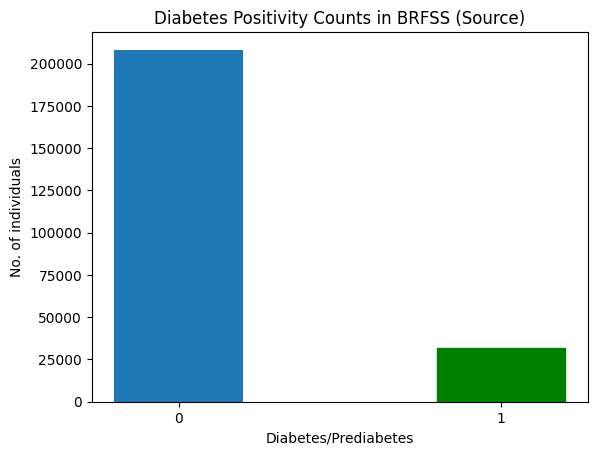

In [12]:
barlist_S = plt.bar([str(0),str(1)], data_S_y.value_counts(), width = 0.4)
barlist_S[1].set_color('g')

plt.xlabel("Diabetes/Prediabetes")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Source)")
plt.show()

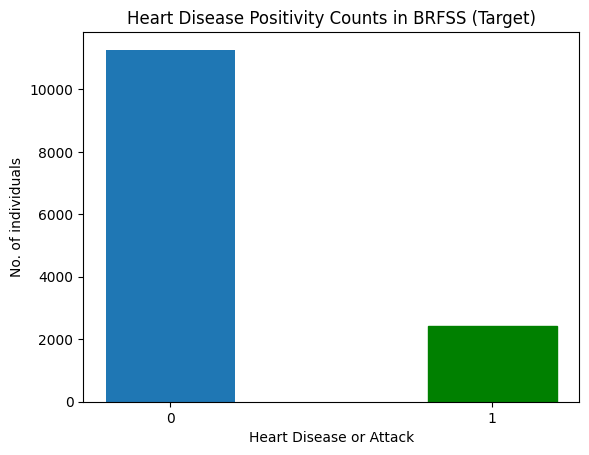

In [13]:
barlist_T = plt.bar([str(0),str(1)], data_T_y.value_counts(), width = 0.4)
barlist_T[1].set_color('g')

plt.xlabel("Heart Disease or Attack")
plt.ylabel("No. of individuals")
plt.title("Heart Disease Positivity Counts in BRFSS (Target)")
plt.show()

## DNN and Fine-tuning Algorithms:

In [14]:
def create_dnn_model(input_shape):
  model = models.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no diabetes)
    ])
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

  model.summary()
  print(len(model.layers))

  return model

# def create_dnn_model(input_shape):
#   model = models.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
#         layers.Dense(32, activation='relu'),
#         layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no diabetes)
#     ])

#   model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

#   return model



def train_and_evaluate(model, X_train, X_test, y_train, y_test, domain):

    time_start = perf_counter()

    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # Plot ROC curve and Confusion Matrix side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # ROC Curve
    ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax1.legend(loc='lower right')
    ax1.grid()

    # Confusion Matrix
    conf_disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")

    time_stop = perf_counter()

    print('Time elapsed (performance):', time_stop-time_start)

    model.save('model.h5')
    model.save_weights('model_wt.weights.h5')

    return model


In [15]:
def train_and_evaluate_nosave(model, X_train, X_test, y_train, y_test, domain):

    time_start = perf_counter()

    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    fpr = conf_matrix[0][1]/(conf_matrix[0][0]+conf_matrix[0][1])
    fnr = conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[1][1])

    print(fpr)
    print(fnr)

    time_stop = perf_counter()

    print('Time elapsed (performance):', time_stop-time_start)

    return fpr, fnr


In [16]:
def fine_tuning(X_train, X_test, y_train, y_test, llim, ulim):
    new_model = create_dnn_model(X_S_train.shape[1])
    # new_model = tf.keras.models.load_model('model.h5')
    new_model.load_weights('model_wt.weights.h5')

    for layer in new_model.layers[llim:ulim]:
        layer.trainable = False
    for layer in new_model.layers[-1:]:
        layer.trainable = False

    for layer in new_model.layers:
        if layer.trainable == True:
          print("Trainable")
        else:
          print("Not Trainable")

    fpr, fnr = train_and_evaluate_nosave(new_model, X_train, X_test, y_train, y_test, "Target")
    return fpr, fnr

In [17]:
def Transductive_TL(model, X_test, y_test, domain):

    time_start = perf_counter()

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # Plot ROC curve and Confusion Matrix side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # ROC Curve
    ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax1.legend(loc='lower right')
    ax1.grid()

    # Confusion Matrix
    # print('Confusion matrix:', conf_matrix)
    fpr = conf_matrix[0][1]/(conf_matrix[0][0]+conf_matrix[0][1])
    tnr = 1-fpr

    fnr = conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[1][1])
    tpr = 1 - fnr
    print('FPR', fpr, 'TPR:', tpr, 'FNR:', fnr, 'TNR:', tnr)
    conf_disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")
    print('False Negative Rate:', fnr)

    time_stop = perf_counter()

    print('Time elapsed (performance):', time_stop-time_start)

# Over/undersampling functions:

## Undersampling functions:

In [18]:
import random

def SRS_undersampler(data, data_column):
    data_majority = data[data_column.isin([0])]
    data_minority = data[data_column.isin([1])]
    undersample_size = len(data_minority)
    oversample_size = len(data_majority)

    print(undersample_size)
    print(oversample_size)

    np.random.seed(123)
    data_maj_rus = data_majority.sample(n=undersample_size, replace=False)
    data_SRS_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRS = data_SRS_RUS.iloc[:, :20]
    y_SRS = data_SRS_RUS.iloc[:, 20]

    return X_SRS, y_SRS


def SRSwR_undersampler(data, data_column):
    data_majority = data[data_column.isin([0])]
    data_minority = data[data_column.isin([1])]
    undersample_size = len(data_minority)
    oversample_size = len(data_majority)

    print(undersample_size)
    print(oversample_size)

    np.random.seed(123)
    data_maj_rus = data_majority.sample(n=undersample_size, replace=True)
    data_SRS_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRS = data_SRS_RUS.iloc[:, :20]
    y_SRS = data_SRS_RUS.iloc[:, 20]

    return X_SRS, y_SRS


def systematic_undersampler(data, data_column):
    data_majority = data[data_column.isin([0])]
    data_minority = data[data_column.isin([1])]
    undersample_size = len(data_minority)
    oversample_size = len(data_majority)
    print(undersample_size)
    print(oversample_size)

    k = oversample_size/undersample_size
    print(k)
    np.random.seed(123)
    start = random.randint(1, int(k))
    print(start)
    Row = []
    for i in range(undersample_size):
      row = start+int(k*i)-1
      Row.append(row)
    # print(Row)
    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]
    data_maj_rus
    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])

    X_Sy = data_Sy_RUS.iloc[:, :20]
    y_Sy = data_Sy_RUS.iloc[:, 20]

    return X_Sy, y_Sy



def multi_systematic_undersampler(data, data_column, m):
    data_majority = data[data_column.isin([0])]
    data_minority = data[data_column.isin([1])]
    undersample_size = len(data_minority)
    oversample_size = len(data_majority)
    print(undersample_size)
    print(oversample_size)

    k = oversample_size/undersample_size
    print(k)
    np.random.seed(123)
    start = random.sample(range(1, int(k*m)), m)
    Row = []
    for j in range(len(start)):
      for i in range(int(undersample_size/m)):
        row = start[j]+int(k*i)-1
        Row.append(row)
    # print(Row)
    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]
    data_maj_rus
    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])

    X_Sy = data_Sy_RUS.iloc[:, :20]
    y_Sy = data_Sy_RUS.iloc[:, 20]

    return X_Sy, y_Sy

## Oversampling functions:

In [19]:
def SRSwR_oversampler(data, data_column):
    data_majority = data[data_column.isin([0])]
    data_minority = data[data_column.isin([1])]
    undersample_size = len(data_minority)
    oversample_size = len(data_majority)

    print(undersample_size)
    print(oversample_size)

    np.random.seed(123)
    data_min_ros = data_minority.sample(n=oversample_size - undersample_size, replace=True)
    data_SRS_ROS = pd.concat([data_majority, data_minority, data_min_ros])
    X_SRS = data_SRS_ROS.iloc[:, :20]
    y_SRS = data_SRS_ROS.iloc[:, 20]

    return X_SRS, y_SRS

# data_S_min_ros = data_S_minority.sample(n=oversample_size - undersample_size, replace=True)


def systematic_resampler(data, data_column, k):
    data_majority = data[data_column.isin([0])]
    data_minority = data[data_column.isin([1])]
    undersample_size = len(data_minority)
    oversample_size = len(data_majority)

    print(undersample_size)
    print(oversample_size)

    Nsamples = k*(oversample_size-undersample_size)/undersample_size
    print('Nsamples=', Nsamples)

    np.random.seed(123)
    start = np.random.choice(int(k), int(Nsamples), replace=True)
    Row = []
    for j in range(len(start)):
      for i in range(int(undersample_size/k)):
        row = start[j]+int(k*i)-1
        Row.append(row)
    data_min_ros = pd.DataFrame()
    data_min_ros = data_minority.iloc[Row]

    data_Sy_ROS = pd.concat([data_majority, data_minority, data_min_ros])
    X_Sy = data_Sy_ROS.iloc[:, :20]
    y_Sy = data_Sy_ROS.iloc[:, 20]

    return X_Sy, y_Sy


In [ ]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(data_S_X, data_S_y, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)

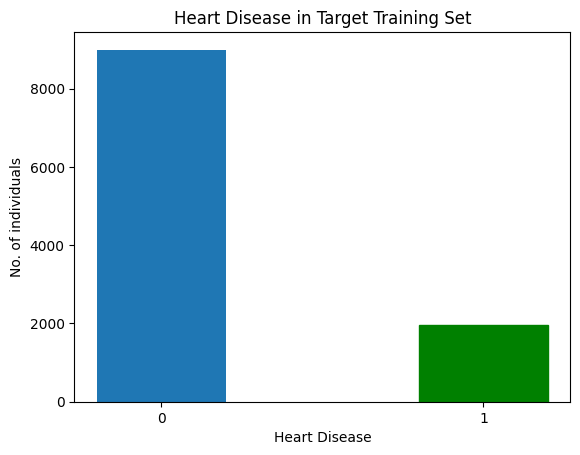

In [ ]:
barlist = plt.bar([str(0),str(1)], y_T_train.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Heart Disease")
plt.ylabel("No. of individuals")
plt.title("Heart Disease in Target Training Set")
plt.show()

In [ ]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (191988, 20)
y_S_train: (191988,)
X_S_test: (47997, 20)
y_S_test: (47997,)


# Original (Imbalanced) dataset:

## Standard Machine Learning:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.5890 - loss: 0.4834 - val_AUC: 0.7611 - val_loss: 0.4154
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7732 - loss: 0.3996 - val_AUC: 0.7646 - val_loss: 0.4134
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7810 - loss: 0.3886 - val_AUC: 0.7673 - val_loss: 0.4208
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7714 - loss: 0.3972 - val_AUC: 0.7673 - val_loss: 0.4149
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7959 - loss: 0.3800 - val_AUC: 0.7638 - val_loss: 0.4189
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7821 - loss: 0.3895 - val_AUC: 0.7628 - val_loss: 0.4146
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7894 - loss: 0.3875 - val_AUC: 0.7689 - val_loss: 0.4117
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7972 - loss: 0.3727 - val_AUC: 0.7684 - val_loss: 0.4130
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - 

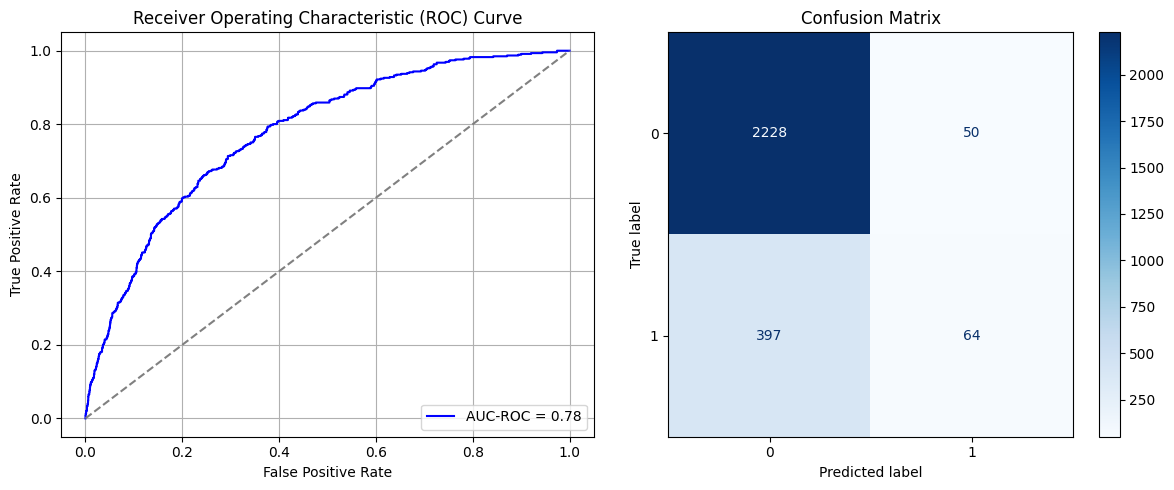

Best threshold based on F1-score: 0.2866060733795166
Time elapsed (performance): 15.421652762999997


<Sequential name=sequential, built=True>

In [ ]:
model_source = create_dnn_model(X_S_train.shape[1])
train_and_evaluate(model_source, X_T_train, X_T_test, y_T_train, y_T_test, "Target")

## With Transfer Learning:

In [ ]:
model_source = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - AUC: 0.7830 - loss: 0.3285 - val_AUC: 0.8204 - val_loss: 0.3170
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - AUC: 0.8183 - loss: 0.3079 - val_AUC: 0.8232 - val_loss: 0.3130
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - AUC: 0.8201 - loss: 0.3055 - val_AUC: 0.8243 - val_loss: 0.3112
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 48s 7ms/step - AUC: 0.8264 - loss: 0.3041 - val_AUC: 0.8248 - val_loss: 0.3135
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - AUC: 0.8257 - loss: 0.3028 - val_AUC: 0.8238 - val_loss: 0.3118
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - AUC: 0.8288 - loss: 0.3014 - val_AUC: 0.8248 - val_loss: 0.3117
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - AUC: 0.8279 - loss: 0.3047 - val_AUC: 0.8260 - val_loss: 0.3101
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - AUC: 0.8280 - loss: 0.3023 - val_AUC: 0.8242 - val_loss: 0.3124
Epoch 9/10
4800/4800 ━━━━━━━━━━━

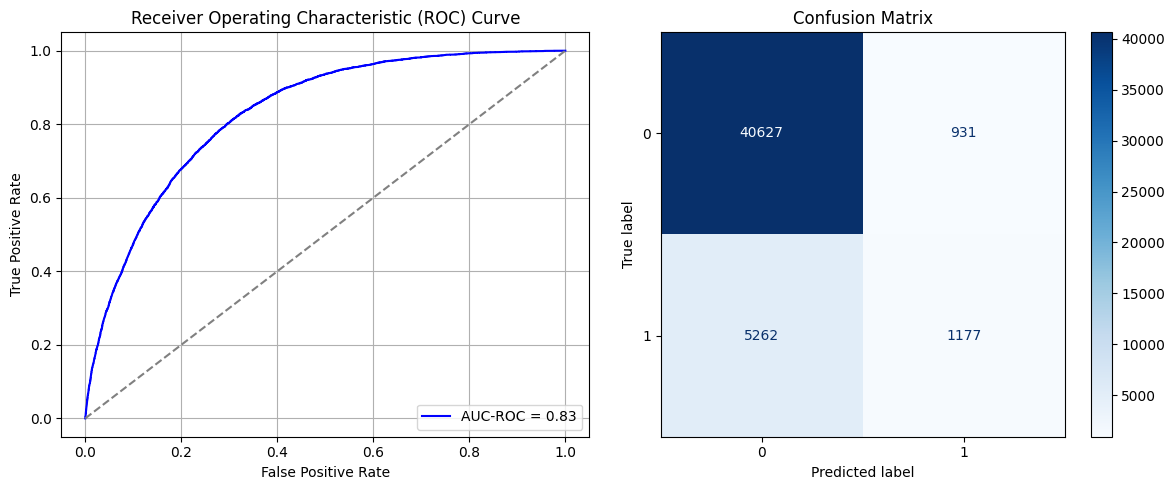

Best threshold based on F1-score: 0.22428856790065765
Time elapsed (performance): 279.372926092


<Sequential name=sequential_1, built=True>

In [ ]:
train_and_evaluate(model_source, X_S_train, X_S_test, y_S_train, y_S_test, "Source")
# model_source.save('model_source.h5')
# model_source.save_weights('model_wt.weights.h5')

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC-ROC: 0.7073945063504731
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      2278
         1.0       0.32      0.22      0.26       461

    accuracy                           0.79      2739
   macro avg       0.59      0.56      0.57      2739
weighted avg       0.76      0.79      0.77      2739

FPR 0.09350307287093942 TPR: 0.22125813449023857 FNR: 0.7787418655097614 TNR: 0.9064969271290606


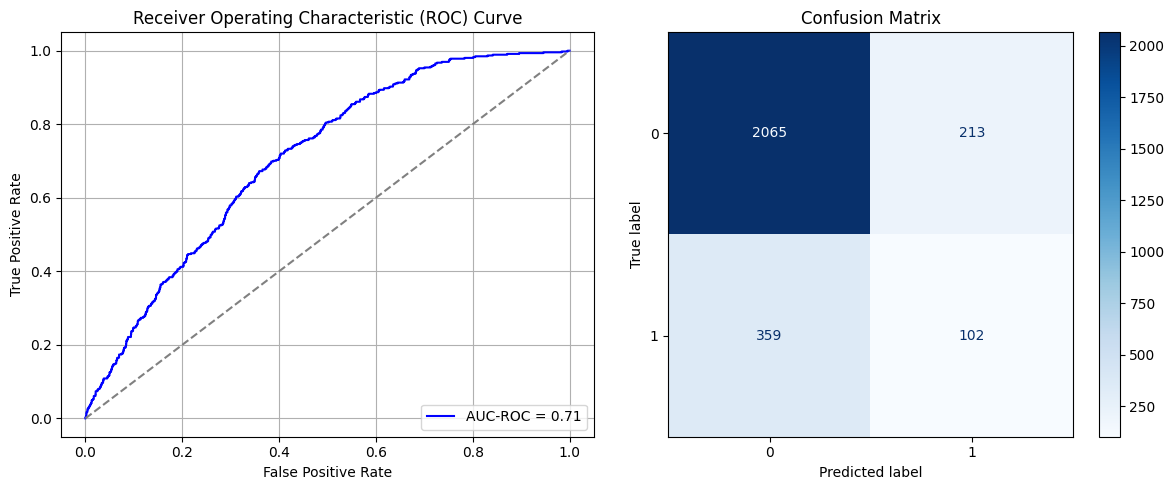

Best threshold based on F1-score: 0.8224024176597595
False Negative Rate: 0.7787418655097614
Time elapsed (performance): 0.9641859870000076


<ipython-input-16-de1f6cb50f3b>:54: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [ ]:
Transductive_TL(model_source, X_T_test, y_T_test, "Target")

In [ ]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7065 - loss: 0.4358 - val_AUC: 0.6831 - val_loss: 0.4488
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7123 - loss: 0.4224 - val_AUC: 0.6837 - val_loss: 0.4468
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7112 - loss: 0.4139 - val_AUC: 0.6845 - val_loss: 0.4446
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6965 - loss: 0.4229 - val_AUC: 0.6847 - val_loss: 0.4457
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7071 - loss: 0.4244 - val_AUC: 0.6860 - val_loss: 0.4441
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7039 - loss: 0.4291 - val_AUC: 0.6864 - val_loss: 0.4445
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7139 - loss: 0.4209 - val_AUC: 0.6867 - val_loss: 0.4437
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7152 - loss: 0.4283 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7076 - loss: 0.4402 - val_AUC: 0.6832 - val_loss: 0.4482
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7033 - loss: 0.4315 - val_AUC: 0.6835 - val_loss: 0.4479
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7081 - loss: 0.4256 - val_AUC: 0.6841 - val_loss: 0.4454
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7105 - loss: 0.4153 - val_AUC: 0.6847 - val_loss: 0.4445
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7102 - loss: 0.4235 - val_AUC: 0.6858 - val_loss: 0.4447
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7134 - loss: 0.4304 - val_AUC: 0.6866 - val_loss: 0.4442
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7188 - loss: 0.4274 - val_AUC: 0.6872 - val_loss: 0.4436
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7081 - loss: 0.4188 - val_AUC: 0.6879 - val_loss: 0.4435
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7111 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_119 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7150 - loss: 0.4374 - val_AUC: 0.6830 - val_loss: 0.4479
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7156 - loss: 0.4326 - val_AUC: 0.6841 - val_loss: 0.4453
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7071 - loss: 0.4220 - val_AUC: 0.6847 - val_loss: 0.4444
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7130 - loss: 0.4266 - val_AUC: 0.6863 - val_loss: 0.4434
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7153 - loss: 0.4154 - val_AUC: 0.6869 - val_loss: 0.4434
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7148 - loss: 0.4190 - val_AUC: 0.6874 - val_loss: 0.4445
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7079 - loss: 0.4317 - val_AUC: 0.6888 - val_loss: 0.4446
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7117 - loss: 0.4121 - val_AUC: 0.6908 - val_loss: 0.4412
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7075 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7071 - loss: 0.4358 - val_AUC: 0.6832 - val_loss: 0.4483
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7182 - loss: 0.4191 - val_AUC: 0.6839 - val_loss: 0.4452
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6989 - loss: 0.4299 - val_AUC: 0.6846 - val_loss: 0.4452
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7118 - loss: 0.4202 - val_AUC: 0.6852 - val_loss: 0.4445
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7073 - loss: 0.4196 - val_AUC: 0.6861 - val_loss: 0.4449
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7090 - loss: 0.4295 - val_AUC: 0.6866 - val_loss: 0.4443
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7191 - loss: 0.4225 - val_AUC: 0.6874 - val_loss: 0.4433
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7207 - loss: 0.4187 - val_AUC: 0.6891 - val_loss: 0.4429
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_133 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7023 - loss: 0.4431 - val_AUC: 0.6833 - val_loss: 0.4486
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7098 - loss: 0.4285 - val_AUC: 0.6842 - val_loss: 0.4466
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7062 - loss: 0.4161 - val_AUC: 0.6836 - val_loss: 0.4454
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7055 - loss: 0.4223 - val_AUC: 0.6848 - val_loss: 0.4448
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7150 - loss: 0.4204 - val_AUC: 0.6855 - val_loss: 0.4445
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7192 - loss: 0.4319 - val_AUC: 0.6855 - val_loss: 0.4454
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7167 - loss: 0.4140 - val_AUC: 0.6865 - val_loss: 0.4440
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7162 - loss: 0.4159 - val_AUC: 0.6871 - val_loss: 0.4435
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7102 - loss: 0.4413 - val_AUC: 0.6833 - val_loss: 0.4491
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7100 - loss: 0.4281 - val_AUC: 0.6839 - val_loss: 0.4458
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7176 - loss: 0.4219 - val_AUC: 0.6849 - val_loss: 0.4454
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7149 - loss: 0.4180 - val_AUC: 0.6845 - val_loss: 0.4444
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7192 - loss: 0.4217 - val_AUC: 0.6850 - val_loss: 0.4446
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7060 - loss: 0.4332 - val_AUC: 0.6856 - val_loss: 0.4459
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7095 - loss: 0.4206 - val_AUC: 0.6868 - val_loss: 0.4436
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7062 - loss: 0.4333 - val_AUC: 0.6871 - val_loss: 0.4453
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_147 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7185 - loss: 0.4284 - val_AUC: 0.6831 - val_loss: 0.4476
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6959 - loss: 0.4327 - val_AUC: 0.6835 - val_loss: 0.4462
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7028 - loss: 0.4245 - val_AUC: 0.6841 - val_loss: 0.4457
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6993 - loss: 0.4218 - val_AUC: 0.6844 - val_loss: 0.4446
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7105 - loss: 0.4153 - val_AUC: 0.6859 - val_loss: 0.4442
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6934 - loss: 0.4294 - val_AUC: 0.6860 - val_loss: 0.4462
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7031 - loss: 0.4223 - val_AUC: 0.6875 - val_loss: 0.4431
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7089 - loss: 0.4214 - val_AUC: 0.6878 - val_loss: 0.4433
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7219 -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_154 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7082 - loss: 0.4327 - val_AUC: 0.6831 - val_loss: 0.4476
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7076 - loss: 0.4183 - val_AUC: 0.6837 - val_loss: 0.4457
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7185 - loss: 0.4286 - val_AUC: 0.6842 - val_loss: 0.4457
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7072 - loss: 0.4179 - val_AUC: 0.6848 - val_loss: 0.4446
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7106 - loss: 0.4228 - val_AUC: 0.6856 - val_loss: 0.4455
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7243 - loss: 0.4129 - val_AUC: 0.6867 - val_loss: 0.4434
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7104 - loss: 0.4232 - val_AUC: 0.6878 - val_loss: 0.4427
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7191 - loss: 0.4193 - val_AUC: 0.6880 - val_loss: 0.4447
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7110 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_161 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7050 - loss: 0.4418 - val_AUC: 0.6833 - val_loss: 0.4482
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7008 - loss: 0.4363 - val_AUC: 0.6836 - val_loss: 0.4474
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7088 - loss: 0.4300 - val_AUC: 0.6843 - val_loss: 0.4448
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7030 - loss: 0.4270 - val_AUC: 0.6856 - val_loss: 0.4437
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7131 - loss: 0.4206 - val_AUC: 0.6865 - val_loss: 0.4439
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7034 - loss: 0.4250 - val_AUC: 0.6879 - val_loss: 0.4436
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6991 - loss: 0.4340 - val_AUC: 0.6893 - val_loss: 0.4426
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7122 - loss: 0.4251 - val_AUC: 0.6903 - val_loss: 0.4412
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_174 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7242 - loss: 0.4288 - val_AUC: 0.6831 - val_loss: 0.4482
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7040 - loss: 0.4252 - val_AUC: 0.6839 - val_loss: 0.4459
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7130 - loss: 0.4200 - val_AUC: 0.6847 - val_loss: 0.4446
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7137 - loss: 0.4203 - val_AUC: 0.6846 - val_loss: 0.4441
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7028 - loss: 0.4201 - val_AUC: 0.6865 - val_loss: 0.4444
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7155 - loss: 0.4214 - val_AUC: 0.6870 - val_loss: 0.4436
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7209 - loss: 0.4198 - val_AUC: 0.6880 - val_loss: 0.4427
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7158 - loss: 0.4237 - val_AUC: 0.6884 - val_loss: 0.4438
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_175 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7069 - loss: 0.4379 - val_AUC: 0.6832 - val_loss: 0.4484
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7014 - loss: 0.4345 - val_AUC: 0.6834 - val_loss: 0.4458
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7255 - loss: 0.4151 - val_AUC: 0.6846 - val_loss: 0.4449
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7038 - loss: 0.4261 - val_AUC: 0.6849 - val_loss: 0.4444
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7087 - loss: 0.4195 - val_AUC: 0.6858 - val_loss: 0.4441
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7239 - loss: 0.4122 - val_AUC: 0.6870 - val_loss: 0.4435
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7175 - loss: 0.4206 - val_AUC: 0.6877 - val_loss: 0.4429
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7087 - loss: 0.4248 - val_AUC: 0.6889 - val_loss: 0.4424
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_182 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_186 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7062 - loss: 0.4331 - val_AUC: 0.6831 - val_loss: 0.4485
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7045 - loss: 0.4275 - val_AUC: 0.6839 - val_loss: 0.4459
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7124 - loss: 0.4184 - val_AUC: 0.6841 - val_loss: 0.4453
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7111 - loss: 0.4270 - val_AUC: 0.6850 - val_loss: 0.4453
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7086 - loss: 0.4323 - val_AUC: 0.6854 - val_loss: 0.4449
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7160 - loss: 0.4202 - val_AUC: 0.6853 - val_loss: 0.4443
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7220 - loss: 0.4262 - val_AUC: 0.6860 - val_loss: 0.4441
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7169 - loss: 0.4251 - val_AUC: 0.6873 - val_loss: 0.4434
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_189 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_190 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_193 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_194 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_195 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7083 - loss: 0.4373 - val_AUC: 0.6831 - val_loss: 0.4493
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7060 - loss: 0.4329 - val_AUC: 0.6837 - val_loss: 0.4463
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7013 - loss: 0.4104 - val_AUC: 0.6842 - val_loss: 0.4450
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7116 - loss: 0.4252 - val_AUC: 0.6849 - val_loss: 0.4451
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7128 - loss: 0.4273 - val_AUC: 0.6856 - val_loss: 0.4440
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7125 - loss: 0.4213 - val_AUC: 0.6866 - val_loss: 0.4457
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7128 - loss: 0.4222 - val_AUC: 0.6876 - val_loss: 0.4435
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7288 - loss: 0.4101 - val_AUC: 0.6889 - val_loss: 0.4426
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_196 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_198 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_200 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_202 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7105 - loss: 0.4368 - val_AUC: 0.6834 - val_loss: 0.4476
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7103 - loss: 0.4337 - val_AUC: 0.6835 - val_loss: 0.4460
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7135 - loss: 0.4238 - val_AUC: 0.6840 - val_loss: 0.4458
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7065 - loss: 0.4240 - val_AUC: 0.6850 - val_loss: 0.4457
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7086 - loss: 0.4144 - val_AUC: 0.6851 - val_loss: 0.4435
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7057 - loss: 0.4309 - val_AUC: 0.6868 - val_loss: 0.4443
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7109 - loss: 0.4135 - val_AUC: 0.6871 - val_loss: 0.4433
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7095 - loss: 0.4247 - val_AUC: 0.6882 - val_loss: 0.4431
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7192 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_203 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_204 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_205 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_206 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_207 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_208 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_209 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7119 - loss: 0.4392 - val_AUC: 0.6831 - val_loss: 0.4477
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7193 - loss: 0.4112 - val_AUC: 0.6843 - val_loss: 0.4455
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7001 - loss: 0.4324 - val_AUC: 0.6840 - val_loss: 0.4461
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7133 - loss: 0.4183 - val_AUC: 0.6846 - val_loss: 0.4451
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7086 - loss: 0.4230 - val_AUC: 0.6853 - val_loss: 0.4440
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6984 - loss: 0.4309 - val_AUC: 0.6857 - val_loss: 0.4442
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7213 - loss: 0.4223 - val_AUC: 0.6868 - val_loss: 0.4439
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7042 - loss: 0.4172 - val_AUC: 0.6874 - val_loss: 0.4436
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_210 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_211 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_212 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_213 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_214 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_215 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_216 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7030 - loss: 0.4419 - val_AUC: 0.6830 - val_loss: 0.4485
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7156 - loss: 0.4224 - val_AUC: 0.6835 - val_loss: 0.4461
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7002 - loss: 0.4340 - val_AUC: 0.6846 - val_loss: 0.4459
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7097 - loss: 0.4153 - val_AUC: 0.6848 - val_loss: 0.4445
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7035 - loss: 0.4275 - val_AUC: 0.6852 - val_loss: 0.4453
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6944 - loss: 0.4276 - val_AUC: 0.6859 - val_loss: 0.4455
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7156 - loss: 0.4248 - val_AUC: 0.6870 - val_loss: 0.4439
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7091 - loss: 0.4185 - val_AUC: 0.6877 - val_loss: 0.4439
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7214 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_217 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_218 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_219 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_220 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_221 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_222 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_223 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7082 - loss: 0.4404 - val_AUC: 0.6831 - val_loss: 0.4481
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7139 - loss: 0.4229 - val_AUC: 0.6835 - val_loss: 0.4453
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7070 - loss: 0.4180 - val_AUC: 0.6842 - val_loss: 0.4450
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7076 - loss: 0.4176 - val_AUC: 0.6853 - val_loss: 0.4447
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7201 - loss: 0.4144 - val_AUC: 0.6858 - val_loss: 0.4446
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7078 - loss: 0.4238 - val_AUC: 0.6868 - val_loss: 0.4450
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7047 - loss: 0.4221 - val_AUC: 0.6884 - val_loss: 0.4431
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7137 - loss: 0.4239 - val_AUC: 0.6887 - val_loss: 0.4427
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7092 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_224 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_225 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_226 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_227 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_228 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_229 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_230 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.7207 - loss: 0.4339 - val_AUC: 0.6838 - val_loss: 0.4471
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - AUC: 0.7163 - loss: 0.4211 - val_AUC: 0.6834 - val_loss: 0.4454
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7079 - loss: 0.4215 - val_AUC: 0.6841 - val_loss: 0.4448
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7095 - loss: 0.4158 - val_AUC: 0.6847 - val_loss: 0.4443
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7021 - loss: 0.4301 - val_AUC: 0.6863 - val_loss: 0.4440
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7163 - loss: 0.4200 - val_AUC: 0.6866 - val_loss: 0.4434
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7051 - loss: 0.4232 - val_AUC: 0.6878 - val_loss: 0.4432
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7106 - loss: 0.4362 - val_AUC: 0.6880 - val_loss: 0.4431
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_231 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_232 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_233 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_234 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_235 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_236 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_237 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.7112 - loss: 0.4331 - val_AUC: 0.6833 - val_loss: 0.4481
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7000 - loss: 0.4280 - val_AUC: 0.6836 - val_loss: 0.4463
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7060 - loss: 0.4242 - val_AUC: 0.6837 - val_loss: 0.4452
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7091 - loss: 0.4242 - val_AUC: 0.6844 - val_loss: 0.4450
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7079 - loss: 0.4263 - val_AUC: 0.6853 - val_loss: 0.4451
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7095 - loss: 0.4268 - val_AUC: 0.6859 - val_loss: 0.4451
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6987 - loss: 0.4365 - val_AUC: 0.6865 - val_loss: 0.4450
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7164 - loss: 0.4227 - val_AUC: 0.6876 - val_loss: 0.4434
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7094 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_238 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_239 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_240 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_241 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_242 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_243 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_244 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.7128 - loss: 0.4328 - val_AUC: 0.6833 - val_loss: 0.4484
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7077 - loss: 0.4337 - val_AUC: 0.6836 - val_loss: 0.4463
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7139 - loss: 0.4186 - val_AUC: 0.6842 - val_loss: 0.4452
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7074 - loss: 0.4189 - val_AUC: 0.6847 - val_loss: 0.4446
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7043 - loss: 0.4230 - val_AUC: 0.6859 - val_loss: 0.4444
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7078 - loss: 0.4214 - val_AUC: 0.6867 - val_loss: 0.4434
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7063 - loss: 0.4252 - val_AUC: 0.6880 - val_loss: 0.4432
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7111 - loss: 0.4243 - val_AUC: 0.6888 - val_loss: 0.4432
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_245 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_246 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_247 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_248 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_249 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_250 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_251 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.7072 - loss: 0.4405 - val_AUC: 0.6832 - val_loss: 0.4492
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7039 - loss: 0.4188 - val_AUC: 0.6834 - val_loss: 0.4458
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7101 - loss: 0.4216 - val_AUC: 0.6844 - val_loss: 0.4448
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7112 - loss: 0.4227 - val_AUC: 0.6852 - val_loss: 0.4441
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7126 - loss: 0.4252 - val_AUC: 0.6865 - val_loss: 0.4435
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7210 - loss: 0.4182 - val_AUC: 0.6866 - val_loss: 0.4445
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7156 - loss: 0.4196 - val_AUC: 0.6878 - val_loss: 0.4429
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7182 - loss: 0.4130 - val_AUC: 0.6888 - val_loss: 0.4428
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_252 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_253 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_254 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_255 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_256 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_257 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_258 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.7127 - loss: 0.4382 - val_AUC: 0.6830 - val_loss: 0.4478
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7134 - loss: 0.4177 - val_AUC: 0.6834 - val_loss: 0.4456
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7152 - loss: 0.4212 - val_AUC: 0.6844 - val_loss: 0.4449
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7084 - loss: 0.4290 - val_AUC: 0.6849 - val_loss: 0.4452
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7004 - loss: 0.4272 - val_AUC: 0.6854 - val_loss: 0.4447
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7103 - loss: 0.4364 - val_AUC: 0.6853 - val_loss: 0.4455
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6997 - loss: 0.4271 - val_AUC: 0.6863 - val_loss: 0.4444
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7066 - loss: 0.4189 - val_AUC: 0.6870 - val_loss: 0.4434
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_259 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_260 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_261 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_262 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_263 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_264 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_265 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7015 - loss: 0.4368 - val_AUC: 0.6829 - val_loss: 0.4493
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7096 - loss: 0.4251 - val_AUC: 0.6836 - val_loss: 0.4462
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7118 - loss: 0.4213 - val_AUC: 0.6837 - val_loss: 0.4452
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7083 - loss: 0.4248 - val_AUC: 0.6848 - val_loss: 0.4453
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7134 - loss: 0.4190 - val_AUC: 0.6852 - val_loss: 0.4446
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7068 - loss: 0.4204 - val_AUC: 0.6855 - val_loss: 0.4443
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7122 - loss: 0.4177 - val_AUC: 0.6866 - val_loss: 0.4437
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7163 - loss: 0.4286 - v

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_266 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_267 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_268 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_269 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_270 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_271 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_272 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7205 - loss: 0.4329 - val_AUC: 0.6835 - val_loss: 0.4479
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7074 - loss: 0.4386 - val_AUC: 0.6837 - val_loss: 0.4464
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7110 - loss: 0.4256 - val_AUC: 0.6841 - val_loss: 0.4454
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6997 - loss: 0.4317 - val_AUC: 0.6846 - val_loss: 0.4452
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7090 - loss: 0.4315 - val_AUC: 0.6857 - val_loss: 0.4442
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7060 - loss: 0.4273 - val_AUC: 0.6862 - val_loss: 0.4444
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7076 - loss: 0.4207 - val_AUC: 0.6879 - val_loss: 0.4430
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7047 - loss: 0.4228 - val_AUC: 0.6887 - val_loss: 0.4425
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_273 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_274 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_275 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_276 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_277 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_278 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_279 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7117 - loss: 0.4388 - val_AUC: 0.6834 - val_loss: 0.4488
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7079 - loss: 0.4126 - val_AUC: 0.6841 - val_loss: 0.4454
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7077 - loss: 0.4225 - val_AUC: 0.6843 - val_loss: 0.4453
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7142 - loss: 0.4265 - val_AUC: 0.6847 - val_loss: 0.4443
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7037 - loss: 0.4316 - val_AUC: 0.6856 - val_loss: 0.4446
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7109 - loss: 0.4209 - val_AUC: 0.6865 - val_loss: 0.4435
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7146 - loss: 0.4259 - val_AUC: 0.6876 - val_loss: 0.4438
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7133 - loss: 0.4171 - val_AUC: 0.6882 - val_loss: 0.4426
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_280 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_281 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_282 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_283 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_284 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_285 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_286 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7001 - loss: 0.4470 - val_AUC: 0.6830 - val_loss: 0.4496
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7098 - loss: 0.4233 - val_AUC: 0.6839 - val_loss: 0.4456
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7019 - loss: 0.4273 - val_AUC: 0.6843 - val_loss: 0.4453
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7189 - loss: 0.4253 - val_AUC: 0.6846 - val_loss: 0.4444
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7102 - loss: 0.4194 - val_AUC: 0.6858 - val_loss: 0.4437
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7091 - loss: 0.4299 - val_AUC: 0.6862 - val_loss: 0.4454
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7044 - loss: 0.4269 - val_AUC: 0.6873 - val_loss: 0.4436
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7183 - loss: 0.4218 - val_AUC: 0.6879 - val_loss: 0.4429
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_287 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_288 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_289 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_290 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_291 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_292 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_293 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7086 - loss: 0.4355 - val_AUC: 0.6832 - val_loss: 0.4491
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7105 - loss: 0.4237 - val_AUC: 0.6843 - val_loss: 0.4456
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7081 - loss: 0.4289 - val_AUC: 0.6844 - val_loss: 0.4450
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7065 - loss: 0.4192 - val_AUC: 0.6849 - val_loss: 0.4446
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7020 - loss: 0.4268 - val_AUC: 0.6861 - val_loss: 0.4439
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7156 - loss: 0.4246 - val_AUC: 0.6868 - val_loss: 0.4439
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7104 - loss: 0.4150 - val_AUC: 0.6873 - val_loss: 0.4436
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7166 - loss: 0.4167 - val_AUC: 0.6892 - val_loss: 0.4430
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_294 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_295 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_296 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_297 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_298 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_299 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_300 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7076 - loss: 0.4430 - val_AUC: 0.6830 - val_loss: 0.4483
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7089 - loss: 0.4224 - val_AUC: 0.6836 - val_loss: 0.4459
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7054 - loss: 0.4330 - val_AUC: 0.6845 - val_loss: 0.4453
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7035 - loss: 0.4264 - val_AUC: 0.6844 - val_loss: 0.4452
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7201 - loss: 0.4213 - val_AUC: 0.6854 - val_loss: 0.4450
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7096 - loss: 0.4292 - val_AUC: 0.6856 - val_loss: 0.4448
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7176 - loss: 0.4176 - val_AUC: 0.6863 - val_loss: 0.4437
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7153 - loss: 0.4298 - val_AUC: 0.6867 - val_loss: 0.4443
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_301 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_302 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_303 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_304 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_305 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_306 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_307 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7167 - loss: 0.4364 - val_AUC: 0.6832 - val_loss: 0.4480
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7054 - loss: 0.4310 - val_AUC: 0.6837 - val_loss: 0.4469
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7089 - loss: 0.4215 - val_AUC: 0.6844 - val_loss: 0.4452
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7137 - loss: 0.4295 - val_AUC: 0.6845 - val_loss: 0.4447
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7111 - loss: 0.4254 - val_AUC: 0.6855 - val_loss: 0.4454
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7155 - loss: 0.4165 - val_AUC: 0.6866 - val_loss: 0.4437
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7269 - loss: 0.4166 - val_AUC: 0.6868 - val_loss: 0.4434
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7130 - loss: 0.4288 - val_AUC: 0.6877 - val_loss: 0.4437
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_308 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_309 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_310 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_311 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_312 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_313 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_314 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7102 - loss: 0.4402 - val_AUC: 0.6834 - val_loss: 0.4478
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7085 - loss: 0.4263 - val_AUC: 0.6837 - val_loss: 0.4454
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7100 - loss: 0.4310 - val_AUC: 0.6846 - val_loss: 0.4450
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7227 - loss: 0.4153 - val_AUC: 0.6848 - val_loss: 0.4442
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7197 - loss: 0.4223 - val_AUC: 0.6850 - val_loss: 0.4439
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7230 - loss: 0.4288 - val_AUC: 0.6863 - val_loss: 0.4443
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7067 - loss: 0.4278 - val_AUC: 0.6870 - val_loss: 0.4444
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7041 - loss: 0.4275 - val_AUC: 0.6884 - val_loss: 0.4431
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_315 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_316 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_317 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_318 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_319 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_320 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_321 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7083 - loss: 0.4363 - val_AUC: 0.6833 - val_loss: 0.4485
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6934 - loss: 0.4312 - val_AUC: 0.6837 - val_loss: 0.4465
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7074 - loss: 0.4316 - val_AUC: 0.6838 - val_loss: 0.4466
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7135 - loss: 0.4162 - val_AUC: 0.6847 - val_loss: 0.4447
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7187 - loss: 0.4163 - val_AUC: 0.6855 - val_loss: 0.4448
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7157 - loss: 0.4274 - val_AUC: 0.6862 - val_loss: 0.4443
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7155 - loss: 0.4169 - val_AUC: 0.6866 - val_loss: 0.4436
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7240 - loss: 0.4276 - val_AUC: 0.6868 - val_loss: 0.4438
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_322 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_323 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_324 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_325 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_326 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_327 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_328 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7119 - loss: 0.4349 - val_AUC: 0.6831 - val_loss: 0.4488
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7057 - loss: 0.4323 - val_AUC: 0.6835 - val_loss: 0.4463
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7050 - loss: 0.4296 - val_AUC: 0.6842 - val_loss: 0.4456
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7161 - loss: 0.4161 - val_AUC: 0.6850 - val_loss: 0.4443
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7076 - loss: 0.4344 - val_AUC: 0.6847 - val_loss: 0.4460
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6975 - loss: 0.4343 - val_AUC: 0.6861 - val_loss: 0.4455
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7097 - loss: 0.4365 - val_AUC: 0.6868 - val_loss: 0.4440
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7062 - loss: 0.4285 - val_AUC: 0.6876 - val_loss: 0.4441
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_329 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_330 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_331 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_332 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_333 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_334 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_335 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7015 - loss: 0.4476 - val_AUC: 0.6832 - val_loss: 0.4485
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7119 - loss: 0.4238 - val_AUC: 0.6835 - val_loss: 0.4453
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7115 - loss: 0.4303 - val_AUC: 0.6847 - val_loss: 0.4456
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7156 - loss: 0.4118 - val_AUC: 0.6847 - val_loss: 0.4447
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7103 - loss: 0.4243 - val_AUC: 0.6854 - val_loss: 0.4447
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7178 - loss: 0.4256 - val_AUC: 0.6861 - val_loss: 0.4449
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7087 - loss: 0.4338 - val_AUC: 0.6862 - val_loss: 0.4448
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7057 - loss: 0.4205 - val_AUC: 0.6871 - val_loss: 0.4438
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7116 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_336 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_337 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_338 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_339 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_340 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_341 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_342 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7014 - loss: 0.4495 - val_AUC: 0.6834 - val_loss: 0.4514
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6914 - loss: 0.4372 - val_AUC: 0.6839 - val_loss: 0.4465
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7155 - loss: 0.4206 - val_AUC: 0.6849 - val_loss: 0.4442
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7253 - loss: 0.4190 - val_AUC: 0.6856 - val_loss: 0.4439
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7030 - loss: 0.4260 - val_AUC: 0.6864 - val_loss: 0.4443
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7125 - loss: 0.4224 - val_AUC: 0.6872 - val_loss: 0.4438
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7113 - loss: 0.4208 - val_AUC: 0.6877 - val_loss: 0.4430
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7177 - loss: 0.4265 - val_AUC: 0.6889 - val_loss: 0.4444
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_343 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_344 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_345 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_346 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_347 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_348 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_349 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7023 - loss: 0.4395 - val_AUC: 0.6830 - val_loss: 0.4485
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7047 - loss: 0.4180 - val_AUC: 0.6834 - val_loss: 0.4458
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7032 - loss: 0.4253 - val_AUC: 0.6840 - val_loss: 0.4453
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7012 - loss: 0.4204 - val_AUC: 0.6854 - val_loss: 0.4441
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7147 - loss: 0.4231 - val_AUC: 0.6863 - val_loss: 0.4440
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7004 - loss: 0.4237 - val_AUC: 0.6869 - val_loss: 0.4446
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7061 - loss: 0.4202 - val_AUC: 0.6878 - val_loss: 0.4432
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7105 - loss: 0.4257 - val_AUC: 0.6889 - val_loss: 0.4430
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_350 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_351 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_352 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_353 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_354 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_355 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_356 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7036 - loss: 0.4447 - val_AUC: 0.6830 - val_loss: 0.4485
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7036 - loss: 0.4285 - val_AUC: 0.6837 - val_loss: 0.4466
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7097 - loss: 0.4246 - val_AUC: 0.6848 - val_loss: 0.4457
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7129 - loss: 0.4243 - val_AUC: 0.6853 - val_loss: 0.4450
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7062 - loss: 0.4257 - val_AUC: 0.6858 - val_loss: 0.4454
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7110 - loss: 0.4185 - val_AUC: 0.6870 - val_loss: 0.4432
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7112 - loss: 0.4274 - val_AUC: 0.6879 - val_loss: 0.4440
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7163 - loss: 0.4228 - val_AUC: 0.6889 - val_loss: 0.4432
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_357 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_358 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_359 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_360 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_361 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_362 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_363 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7115 - loss: 0.4417 - val_AUC: 0.6833 - val_loss: 0.4475
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7065 - loss: 0.4206 - val_AUC: 0.6840 - val_loss: 0.4459
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7094 - loss: 0.4241 - val_AUC: 0.6842 - val_loss: 0.4447
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7053 - loss: 0.4381 - val_AUC: 0.6860 - val_loss: 0.4440
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7135 - loss: 0.4270 - val_AUC: 0.6867 - val_loss: 0.4438
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7114 - loss: 0.4184 - val_AUC: 0.6880 - val_loss: 0.4422
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7183 - loss: 0.4291 - val_AUC: 0.6891 - val_loss: 0.4425
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7156 - loss: 0.4193 - val_AUC: 0.6902 - val_loss: 0.4420
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_364 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_365 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_366 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_367 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_368 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_369 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_370 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7037 - loss: 0.4431 - val_AUC: 0.6830 - val_loss: 0.4490
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7048 - loss: 0.4355 - val_AUC: 0.6838 - val_loss: 0.4455
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7151 - loss: 0.4156 - val_AUC: 0.6844 - val_loss: 0.4455
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7162 - loss: 0.4230 - val_AUC: 0.6849 - val_loss: 0.4441
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7037 - loss: 0.4239 - val_AUC: 0.6858 - val_loss: 0.4460
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7031 - loss: 0.4337 - val_AUC: 0.6863 - val_loss: 0.4448
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7173 - loss: 0.4172 - val_AUC: 0.6871 - val_loss: 0.4430
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7206 - loss: 0.4264 - val_AUC: 0.6884 - val_loss: 0.4428
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_371 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_372 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_373 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_374 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_375 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_376 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_377 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7125 - loss: 0.4401 - val_AUC: 0.6832 - val_loss: 0.4492
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7093 - loss: 0.4225 - val_AUC: 0.6838 - val_loss: 0.4457
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7086 - loss: 0.4220 - val_AUC: 0.6846 - val_loss: 0.4456
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7167 - loss: 0.4239 - val_AUC: 0.6847 - val_loss: 0.4457
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7139 - loss: 0.4220 - val_AUC: 0.6856 - val_loss: 0.4448
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7220 - loss: 0.4267 - val_AUC: 0.6867 - val_loss: 0.4438
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7118 - loss: 0.4223 - val_AUC: 0.6881 - val_loss: 0.4430
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7086 - loss: 0.4269 - val_AUC: 0.6885 - val_loss: 0.4428
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_378 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_379 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_380 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_381 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_382 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_383 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_384 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7020 - loss: 0.4403 - val_AUC: 0.6831 - val_loss: 0.4481
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7042 - loss: 0.4305 - val_AUC: 0.6837 - val_loss: 0.4468
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7025 - loss: 0.4351 - val_AUC: 0.6840 - val_loss: 0.4461
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7108 - loss: 0.4229 - val_AUC: 0.6852 - val_loss: 0.4445
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7021 - loss: 0.4326 - val_AUC: 0.6854 - val_loss: 0.4446
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7203 - loss: 0.4176 - val_AUC: 0.6865 - val_loss: 0.4438
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7082 - loss: 0.4222 - val_AUC: 0.6877 - val_loss: 0.4429
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7124 - loss: 0.4174 - val_AUC: 0.6885 - val_loss: 0.4427
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_385 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_386 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_387 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_388 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_389 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_390 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_391 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7071 - loss: 0.4429 - val_AUC: 0.6830 - val_loss: 0.4487
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7252 - loss: 0.4202 - val_AUC: 0.6838 - val_loss: 0.4451
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7002 - loss: 0.4356 - val_AUC: 0.6842 - val_loss: 0.4457
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7139 - loss: 0.4260 - val_AUC: 0.6849 - val_loss: 0.4450
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7109 - loss: 0.4124 - val_AUC: 0.6859 - val_loss: 0.4437
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7044 - loss: 0.4329 - val_AUC: 0.6861 - val_loss: 0.4452
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7001 - loss: 0.4261 - val_AUC: 0.6872 - val_loss: 0.4436
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7193 - loss: 0.4195 - val_AUC: 0.6879 - val_loss: 0.4435
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_392 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_393 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_394 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_395 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_396 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_397 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_398 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7090 - loss: 0.4447 - val_AUC: 0.6831 - val_loss: 0.4494
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7011 - loss: 0.4314 - val_AUC: 0.6836 - val_loss: 0.4465
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7077 - loss: 0.4211 - val_AUC: 0.6845 - val_loss: 0.4456
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7164 - loss: 0.4253 - val_AUC: 0.6845 - val_loss: 0.4448
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7140 - loss: 0.4273 - val_AUC: 0.6851 - val_loss: 0.4448
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7006 - loss: 0.4312 - val_AUC: 0.6858 - val_loss: 0.4454
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7008 - loss: 0.4250 - val_AUC: 0.6867 - val_loss: 0.4448
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7167 - loss: 0.4283 - val_AUC: 0.6874 - val_loss: 0.4434
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_399 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_400 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_401 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_402 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_403 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_404 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_405 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7106 - loss: 0.4357 - val_AUC: 0.6831 - val_loss: 0.4489
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7144 - loss: 0.4282 - val_AUC: 0.6837 - val_loss: 0.4460
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6994 - loss: 0.4258 - val_AUC: 0.6840 - val_loss: 0.4454
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7117 - loss: 0.4272 - val_AUC: 0.6846 - val_loss: 0.4458
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7167 - loss: 0.4208 - val_AUC: 0.6853 - val_loss: 0.4457
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7216 - loss: 0.4209 - val_AUC: 0.6861 - val_loss: 0.4440
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7134 - loss: 0.4243 - val_AUC: 0.6870 - val_loss: 0.4439
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7080 - loss: 0.4218 - val_AUC: 0.6880 - val_loss: 0.4438
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_406 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_407 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_408 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_409 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_410 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_411 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_412 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7065 - loss: 0.4412 - val_AUC: 0.6837 - val_loss: 0.4473
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7144 - loss: 0.4209 - val_AUC: 0.6836 - val_loss: 0.4458
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7034 - loss: 0.4284 - val_AUC: 0.6839 - val_loss: 0.4466
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7126 - loss: 0.4223 - val_AUC: 0.6844 - val_loss: 0.4455
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7060 - loss: 0.4294 - val_AUC: 0.6853 - val_loss: 0.4441
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7077 - loss: 0.4327 - val_AUC: 0.6859 - val_loss: 0.4442
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7026 - loss: 0.4306 - val_AUC: 0.6868 - val_loss: 0.4440
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7090 - loss: 0.4286 - val_AUC: 0.6876 - val_loss: 0.4433
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_413 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_414 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_415 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_416 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_417 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_418 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_419 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7043 - loss: 0.4444 - val_AUC: 0.6829 - val_loss: 0.4477
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6931 - loss: 0.4227 - val_AUC: 0.6840 - val_loss: 0.4455
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7102 - loss: 0.4295 - val_AUC: 0.6846 - val_loss: 0.4454
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6970 - loss: 0.4179 - val_AUC: 0.6849 - val_loss: 0.4439
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7179 - loss: 0.4204 - val_AUC: 0.6857 - val_loss: 0.4444
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7065 - loss: 0.4251 - val_AUC: 0.6865 - val_loss: 0.4440
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7170 - loss: 0.4206 - val_AUC: 0.6882 - val_loss: 0.4424
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7092 - loss: 0.4277 - val_AUC: 0.6888 - val_loss: 0.4453
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_420 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_421 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_422 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_423 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_424 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_425 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_426 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7156 - loss: 0.4333 - val_AUC: 0.6833 - val_loss: 0.4483
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7121 - loss: 0.4268 - val_AUC: 0.6833 - val_loss: 0.4462
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7114 - loss: 0.4161 - val_AUC: 0.6844 - val_loss: 0.4452
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7136 - loss: 0.4230 - val_AUC: 0.6852 - val_loss: 0.4444
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7141 - loss: 0.4297 - val_AUC: 0.6857 - val_loss: 0.4444
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6975 - loss: 0.4179 - val_AUC: 0.6866 - val_loss: 0.4436
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7100 - loss: 0.4258 - val_AUC: 0.6875 - val_loss: 0.4432
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7124 - loss: 0.4218 - val_AUC: 0.6887 - val_loss: 0.4427
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_427 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_428 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_429 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_430 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_431 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_432 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_433 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7123 - loss: 0.4337 - val_AUC: 0.6832 - val_loss: 0.4481
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7062 - loss: 0.4253 - val_AUC: 0.6835 - val_loss: 0.4458
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7190 - loss: 0.4199 - val_AUC: 0.6840 - val_loss: 0.4455
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7089 - loss: 0.4164 - val_AUC: 0.6847 - val_loss: 0.4448
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7087 - loss: 0.4142 - val_AUC: 0.6848 - val_loss: 0.4443
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7086 - loss: 0.4264 - val_AUC: 0.6859 - val_loss: 0.4452
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7038 - loss: 0.4258 - val_AUC: 0.6865 - val_loss: 0.4444
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7037 - loss: 0.4202 - val_AUC: 0.6870 - val_loss: 0.4438
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_434 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_435 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_436 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_437 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_438 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_439 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_440 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7055 - loss: 0.4431 - val_AUC: 0.6832 - val_loss: 0.4485
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7146 - loss: 0.4240 - val_AUC: 0.6836 - val_loss: 0.4454
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7082 - loss: 0.4222 - val_AUC: 0.6840 - val_loss: 0.4451
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7081 - loss: 0.4309 - val_AUC: 0.6854 - val_loss: 0.4443
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7204 - loss: 0.4189 - val_AUC: 0.6865 - val_loss: 0.4434
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7133 - loss: 0.4167 - val_AUC: 0.6869 - val_loss: 0.4434
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7084 - loss: 0.4333 - val_AUC: 0.6873 - val_loss: 0.4438
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7101 - loss: 0.4226 - val_AUC: 0.6886 - val_loss: 0.4435
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7129 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_441 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_442 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_443 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_444 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_445 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_446 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_447 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6970 - loss: 0.4400 - val_AUC: 0.6830 - val_loss: 0.4484
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7141 - loss: 0.4195 - val_AUC: 0.6834 - val_loss: 0.4464
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7053 - loss: 0.4260 - val_AUC: 0.6846 - val_loss: 0.4455
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7116 - loss: 0.4249 - val_AUC: 0.6846 - val_loss: 0.4456
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7038 - loss: 0.4231 - val_AUC: 0.6857 - val_loss: 0.4446
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7117 - loss: 0.4179 - val_AUC: 0.6865 - val_loss: 0.4432
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7096 - loss: 0.4268 - val_AUC: 0.6868 - val_loss: 0.4442
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7118 - loss: 0.4300 - val_AUC: 0.6881 - val_loss: 0.4440
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_448 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_449 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_450 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_451 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_452 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_453 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_454 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7105 - loss: 0.4376 - val_AUC: 0.6831 - val_loss: 0.4483
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7079 - loss: 0.4291 - val_AUC: 0.6840 - val_loss: 0.4460
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7206 - loss: 0.4247 - val_AUC: 0.6844 - val_loss: 0.4448
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7098 - loss: 0.4283 - val_AUC: 0.6850 - val_loss: 0.4453
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7042 - loss: 0.4193 - val_AUC: 0.6856 - val_loss: 0.4455
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7154 - loss: 0.4163 - val_AUC: 0.6872 - val_loss: 0.4431
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7262 - loss: 0.4199 - val_AUC: 0.6873 - val_loss: 0.4435
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7176 - loss: 0.4278 - val_AUC: 0.6886 - val_loss: 0.4432
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(ParamFit)
ParamFit.to_csv('Imbalanced.csv')

         FPR       FNR
0   0.000000  1.000000
1   0.000000  1.000000
2   0.000000  1.000000
3   0.000000  1.000000
4   0.000000  1.000000
5   0.000000  1.000000
6   0.000000  0.997831
7   0.000000  1.000000
8   0.000000  1.000000
9   0.000000  1.000000
10  0.000000  1.000000
11  0.000000  1.000000
12  0.000000  0.997831
13  0.000000  1.000000
14  0.000000  0.997831
15  0.000000  1.000000
16  0.000000  1.000000
17  0.000439  0.997831
18  0.000000  1.000000
19  0.000000  1.000000
20  0.000439  0.997831
21  0.000000  1.000000
22  0.000000  1.000000
23  0.000000  1.000000
24  0.000439  0.997831
25  0.000000  1.000000
26  0.000439  0.997831
27  0.000000  1.000000
28  0.001317  0.995662
29  0.000000  1.000000
30  0.000000  1.000000
31  0.001317  0.995662
32  0.000000  1.000000
33  0.000439  0.997831
34  0.000439  0.997831
35  0.000000  1.000000
36  0.000439  0.997831
37  0.000000  1.000000
38  0.000439  0.997831
39  0.000000  1.000000
40  0.000439  0.995662
41  0.000439  0.997831
42  0.00000

# Random Undersampling (RUS) to balance Dataset:

## SRS Sample without Replacement:

In [ ]:
X_S_SRS, y_S_SRS = SRS_undersampler(data_S_full, data_S_full['Diabetes_binary'])
print(y_S_SRS)

31820
208165
74675     0
74495     0
183000    0
172231    0
47797     0
         ..
253630    1
253636    1
253659    1
253670    1
253679    1
Name: Diabetes_binary, Length: 63640, dtype: int64


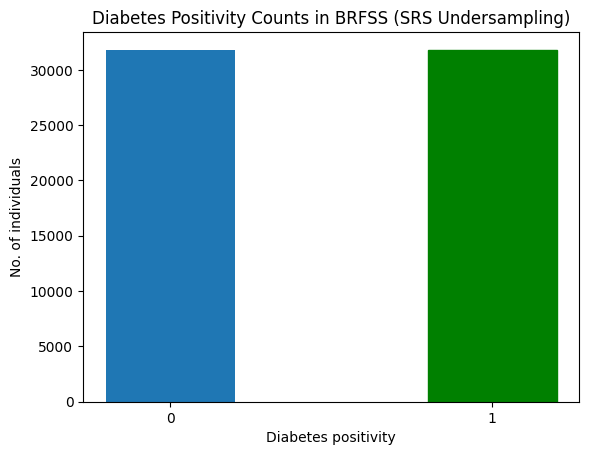

In [ ]:
barlist = plt.bar([str(0),str(1)], y_S_SRS.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (SRS Undersampling)")
plt.show()

In [ ]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_SRS, y_S_SRS, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)
T_train = pd.concat([X_T_train, y_T_train], axis=1)

X_T_train_SRS, y_T_train_SRS = SRS_undersampler(T_train, T_train[6])
print(y_T_train_SRS)


1964
8992
171682    0.0
212930    0.0
176967    0.0
68316     0.0
253412    0.0
         ... 
47021     1.0
197392    1.0
59357     1.0
156689    1.0
45219     1.0
Name: 6, Length: 3928, dtype: float64


In [ ]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (50912, 20)
y_S_train: (50912,)
X_S_test: (12728, 20)
y_S_test: (12728,)


In [ ]:
model_source_SRS = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_455 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_456 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_457 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_458 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_459 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_460 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_461 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - AUC: 0.7758 - loss: 0.5649 - val_AUC: 0.8141 - val_loss: 0.5238
Epoch 2/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8181 - loss: 0.5173 - val_AUC: 0.8177 - val_loss: 0.5452
Epoch 3/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - AUC: 0.8228 - loss: 0.5128 - val_AUC: 0.8191 - val_loss: 0.5272
Epoch 4/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.8240 - loss: 0.5098 - val_AUC: 0.8201 - val_loss: 0.5167
Epoch 5/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8257 - loss: 0.5073 - val_AUC: 0.8199 - val_loss: 0.5156
Epoch 6/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8232 - loss: 0.5110 - val_AUC: 0.8210 - val_loss: 0.5203
Epoch 7/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - AUC: 0.8243 - loss: 0.5088 - val_AUC: 0.8210 - val_loss: 0.5216
Epoch 8/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.8263 - loss: 0.5058 - val_AUC: 0.8207 - val_loss: 0.5213
Epoch 9/10
1273/1273 ━━━━━━━━━━━━━━━

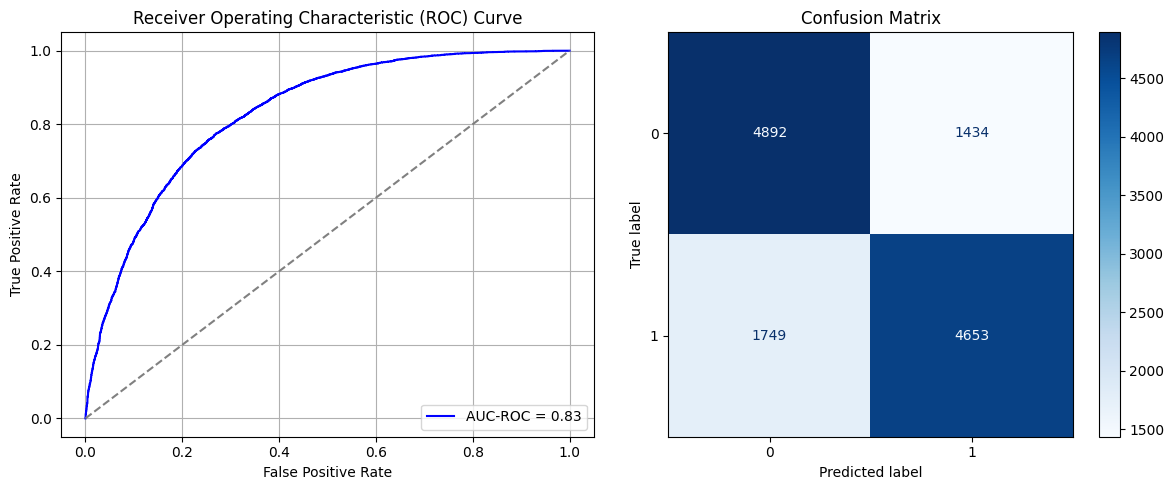

Best threshold based on F1-score: 0.31404754519462585
Time elapsed (performance): 88.4793058329999


<Sequential name=sequential_65, built=True>

In [ ]:
train_and_evaluate(model_source_SRS, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC-ROC: 0.7110415766008544
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.45      0.61      2278
         1.0       0.24      0.86      0.38       461

    accuracy                           0.52      2739
   macro avg       0.59      0.66      0.49      2739
weighted avg       0.82      0.52      0.57      2739

FPR 0.5504828797190519 TPR: 0.8633405639913232 FNR: 0.13665943600867678 TNR: 0.44951712028094815


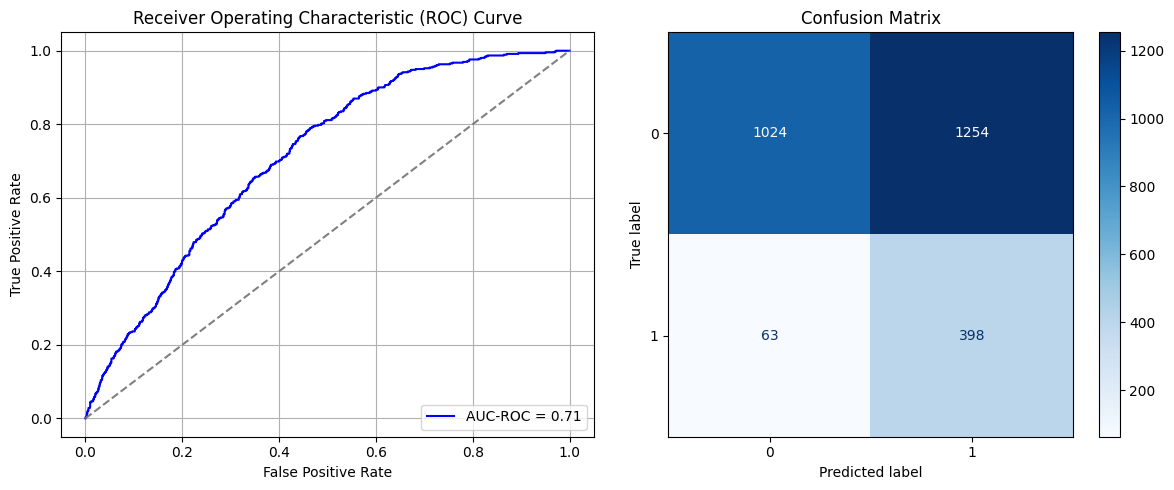

Best threshold based on F1-score: 0.6800121665000916
False Negative Rate: 0.13665943600867678
Time elapsed (performance): 0.770064924000053


In [ ]:
Transductive_TL(model_source_SRS, X_T_test, y_T_test, "Target")

In [ ]:
fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_462 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_463 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_464 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_465 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_466 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_467 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_468 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6824 - loss: 0.6154 - val_AUC: 0.6276 - val_loss: 0.4555
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6632 - loss: 0.4358 - val_AUC: 0.6888 - val_loss: 0.4487
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7144 - loss: 0.4234 - val_AUC: 0.6947 - val_loss: 0.4455
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7229 - loss: 0.4198 - val_AUC: 0.6961 - val_loss: 0.4436
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7211 - loss: 0.4266 - val_AUC: 0.6984 - val_loss: 0.4422
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7080 - loss: 0.4277 - val_AUC: 0.6995 - val_loss: 0.4414
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7198 - loss: 0.4156 - val_AUC: 0.7013 - val_loss: 0.4402
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7262 - loss: 0.4180 - val_AUC: 0.7028 - val_loss: 0.4392
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7258 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.0, 1.0)

In [ ]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train_SRS, X_T_test, y_T_train_SRS, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']


# fine_tuning(X_T_train_SRS, X_T_test, y_T_train_SRS, y_T_test, 0, 4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_469 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_470 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_471 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_472 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_473 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_474 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_475 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7452 - loss: 0.6188 - val_AUC: 0.0000e+00 - val_loss: 0.8554
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7563 - loss: 0.5575 - val_AUC: 0.0000e+00 - val_loss: 0.8846
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7591 - loss: 0.5636 - val_AUC: 0.0000e+00 - val_loss: 0.7957
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7570 - loss: 0.5527 - val_AUC: 0.0000e+00 - val_loss: 0.7842
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7601 - loss: 0.5577 - val_AUC: 0.0000e+00 - val_loss: 0.7471
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7547 - loss: 0.5567 - val_AUC: 0.0000e+00 - val_loss: 0.8358
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7433 - loss: 0.5663 - val_AUC: 0.0000e+00 - val_loss: 0.7893
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7552 - loss: 0.5638 - val_AUC: 0.0000e+00 - val_loss: 0.7662
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_476 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_477 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_478 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_479 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_480 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_481 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_482 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7159 - loss: 0.6533 - val_AUC: 0.0000e+00 - val_loss: 0.8643
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7470 - loss: 0.5680 - val_AUC: 0.0000e+00 - val_loss: 0.8208
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7518 - loss: 0.5662 - val_AUC: 0.0000e+00 - val_loss: 0.8771
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7574 - loss: 0.5599 - val_AUC: 0.0000e+00 - val_loss: 0.8483
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7451 - loss: 0.5674 - val_AUC: 0.0000e+00 - val_loss: 0.8348
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7638 - loss: 0.5483 - val_AUC: 0.0000e+00 - val_loss: 0.8624
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7532 - loss: 0.5531 - val_AUC: 0.0000e+00 - val_loss: 0.7596
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7427 - loss: 0.5692 - val_AUC: 0.0000e+00 - val_loss: 0.8082
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_483 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_484 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_485 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_486 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_487 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_488 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_489 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7430 - loss: 0.6167 - val_AUC: 0.0000e+00 - val_loss: 0.8398
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7350 - loss: 0.5789 - val_AUC: 0.0000e+00 - val_loss: 0.8212
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7435 - loss: 0.5743 - val_AUC: 0.0000e+00 - val_loss: 0.7799
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7541 - loss: 0.5603 - val_AUC: 0.0000e+00 - val_loss: 0.8773
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7543 - loss: 0.5584 - val_AUC: 0.0000e+00 - val_loss: 0.7664
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7569 - loss: 0.5567 - val_AUC: 0.0000e+00 - val_loss: 0.8797
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7567 - loss: 0.5617 - val_AUC: 0.0000e+00 - val_loss: 0.7319
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7540 - loss: 0.5587 - val_AUC: 0.0000e+00 - val_loss: 0.7646
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_490 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_491 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_492 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_493 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_494 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_495 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_496 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7350 - loss: 0.6425 - val_AUC: 0.0000e+00 - val_loss: 0.8465
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7391 - loss: 0.5678 - val_AUC: 0.0000e+00 - val_loss: 0.8249
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7557 - loss: 0.5565 - val_AUC: 0.0000e+00 - val_loss: 0.7988
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7558 - loss: 0.5611 - val_AUC: 0.0000e+00 - val_loss: 0.7656
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7609 - loss: 0.5569 - val_AUC: 0.0000e+00 - val_loss: 0.8249
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7604 - loss: 0.5550 - val_AUC: 0.0000e+00 - val_loss: 0.7883
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7590 - loss: 0.5564 - val_AUC: 0.0000e+00 - val_loss: 0.7798
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7667 - loss: 0.5486 - val_AUC: 0.0000e+00 - val_loss: 0.8216
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_497 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_498 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_499 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_500 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_501 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_502 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_503 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7086 - loss: 0.6628 - val_AUC: 0.0000e+00 - val_loss: 0.8561
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7445 - loss: 0.5770 - val_AUC: 0.0000e+00 - val_loss: 0.8736
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7596 - loss: 0.5591 - val_AUC: 0.0000e+00 - val_loss: 0.7467
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7592 - loss: 0.5585 - val_AUC: 0.0000e+00 - val_loss: 0.8507
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7447 - loss: 0.5753 - val_AUC: 0.0000e+00 - val_loss: 0.9145
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7518 - loss: 0.5598 - val_AUC: 0.0000e+00 - val_loss: 0.8470
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7525 - loss: 0.5615 - val_AUC: 0.0000e+00 - val_loss: 0.8074
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7530 - loss: 0.5602 - val_AUC: 0.0000e+00 - val_loss: 0.8054
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_504 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_505 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_506 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_507 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_508 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_509 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_510 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7219 - loss: 0.6499 - val_AUC: 0.0000e+00 - val_loss: 0.8524
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7577 - loss: 0.5644 - val_AUC: 0.0000e+00 - val_loss: 0.7981
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7423 - loss: 0.5681 - val_AUC: 0.0000e+00 - val_loss: 0.8241
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7538 - loss: 0.5563 - val_AUC: 0.0000e+00 - val_loss: 0.7641
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7565 - loss: 0.5608 - val_AUC: 0.0000e+00 - val_loss: 0.8824
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7394 - loss: 0.5638 - val_AUC: 0.0000e+00 - val_loss: 0.7621
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7531 - loss: 0.5587 - val_AUC: 0.0000e+00 - val_loss: 0.8372
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7420 - loss: 0.5673 - val_AUC: 0.0000e+00 - val_loss: 0.7593
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_511 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_512 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_513 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_514 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_515 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_516 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_517 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7221 - loss: 0.6459 - val_AUC: 0.0000e+00 - val_loss: 0.9001
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7422 - loss: 0.5755 - val_AUC: 0.0000e+00 - val_loss: 0.7788
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7486 - loss: 0.5699 - val_AUC: 0.0000e+00 - val_loss: 0.8580
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7306 - loss: 0.5853 - val_AUC: 0.0000e+00 - val_loss: 0.8228
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7454 - loss: 0.5641 - val_AUC: 0.0000e+00 - val_loss: 0.8242
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7682 - loss: 0.5451 - val_AUC: 0.0000e+00 - val_loss: 0.8211
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7526 - loss: 0.5574 - val_AUC: 0.0000e+00 - val_loss: 0.7767
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7553 - loss: 0.5576 - val_AUC: 0.0000e+00 - val_loss: 0.7699
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_518 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_519 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_520 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_521 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_522 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_523 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_524 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7228 - loss: 0.6416 - val_AUC: 0.0000e+00 - val_loss: 0.8458
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7325 - loss: 0.5768 - val_AUC: 0.0000e+00 - val_loss: 0.8418
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7433 - loss: 0.5728 - val_AUC: 0.0000e+00 - val_loss: 0.7869
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7507 - loss: 0.5668 - val_AUC: 0.0000e+00 - val_loss: 0.8767
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7571 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.7593
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7379 - loss: 0.5747 - val_AUC: 0.0000e+00 - val_loss: 0.7571
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7637 - loss: 0.5515 - val_AUC: 0.0000e+00 - val_loss: 0.8403
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7373 - loss: 0.5776 - val_AUC: 0.0000e+00 - val_loss: 0.7649
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_525 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_526 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_527 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_528 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_529 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_530 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_531 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7132 - loss: 0.6503 - val_AUC: 0.0000e+00 - val_loss: 0.8500
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7448 - loss: 0.5697 - val_AUC: 0.0000e+00 - val_loss: 0.8562
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7463 - loss: 0.5677 - val_AUC: 0.0000e+00 - val_loss: 0.8085
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7464 - loss: 0.5676 - val_AUC: 0.0000e+00 - val_loss: 0.8217
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7620 - loss: 0.5577 - val_AUC: 0.0000e+00 - val_loss: 0.8516
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7494 - loss: 0.5656 - val_AUC: 0.0000e+00 - val_loss: 0.8436
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7696 - loss: 0.5419 - val_AUC: 0.0000e+00 - val_loss: 0.7499
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7570 - loss: 0.5637 - val_AUC: 0.0000e+00 - val_loss: 0.8527
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_532 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_533 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_534 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_535 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_536 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_537 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_538 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7253 - loss: 0.6378 - val_AUC: 0.0000e+00 - val_loss: 0.8382
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7277 - loss: 0.5843 - val_AUC: 0.0000e+00 - val_loss: 0.7882
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7369 - loss: 0.5716 - val_AUC: 0.0000e+00 - val_loss: 0.8170
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7449 - loss: 0.5717 - val_AUC: 0.0000e+00 - val_loss: 0.7761
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7515 - loss: 0.5629 - val_AUC: 0.0000e+00 - val_loss: 0.8363
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7589 - loss: 0.5614 - val_AUC: 0.0000e+00 - val_loss: 0.8226
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7626 - loss: 0.5546 - val_AUC: 0.0000e+00 - val_loss: 0.9024
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7565 - loss: 0.5526 - val_AUC: 0.0000e+00 - val_loss: 0.7807
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_539 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_540 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_541 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_542 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_543 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_544 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_545 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7361 - loss: 0.6300 - val_AUC: 0.0000e+00 - val_loss: 0.8351
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7493 - loss: 0.5732 - val_AUC: 0.0000e+00 - val_loss: 0.8353
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7577 - loss: 0.5656 - val_AUC: 0.0000e+00 - val_loss: 0.8921
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7654 - loss: 0.5582 - val_AUC: 0.0000e+00 - val_loss: 0.7812
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7431 - loss: 0.5686 - val_AUC: 0.0000e+00 - val_loss: 0.8808
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7605 - loss: 0.5567 - val_AUC: 0.0000e+00 - val_loss: 0.8027
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7507 - loss: 0.5608 - val_AUC: 0.0000e+00 - val_loss: 0.7962
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7622 - loss: 0.5534 - val_AUC: 0.0000e+00 - val_loss: 0.8695
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_546 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_547 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_548 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_549 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_550 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_551 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_552 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7271 - loss: 0.6394 - val_AUC: 0.0000e+00 - val_loss: 0.8674
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7431 - loss: 0.5688 - val_AUC: 0.0000e+00 - val_loss: 0.8572
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7515 - loss: 0.5703 - val_AUC: 0.0000e+00 - val_loss: 0.8628
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7496 - loss: 0.5653 - val_AUC: 0.0000e+00 - val_loss: 0.7254
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7541 - loss: 0.5595 - val_AUC: 0.0000e+00 - val_loss: 0.8363
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7515 - loss: 0.5654 - val_AUC: 0.0000e+00 - val_loss: 0.8843
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7605 - loss: 0.5610 - val_AUC: 0.0000e+00 - val_loss: 0.8466
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7512 - loss: 0.5629 - val_AUC: 0.0000e+00 - val_loss: 0.7533
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_553 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_554 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_555 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_556 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_557 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_558 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_559 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7192 - loss: 0.6405 - val_AUC: 0.0000e+00 - val_loss: 0.8769
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7546 - loss: 0.5654 - val_AUC: 0.0000e+00 - val_loss: 0.8247
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7557 - loss: 0.5660 - val_AUC: 0.0000e+00 - val_loss: 0.9067
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7537 - loss: 0.5544 - val_AUC: 0.0000e+00 - val_loss: 0.8108
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7499 - loss: 0.5625 - val_AUC: 0.0000e+00 - val_loss: 0.7966
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7532 - loss: 0.5567 - val_AUC: 0.0000e+00 - val_loss: 0.8263
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7418 - loss: 0.5708 - val_AUC: 0.0000e+00 - val_loss: 0.8413
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7376 - loss: 0.5676 - val_AUC: 0.0000e+00 - val_loss: 0.7553
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_560 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_561 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_562 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_563 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_564 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_565 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_566 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7211 - loss: 0.6384 - val_AUC: 0.0000e+00 - val_loss: 0.8018
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7451 - loss: 0.5639 - val_AUC: 0.0000e+00 - val_loss: 0.7759
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7393 - loss: 0.5746 - val_AUC: 0.0000e+00 - val_loss: 0.7689
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7683 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.8932
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7595 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.7390
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7594 - loss: 0.5611 - val_AUC: 0.0000e+00 - val_loss: 0.8088
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7587 - loss: 0.5622 - val_AUC: 0.0000e+00 - val_loss: 0.7808
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7644 - loss: 0.5532 - val_AUC: 0.0000e+00 - val_loss: 0.8312
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_567 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_568 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_569 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_570 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_571 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_572 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_573 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7309 - loss: 0.6425 - val_AUC: 0.0000e+00 - val_loss: 0.9009
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7440 - loss: 0.5690 - val_AUC: 0.0000e+00 - val_loss: 0.8613
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7435 - loss: 0.5757 - val_AUC: 0.0000e+00 - val_loss: 0.8499
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7554 - loss: 0.5698 - val_AUC: 0.0000e+00 - val_loss: 0.7855
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7559 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.7977
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7583 - loss: 0.5623 - val_AUC: 0.0000e+00 - val_loss: 0.8290
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7687 - loss: 0.5503 - val_AUC: 0.0000e+00 - val_loss: 0.7865
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7693 - loss: 0.5463 - val_AUC: 0.0000e+00 - val_loss: 0.8235
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_574 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_575 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_576 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_577 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_578 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_579 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_580 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - AUC: 0.7147 - loss: 0.6625 - val_AUC: 0.0000e+00 - val_loss: 0.8358
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7399 - loss: 0.5748 - val_AUC: 0.0000e+00 - val_loss: 0.8675
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7454 - loss: 0.5625 - val_AUC: 0.0000e+00 - val_loss: 0.8128
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7382 - loss: 0.5750 - val_AUC: 0.0000e+00 - val_loss: 0.7923
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7506 - loss: 0.5647 - val_AUC: 0.0000e+00 - val_loss: 0.8536
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7749 - loss: 0.5444 - val_AUC: 0.0000e+00 - val_loss: 0.8065
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7443 - loss: 0.5610 - val_AUC: 0.0000e+00 - val_loss: 0.7915
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7642 - loss: 0.5566 - val_AUC: 0.0000e+00 - val_loss: 0.8823
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_581 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_582 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_583 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_584 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_585 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_586 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_587 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7189 - loss: 0.6397 - val_AUC: 0.0000e+00 - val_loss: 0.8779
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7488 - loss: 0.5699 - val_AUC: 0.0000e+00 - val_loss: 0.8110
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7437 - loss: 0.5684 - val_AUC: 0.0000e+00 - val_loss: 0.7828
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7445 - loss: 0.5664 - val_AUC: 0.0000e+00 - val_loss: 0.8244
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7513 - loss: 0.5602 - val_AUC: 0.0000e+00 - val_loss: 0.7971
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7474 - loss: 0.5677 - val_AUC: 0.0000e+00 - val_loss: 0.8374
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7517 - loss: 0.5670 - val_AUC: 0.0000e+00 - val_loss: 0.7839
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7495 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.8482
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_588 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_589 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_590 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_591 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_592 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_593 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_594 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - AUC: 0.7188 - loss: 0.6437 - val_AUC: 0.0000e+00 - val_loss: 0.8307
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7557 - loss: 0.5584 - val_AUC: 0.0000e+00 - val_loss: 0.8448
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7501 - loss: 0.5681 - val_AUC: 0.0000e+00 - val_loss: 0.8209
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7433 - loss: 0.5748 - val_AUC: 0.0000e+00 - val_loss: 0.8577
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7376 - loss: 0.5796 - val_AUC: 0.0000e+00 - val_loss: 0.8754
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7718 - loss: 0.5490 - val_AUC: 0.0000e+00 - val_loss: 0.7678
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7524 - loss: 0.5592 - val_AUC: 0.0000e+00 - val_loss: 0.8043
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7445 - loss: 0.5577 - val_AUC: 0.0000e+00 - val_loss: 0.8025
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_595 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_596 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_597 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_598 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_599 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_600 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_601 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - AUC: 0.7258 - loss: 0.6474 - val_AUC: 0.0000e+00 - val_loss: 0.8602
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7394 - loss: 0.5789 - val_AUC: 0.0000e+00 - val_loss: 0.8077
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7490 - loss: 0.5669 - val_AUC: 0.0000e+00 - val_loss: 0.7999
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7629 - loss: 0.5550 - val_AUC: 0.0000e+00 - val_loss: 0.7743
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7416 - loss: 0.5671 - val_AUC: 0.0000e+00 - val_loss: 0.8165
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7561 - loss: 0.5666 - val_AUC: 0.0000e+00 - val_loss: 0.9429
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7510 - loss: 0.5683 - val_AUC: 0.0000e+00 - val_loss: 0.8052
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7642 - loss: 0.5483 - val_AUC: 0.0000e+00 - val_loss: 0.7663
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_602 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_603 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_604 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_605 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_606 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_607 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_608 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7340 - loss: 0.6286 - val_AUC: 0.0000e+00 - val_loss: 0.8603
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7521 - loss: 0.5671 - val_AUC: 0.0000e+00 - val_loss: 0.8257
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7444 - loss: 0.5787 - val_AUC: 0.0000e+00 - val_loss: 0.8176
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7502 - loss: 0.5626 - val_AUC: 0.0000e+00 - val_loss: 0.7763
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7452 - loss: 0.5713 - val_AUC: 0.0000e+00 - val_loss: 0.8869
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7531 - loss: 0.5647 - val_AUC: 0.0000e+00 - val_loss: 0.8481
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7547 - loss: 0.5583 - val_AUC: 0.0000e+00 - val_loss: 0.7913
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7645 - loss: 0.5501 - val_AUC: 0.0000e+00 - val_loss: 0.7118
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_609 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_610 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_611 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_612 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_613 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_614 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_615 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7214 - loss: 0.6442 - val_AUC: 0.0000e+00 - val_loss: 0.8648
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7379 - loss: 0.5714 - val_AUC: 0.0000e+00 - val_loss: 0.8158
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7486 - loss: 0.5644 - val_AUC: 0.0000e+00 - val_loss: 0.8824
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7547 - loss: 0.5587 - val_AUC: 0.0000e+00 - val_loss: 0.8279
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7673 - loss: 0.5474 - val_AUC: 0.0000e+00 - val_loss: 0.7895
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7545 - loss: 0.5632 - val_AUC: 0.0000e+00 - val_loss: 0.8494
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7525 - loss: 0.5575 - val_AUC: 0.0000e+00 - val_loss: 0.8014
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7508 - loss: 0.5574 - val_AUC: 0.0000e+00 - val_loss: 0.7779
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_616 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_617 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_618 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_619 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_620 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_621 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_622 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7432 - loss: 0.6220 - val_AUC: 0.0000e+00 - val_loss: 0.8352
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7556 - loss: 0.5660 - val_AUC: 0.0000e+00 - val_loss: 0.8072
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7489 - loss: 0.5667 - val_AUC: 0.0000e+00 - val_loss: 0.7549
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7558 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.7672
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7530 - loss: 0.5593 - val_AUC: 0.0000e+00 - val_loss: 0.7556
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7506 - loss: 0.5617 - val_AUC: 0.0000e+00 - val_loss: 0.8067
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7512 - loss: 0.5667 - val_AUC: 0.0000e+00 - val_loss: 0.8606
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7726 - loss: 0.5401 - val_AUC: 0.0000e+00 - val_loss: 0.8036
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_623 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_624 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_625 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_626 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_627 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_628 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_629 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - AUC: 0.7204 - loss: 0.6497 - val_AUC: 0.0000e+00 - val_loss: 0.8546
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7455 - loss: 0.5676 - val_AUC: 0.0000e+00 - val_loss: 0.8737
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7439 - loss: 0.5757 - val_AUC: 0.0000e+00 - val_loss: 0.8113
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7560 - loss: 0.5672 - val_AUC: 0.0000e+00 - val_loss: 0.8630
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7450 - loss: 0.5771 - val_AUC: 0.0000e+00 - val_loss: 0.8580
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7586 - loss: 0.5601 - val_AUC: 0.0000e+00 - val_loss: 0.8768
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7599 - loss: 0.5592 - val_AUC: 0.0000e+00 - val_loss: 0.9164
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7574 - loss: 0.5579 - val_AUC: 0.0000e+00 - val_loss: 0.7651
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_630 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_631 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_632 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_633 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_634 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_635 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_636 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7299 - loss: 0.6393 - val_AUC: 0.0000e+00 - val_loss: 0.8254
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7392 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.8329
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7520 - loss: 0.5585 - val_AUC: 0.0000e+00 - val_loss: 0.8233
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7541 - loss: 0.5679 - val_AUC: 0.0000e+00 - val_loss: 0.8265
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7571 - loss: 0.5545 - val_AUC: 0.0000e+00 - val_loss: 0.8831
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7613 - loss: 0.5542 - val_AUC: 0.0000e+00 - val_loss: 0.7493
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7595 - loss: 0.5619 - val_AUC: 0.0000e+00 - val_loss: 0.8586
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7528 - loss: 0.5521 - val_AUC: 0.0000e+00 - val_loss: 0.8217
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_637 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_638 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_639 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_640 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_641 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_642 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_643 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7260 - loss: 0.6392 - val_AUC: 0.0000e+00 - val_loss: 0.8843
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7590 - loss: 0.5609 - val_AUC: 0.0000e+00 - val_loss: 0.8281
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7602 - loss: 0.5590 - val_AUC: 0.0000e+00 - val_loss: 0.7857
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7357 - loss: 0.5753 - val_AUC: 0.0000e+00 - val_loss: 0.8096
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7503 - loss: 0.5617 - val_AUC: 0.0000e+00 - val_loss: 0.7788
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7631 - loss: 0.5638 - val_AUC: 0.0000e+00 - val_loss: 0.8759
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7505 - loss: 0.5601 - val_AUC: 0.0000e+00 - val_loss: 0.8691
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7487 - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_644 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_645 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_646 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_647 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_648 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_649 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_650 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7067 - loss: 0.6565 - val_AUC: 0.0000e+00 - val_loss: 0.8096
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7296 - loss: 0.5785 - val_AUC: 0.0000e+00 - val_loss: 0.8192
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7605 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.8831
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7438 - loss: 0.5677 - val_AUC: 0.0000e+00 - val_loss: 0.7916
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7466 - loss: 0.5614 - val_AUC: 0.0000e+00 - val_loss: 0.7890
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7555 - loss: 0.5614 - val_AUC: 0.0000e+00 - val_loss: 0.7022
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7478 - loss: 0.5644 - val_AUC: 0.0000e+00 - val_loss: 0.7773
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7607 - loss: 0.5574 - val_AUC: 0.0000e+00 - val_loss: 0.7381
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_651 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_652 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_653 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_654 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_655 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_656 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_657 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7281 - loss: 0.6284 - val_AUC: 0.0000e+00 - val_loss: 0.8606
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7448 - loss: 0.5692 - val_AUC: 0.0000e+00 - val_loss: 0.9267
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7648 - loss: 0.5551 - val_AUC: 0.0000e+00 - val_loss: 0.8040
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7498 - loss: 0.5628 - val_AUC: 0.0000e+00 - val_loss: 0.8337
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7558 - loss: 0.5709 - val_AUC: 0.0000e+00 - val_loss: 0.9946
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7498 - loss: 0.5630 - val_AUC: 0.0000e+00 - val_loss: 0.7935
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7531 - loss: 0.5631 - val_AUC: 0.0000e+00 - val_loss: 0.8230
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7508 - loss: 0.5651 - val_AUC: 0.0000e+00 - val_loss: 0.7448
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_658 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_659 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_660 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_661 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_662 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_663 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_664 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7182 - loss: 0.6424 - val_AUC: 0.0000e+00 - val_loss: 0.9068
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7485 - loss: 0.5684 - val_AUC: 0.0000e+00 - val_loss: 0.7591
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7396 - loss: 0.5743 - val_AUC: 0.0000e+00 - val_loss: 0.7956
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7420 - loss: 0.5713 - val_AUC: 0.0000e+00 - val_loss: 0.8718
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7729 - loss: 0.5395 - val_AUC: 0.0000e+00 - val_loss: 0.8249
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7497 - loss: 0.5634 - val_AUC: 0.0000e+00 - val_loss: 0.7801
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7715 - loss: 0.5447 - val_AUC: 0.0000e+00 - val_loss: 0.8496
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7371 - loss: 0.5641 - val_AUC: 0.0000e+00 - val_loss: 0.7522
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_665 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_666 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_667 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_668 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_669 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_670 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_671 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7092 - loss: 0.6619 - val_AUC: 0.0000e+00 - val_loss: 0.8409
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7374 - loss: 0.5787 - val_AUC: 0.0000e+00 - val_loss: 0.8286
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7478 - loss: 0.5743 - val_AUC: 0.0000e+00 - val_loss: 0.8934
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7486 - loss: 0.5632 - val_AUC: 0.0000e+00 - val_loss: 0.8016
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7489 - loss: 0.5695 - val_AUC: 0.0000e+00 - val_loss: 0.7706
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7617 - loss: 0.5554 - val_AUC: 0.0000e+00 - val_loss: 0.8531
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7636 - loss: 0.5526 - val_AUC: 0.0000e+00 - val_loss: 0.7829
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7516 - loss: 0.5583 - val_AUC: 0.0000e+00 - val_loss: 0.7400
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_672 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_673 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_674 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_675 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_676 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_677 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_678 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - AUC: 0.7309 - loss: 0.6292 - val_AUC: 0.0000e+00 - val_loss: 0.9064
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7443 - loss: 0.5774 - val_AUC: 0.0000e+00 - val_loss: 0.8207
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7417 - loss: 0.5717 - val_AUC: 0.0000e+00 - val_loss: 0.7920
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7507 - loss: 0.5663 - val_AUC: 0.0000e+00 - val_loss: 0.8366
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7497 - loss: 0.5665 - val_AUC: 0.0000e+00 - val_loss: 0.7869
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7363 - loss: 0.5734 - val_AUC: 0.0000e+00 - val_loss: 0.8447
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7545 - loss: 0.5624 - val_AUC: 0.0000e+00 - val_loss: 0.8531
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7677 - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_679 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_680 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_681 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_682 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_683 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_684 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_685 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - AUC: 0.7144 - loss: 0.6535 - val_AUC: 0.0000e+00 - val_loss: 0.8703
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7470 - loss: 0.5708 - val_AUC: 0.0000e+00 - val_loss: 0.8239
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7483 - loss: 0.5712 - val_AUC: 0.0000e+00 - val_loss: 0.8264
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7381 - loss: 0.5799 - val_AUC: 0.0000e+00 - val_loss: 0.8134
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7472 - loss: 0.5670 - val_AUC: 0.0000e+00 - val_loss: 0.9250
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7445 - loss: 0.5690 - val_AUC: 0.0000e+00 - val_loss: 0.8214
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7535 - loss: 0.5655 - val_AUC: 0.0000e+00 - val_loss: 0.7681
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7484 - loss: 0.5668 - val_AUC: 0.0000e+00 - val_loss: 0.7708
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_686 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_687 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_688 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_689 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_690 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_691 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_692 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7268 - loss: 0.6414 - val_AUC: 0.0000e+00 - val_loss: 0.8271
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7447 - loss: 0.5710 - val_AUC: 0.0000e+00 - val_loss: 0.8550
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7569 - loss: 0.5552 - val_AUC: 0.0000e+00 - val_loss: 0.7996
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7469 - loss: 0.5659 - val_AUC: 0.0000e+00 - val_loss: 0.8852
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7504 - loss: 0.5758 - val_AUC: 0.0000e+00 - val_loss: 0.8765
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7555 - loss: 0.5551 - val_AUC: 0.0000e+00 - val_loss: 0.7762
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7427 - loss: 0.5665 - val_AUC: 0.0000e+00 - val_loss: 0.8215
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7601 - loss: 0.5598 - val_AUC: 0.0000e+00 - val_loss: 0.7436
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_693 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_694 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_695 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_696 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_697 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_698 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_699 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - AUC: 0.7171 - loss: 0.6559 - val_AUC: 0.0000e+00 - val_loss: 0.8663
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7438 - loss: 0.5693 - val_AUC: 0.0000e+00 - val_loss: 0.7890
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7557 - loss: 0.5657 - val_AUC: 0.0000e+00 - val_loss: 0.8024
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7428 - loss: 0.5798 - val_AUC: 0.0000e+00 - val_loss: 0.7802
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7582 - loss: 0.5624 - val_AUC: 0.0000e+00 - val_loss: 0.7640
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7471 - loss: 0.5652 - val_AUC: 0.0000e+00 - val_loss: 0.8034
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7499 - loss: 0.5633 - val_AUC: 0.0000e+00 - val_loss: 0.8615
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7640 - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_700 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_701 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_702 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_703 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_704 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_705 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_706 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7326 - loss: 0.6303 - val_AUC: 0.0000e+00 - val_loss: 0.8602
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7392 - loss: 0.5751 - val_AUC: 0.0000e+00 - val_loss: 0.8160
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7368 - loss: 0.5778 - val_AUC: 0.0000e+00 - val_loss: 0.8524
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7608 - loss: 0.5547 - val_AUC: 0.0000e+00 - val_loss: 0.7853
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7535 - loss: 0.5619 - val_AUC: 0.0000e+00 - val_loss: 0.8372
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7586 - loss: 0.5545 - val_AUC: 0.0000e+00 - val_loss: 0.7149
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7641 - loss: 0.5537 - val_AUC: 0.0000e+00 - val_loss: 0.7836
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7631 - loss: 0.5547 - val_AUC: 0.0000e+00 - val_loss: 0.8110
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_707 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_708 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_709 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_710 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_711 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_712 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_713 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - AUC: 0.7283 - loss: 0.6310 - val_AUC: 0.0000e+00 - val_loss: 0.8637
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7573 - loss: 0.5621 - val_AUC: 0.0000e+00 - val_loss: 0.9078
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7393 - loss: 0.5682 - val_AUC: 0.0000e+00 - val_loss: 0.8135
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7438 - loss: 0.5744 - val_AUC: 0.0000e+00 - val_loss: 0.8535
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7476 - loss: 0.5638 - val_AUC: 0.0000e+00 - val_loss: 0.8114
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7459 - loss: 0.5678 - val_AUC: 0.0000e+00 - val_loss: 0.7765
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7695 - loss: 0.5477 - val_AUC: 0.0000e+00 - val_loss: 0.8992
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7596 - loss: 0.5489 - val_AUC: 0.0000e+00 - val_loss: 0.7450
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_714 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_715 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_716 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_717 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_718 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_719 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_720 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - AUC: 0.7246 - loss: 0.6512 - val_AUC: 0.0000e+00 - val_loss: 0.8028
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7399 - loss: 0.5792 - val_AUC: 0.0000e+00 - val_loss: 0.8535
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7489 - loss: 0.5618 - val_AUC: 0.0000e+00 - val_loss: 0.8021
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7571 - loss: 0.5622 - val_AUC: 0.0000e+00 - val_loss: 0.8964
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7613 - loss: 0.5589 - val_AUC: 0.0000e+00 - val_loss: 0.8853
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7556 - loss: 0.5626 - val_AUC: 0.0000e+00 - val_loss: 0.9008
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7630 - loss: 0.5553 - val_AUC: 0.0000e+00 - val_loss: 0.7636
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7609 - loss: 0.5544 - val_AUC: 0.0000e+00 - val_loss: 0.7633
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_721 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_722 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_723 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_724 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_725 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_726 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_727 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7014 - loss: 0.6821 - val_AUC: 0.0000e+00 - val_loss: 0.8142
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7581 - loss: 0.5585 - val_AUC: 0.0000e+00 - val_loss: 0.8261
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7512 - loss: 0.5670 - val_AUC: 0.0000e+00 - val_loss: 0.8147
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7608 - loss: 0.5615 - val_AUC: 0.0000e+00 - val_loss: 0.7770
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7664 - loss: 0.5503 - val_AUC: 0.0000e+00 - val_loss: 0.8462
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7599 - loss: 0.5542 - val_AUC: 0.0000e+00 - val_loss: 0.7658
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7604 - loss: 0.5544 - val_AUC: 0.0000e+00 - val_loss: 0.7237
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7653 - loss: 0.5553 - val_AUC: 0.0000e+00 - val_loss: 0.9293
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_728 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_729 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_730 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_731 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_732 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_733 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_734 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - AUC: 0.7037 - loss: 0.6626 - val_AUC: 0.0000e+00 - val_loss: 0.8270
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7341 - loss: 0.5765 - val_AUC: 0.0000e+00 - val_loss: 0.8789
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7465 - loss: 0.5635 - val_AUC: 0.0000e+00 - val_loss: 0.7677
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7567 - loss: 0.5609 - val_AUC: 0.0000e+00 - val_loss: 0.7819
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7806 - loss: 0.5344 - val_AUC: 0.0000e+00 - val_loss: 0.8129
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7559 - loss: 0.5630 - val_AUC: 0.0000e+00 - val_loss: 0.9077
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7693 - loss: 0.5520 - val_AUC: 0.0000e+00 - val_loss: 0.8659
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7425 - loss: 0.5713 - val_AUC: 0.0000e+00 - val_loss: 0.8070
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_735 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_736 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_737 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_738 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_739 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_740 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_741 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7084 - loss: 0.6594 - val_AUC: 0.0000e+00 - val_loss: 0.8711
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7333 - loss: 0.5836 - val_AUC: 0.0000e+00 - val_loss: 0.8478
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7636 - loss: 0.5507 - val_AUC: 0.0000e+00 - val_loss: 0.8179
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7406 - loss: 0.5742 - val_AUC: 0.0000e+00 - val_loss: 0.7826
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7581 - loss: 0.5634 - val_AUC: 0.0000e+00 - val_loss: 0.9103
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7496 - loss: 0.5600 - val_AUC: 0.0000e+00 - val_loss: 0.7641
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7682 - loss: 0.5497 - val_AUC: 0.0000e+00 - val_loss: 0.8668
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7570 - loss: 0.5599 - val_AUC: 0.0000e+00 - val_loss: 0.8994
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_742 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_743 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_744 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_745 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_746 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_747 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_748 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7343 - loss: 0.6299 - val_AUC: 0.0000e+00 - val_loss: 0.8617
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7514 - loss: 0.5654 - val_AUC: 0.0000e+00 - val_loss: 0.7927
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7497 - loss: 0.5664 - val_AUC: 0.0000e+00 - val_loss: 0.8379
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7374 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.8418
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7593 - loss: 0.5543 - val_AUC: 0.0000e+00 - val_loss: 0.8475
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7431 - loss: 0.5675 - val_AUC: 0.0000e+00 - val_loss: 0.7829
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7621 - loss: 0.5607 - val_AUC: 0.0000e+00 - val_loss: 0.9086
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7610 - loss: 0.5578 - val_AUC: 0.0000e+00 - val_loss: 0.8365
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_749 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_750 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_751 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_752 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_753 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_754 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_755 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7158 - loss: 0.6602 - val_AUC: 0.0000e+00 - val_loss: 0.8607
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7490 - loss: 0.5696 - val_AUC: 0.0000e+00 - val_loss: 0.8340
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7591 - loss: 0.5604 - val_AUC: 0.0000e+00 - val_loss: 0.9016
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7590 - loss: 0.5600 - val_AUC: 0.0000e+00 - val_loss: 0.8194
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7586 - loss: 0.5574 - val_AUC: 0.0000e+00 - val_loss: 0.7427
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7588 - loss: 0.5576 - val_AUC: 0.0000e+00 - val_loss: 0.7846
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7606 - loss: 0.5552 - val_AUC: 0.0000e+00 - val_loss: 0.7772
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7539 - loss: 0.5573 - val_AUC: 0.0000e+00 - val_loss: 0.8198
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_756 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_757 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_758 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_759 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_760 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_761 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_762 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7178 - loss: 0.6563 - val_AUC: 0.0000e+00 - val_loss: 0.8642
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7505 - loss: 0.5617 - val_AUC: 0.0000e+00 - val_loss: 0.7727
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7475 - loss: 0.5705 - val_AUC: 0.0000e+00 - val_loss: 0.8913
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7450 - loss: 0.5664 - val_AUC: 0.0000e+00 - val_loss: 0.7634
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7630 - loss: 0.5519 - val_AUC: 0.0000e+00 - val_loss: 0.7854
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7617 - loss: 0.5553 - val_AUC: 0.0000e+00 - val_loss: 0.7375
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7505 - loss: 0.5639 - val_AUC: 0.0000e+00 - val_loss: 0.8953
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7545 - loss: 0.5622 - val_AUC: 0.0000e+00 - val_loss: 0.8072
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_763 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_764 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_765 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_766 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_767 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_768 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_769 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - AUC: 0.7170 - loss: 0.6486 - val_AUC: 0.0000e+00 - val_loss: 0.8457
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7413 - loss: 0.5744 - val_AUC: 0.0000e+00 - val_loss: 0.8408
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7619 - loss: 0.5606 - val_AUC: 0.0000e+00 - val_loss: 0.8809
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7435 - loss: 0.5702 - val_AUC: 0.0000e+00 - val_loss: 0.7932
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7511 - loss: 0.5623 - val_AUC: 0.0000e+00 - val_loss: 0.8445
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7479 - loss: 0.5681 - val_AUC: 0.0000e+00 - val_loss: 0.8009
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7610 - loss: 0.5577 - val_AUC: 0.0000e+00 - val_loss: 0.8078
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7473 - loss: 0.5696 - val_AUC: 0.0000e+00 - val_loss: 0.7880
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_770 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_771 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_772 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_773 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_774 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_775 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_776 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7087 - loss: 0.6494 - val_AUC: 0.0000e+00 - val_loss: 0.8646
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7401 - loss: 0.5765 - val_AUC: 0.0000e+00 - val_loss: 0.8348
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7676 - loss: 0.5507 - val_AUC: 0.0000e+00 - val_loss: 0.8487
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7472 - loss: 0.5636 - val_AUC: 0.0000e+00 - val_loss: 0.8210
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7645 - loss: 0.5554 - val_AUC: 0.0000e+00 - val_loss: 0.7829
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7577 - loss: 0.5530 - val_AUC: 0.0000e+00 - val_loss: 0.7507
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7663 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.8972
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7452 - loss: 0.5633 - val_AUC: 0.0000e+00 - val_loss: 0.8233
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_777 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_778 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_779 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_780 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_781 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_782 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_783 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Trainable
Trainable
Not Trainable
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7045 - loss: 0.6684 - val_AUC: 0.0000e+00 - val_loss: 0.8812
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7469 - loss: 0.5737 - val_AUC: 0.0000e+00 - val_loss: 0.8415
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7480 - loss: 0.5646 - val_AUC: 0.0000e+00 - val_loss: 0.8671
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7549 - loss: 0.5648 - val_AUC: 0.0000e+00 - val_loss: 0.8582
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7469 - loss: 0.5672 - val_AUC: 0.0000e+00 - val_loss: 0.8676
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7736 - loss: 0.5449 - val_AUC: 0.0000e+00 - val_loss: 0.7836
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7599 - loss: 0.5557 - val_AUC: 0.0000e+00 - val_loss: 0.7281
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7568 - loss: 0.5626 - val_AUC: 0.0000e+00 - val_loss: 0.7900
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_784 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_785 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_786 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_787 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_788 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_789 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_790 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7091 - loss: 0.6662 - val_AUC: 0.0000e+00 - val_loss: 0.8675
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7522 - loss: 0.5643 - val_AUC: 0.0000e+00 - val_loss: 0.8900
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7446 - loss: 0.5731 - val_AUC: 0.0000e+00 - val_loss: 0.8176
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7405 - loss: 0.5753 - val_AUC: 0.0000e+00 - val_loss: 0.7804
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7426 - loss: 0.5751 - val_AUC: 0.0000e+00 - val_loss: 0.8523
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7498 - loss: 0.5718 - val_AUC: 0.0000e+00 - val_loss: 0.8779
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7498 - loss: 0.5644 - val_AUC: 0.0000e+00 - val_loss: 0.8228
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7631 - loss: 0.5469 - val_AUC: 0.0000e+00 - val_loss: 0.7646
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_791 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_792 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_793 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_794 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_795 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_796 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_797 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7224 - loss: 0.6400 - val_AUC: 0.0000e+00 - val_loss: 0.8534
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7510 - loss: 0.5695 - val_AUC: 0.0000e+00 - val_loss: 0.9147
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7614 - loss: 0.5579 - val_AUC: 0.0000e+00 - val_loss: 0.8002
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7530 - loss: 0.5635 - val_AUC: 0.0000e+00 - val_loss: 0.8067
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7627 - loss: 0.5492 - val_AUC: 0.0000e+00 - val_loss: 0.7128
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7555 - loss: 0.5628 - val_AUC: 0.0000e+00 - val_loss: 0.7666
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7613 - loss: 0.5511 - val_AUC: 0.0000e+00 - val_loss: 0.8391
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7427 - loss: 0.5669 - val_AUC: 0.0000e+00 - val_loss: 0.8122
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_114"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_798 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_799 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_800 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_801 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_802 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_803 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_804 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - AUC: 0.7259 - loss: 0.6413 - val_AUC: 0.0000e+00 - val_loss: 0.8266
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7638 - loss: 0.5548 - val_AUC: 0.0000e+00 - val_loss: 0.8595
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7446 - loss: 0.5744 - val_AUC: 0.0000e+00 - val_loss: 0.8808
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7680 - loss: 0.5544 - val_AUC: 0.0000e+00 - val_loss: 0.8043
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7408 - loss: 0.5733 - val_AUC: 0.0000e+00 - val_loss: 0.8766
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7531 - loss: 0.5590 - val_AUC: 0.0000e+00 - val_loss: 0.8001
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7633 - loss: 0.5485 - val_AUC: 0.0000e+00 - val_loss: 0.7531
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7656 - loss: 0.5535 - val_AUC: 0.0000e+00 - val_loss: 0.8018
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_805 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_806 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_807 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_808 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_809 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_810 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_811 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7144 - loss: 0.6478 - val_AUC: 0.0000e+00 - val_loss: 0.8486
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7567 - loss: 0.5665 - val_AUC: 0.0000e+00 - val_loss: 0.8825
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7559 - loss: 0.5605 - val_AUC: 0.0000e+00 - val_loss: 0.8486
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7578 - loss: 0.5603 - val_AUC: 0.0000e+00 - val_loss: 0.9031
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7469 - loss: 0.5640 - val_AUC: 0.0000e+00 - val_loss: 0.8051
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7602 - loss: 0.5543 - val_AUC: 0.0000e+00 - val_loss: 0.7986
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7424 - loss: 0.5751 - val_AUC: 0.0000e+00 - val_loss: 0.8393
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7625 - loss: 0.5484 - val_AUC: 0.0000e+00 - val_loss: 0.8537
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_812 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_813 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_814 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_815 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_816 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_817 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_818 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7038 - loss: 0.6610 - val_AUC: 0.0000e+00 - val_loss: 0.8500
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7435 - loss: 0.5644 - val_AUC: 0.0000e+00 - val_loss: 0.8163
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7646 - loss: 0.5620 - val_AUC: 0.0000e+00 - val_loss: 0.8512
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7498 - loss: 0.5665 - val_AUC: 0.0000e+00 - val_loss: 0.8580
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7590 - loss: 0.5632 - val_AUC: 0.0000e+00 - val_loss: 0.9066
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7635 - loss: 0.5575 - val_AUC: 0.0000e+00 - val_loss: 0.8584
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7582 - loss: 0.5564 - val_AUC: 0.0000e+00 - val_loss: 0.7552
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7611 - loss: 0.5557 - val_AUC: 0.0000e+00 - val_loss: 0.7805
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

In [ ]:
print(ParamFit)
ParamFit.to_csv('SRS_Fine_Tuning.csv')

         FPR       FNR
0   0.183055  0.498915
1   0.218613  0.444685
2   0.263828  0.377440
3   0.126866  0.607375
4   0.215540  0.453362
5   0.169886  0.522777
6   0.221247  0.438178
7   0.227392  0.422993
8   0.208516  0.457701
9   0.222564  0.436009
10  0.167691  0.535792
11  0.190957  0.483731
12  0.219052  0.440347
13  0.229148  0.425163
14  0.259877  0.392625
15  0.215101  0.455531
16  0.251536  0.401302
17  0.224759  0.436009
18  0.185689  0.481562
19  0.218174  0.438178
20  0.183494  0.492408
21  0.196664  0.481562
22  0.191835  0.485900
23  0.203687  0.472885
24  0.122915  0.611714
25  0.216418  0.444685
26  0.248464  0.409978
27  0.172959  0.505423
28  0.187884  0.479393
29  0.264706  0.390456
30  0.259877  0.394794
31  0.134328  0.600868
32  0.206321  0.466377
33  0.215979  0.455531
34  0.243635  0.409978
35  0.229587  0.431670
36  0.265584  0.379610
37  0.186567  0.488069
38  0.215979  0.442516
39  0.253292  0.386117
40  0.280948  0.364425
41  0.150571  0.568330
42  0.25329

## Simple Random Sampling with Replacement:

In [ ]:
X_S_SRSwR, y_S_SRSwR = SRSwR_undersampler(data_S_full, data_S_full['Diabetes_binary'])
print(y_S_SRSwR)

31820
208165
19873     0
34215     0
22174     0
234103    0
145395    0
         ..
253630    1
253636    1
253659    1
253670    1
253679    1
Name: Diabetes_binary, Length: 63640, dtype: int64


In [ ]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_SRSwR, y_S_SRSwR, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)
T_train = pd.concat([X_T_train, y_T_train], axis=1)

X_T_train_SRSwR, y_T_train_SRSwR = SRSwR_undersampler(T_train, T_train[6])
print(y_T_train_SRSwR)

1964
8992
53070     0.0
156329    0.0
29986     0.0
244955    0.0
248787    0.0
         ... 
47021     1.0
197392    1.0
59357     1.0
156689    1.0
45219     1.0
Name: 6, Length: 3928, dtype: float64


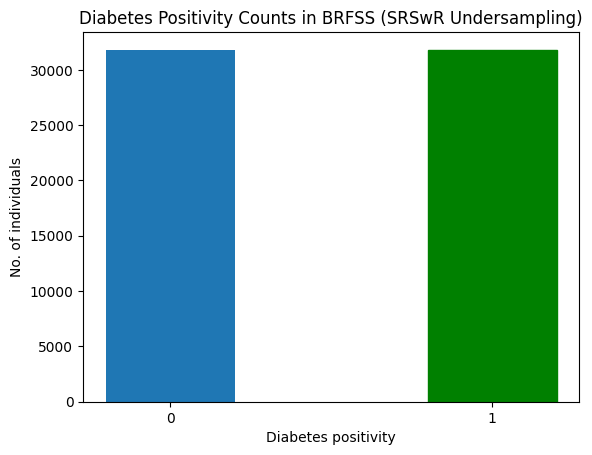

In [ ]:
barlist = plt.bar([str(0),str(1)], y_S_SRSwR.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (SRSwR Undersampling)")
plt.show()

In [ ]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (50912, 20)
y_S_train: (50912,)
X_S_test: (12728, 20)
y_S_test: (12728,)


In [ ]:
model_source_SRSwR = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_819 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_820 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_821 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_822 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_823 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_824 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_825 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7767 - loss: 0.5622 - val_AUC: 0.8137 - val_loss: 0.5307
Epoch 2/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - AUC: 0.8162 - loss: 0.5182 - val_AUC: 0.8193 - val_loss: 0.5238
Epoch 3/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - AUC: 0.8230 - loss: 0.5102 - val_AUC: 0.8193 - val_loss: 0.5344
Epoch 4/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.8229 - loss: 0.5100 - val_AUC: 0.8188 - val_loss: 0.5209
Epoch 5/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8206 - loss: 0.5134 - val_AUC: 0.8211 - val_loss: 0.5205
Epoch 6/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - AUC: 0.8253 - loss: 0.5071 - val_AUC: 0.8209 - val_loss: 0.5314
Epoch 7/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8246 - loss: 0.5088 - val_AUC: 0.8227 - val_loss: 0.5173
Epoch 8/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8264 - loss: 0.5077 - val_AUC: 0.8219 - val_loss: 0.5183
Epoch 9/10
1273/1273 ━━━━━━━━━━━━━━━━━

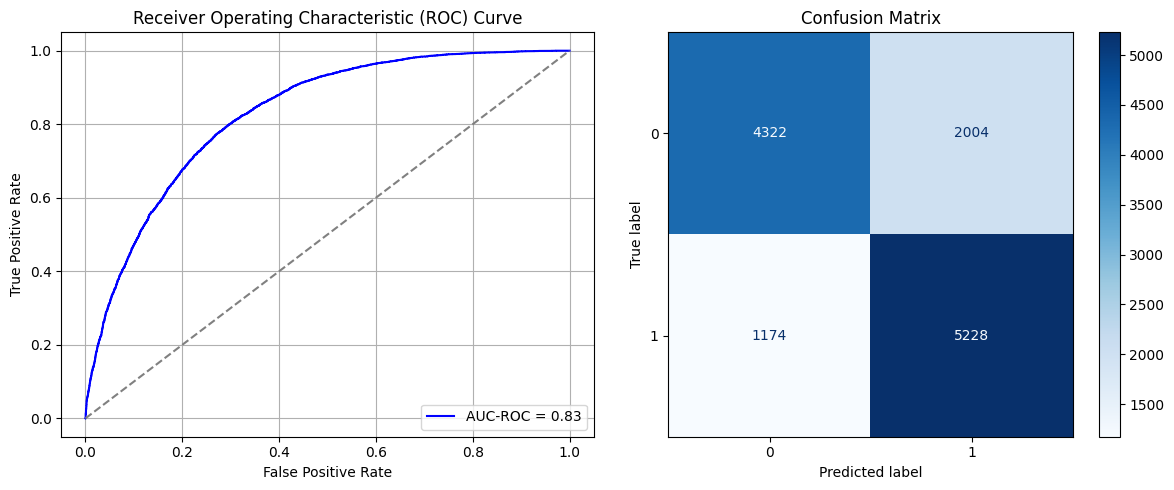

Best threshold based on F1-score: 0.38660046458244324
Time elapsed (performance): 71.9087711899997


<Sequential name=sequential_117, built=True>

In [ ]:
train_and_evaluate(model_source_SRSwR, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC-ROC: 0.7064127493196263
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.39      0.55      2278
         1.0       0.23      0.90      0.37       461

    accuracy                           0.47      2739
   macro avg       0.59      0.64      0.46      2739
weighted avg       0.83      0.47      0.52      2739

FPR 0.6106233538191396 TPR: 0.8980477223427332 FNR: 0.1019522776572668 TNR: 0.38937664618086043


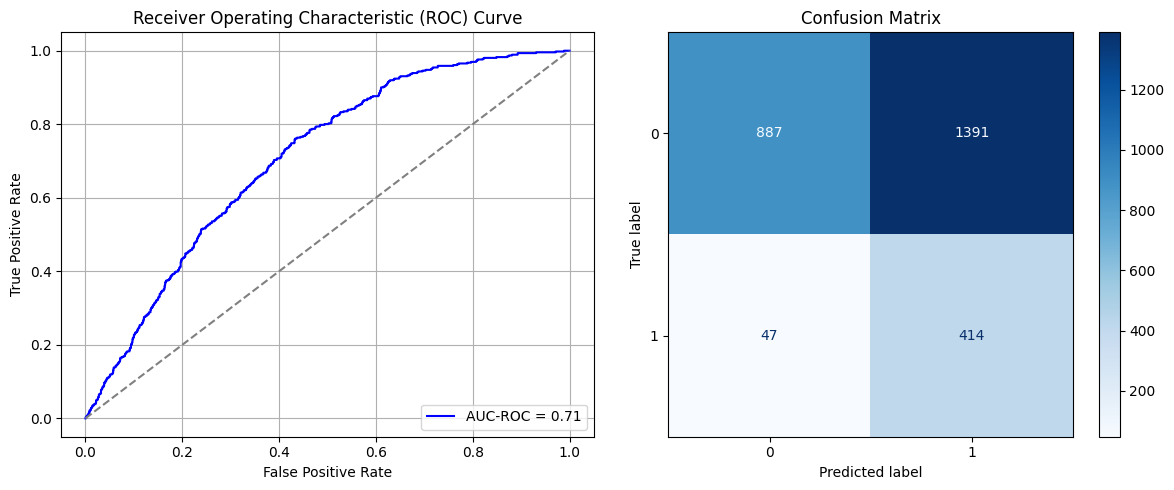

Best threshold based on F1-score: 0.6282730102539062
False Negative Rate: 0.1019522776572668
Time elapsed (performance): 0.9217604799996479


In [ ]:
Transductive_TL(model_source_SRSwR, X_T_test, y_T_test, "Target")

In [ ]:
fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_826 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_827 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_828 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_829 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_830 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_831 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_832 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6550 - loss: 0.6134 - val_AUC: 0.6843 - val_loss: 0.4537
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6959 - loss: 0.4353 - val_AUC: 0.6905 - val_loss: 0.4491
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7154 - loss: 0.4221 - val_AUC: 0.6921 - val_loss: 0.4459
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7072 - loss: 0.4256 - val_AUC: 0.6956 - val_loss: 0.4433
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7152 - loss: 0.4184 - val_AUC: 0.6966 - val_loss: 0.4431
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7292 - loss: 0.4219 - val_AUC: 0.6989 - val_loss: 0.4442
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7155 - loss: 0.4209 - val_AUC: 0.6997 - val_loss: 0.4415
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7288 - loss: 0.4256 - val_AUC: 0.7005 - val_loss: 0.4409
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7280 -

(0.000877963125548727, 0.9978308026030369)

In [ ]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train_SRSwR, X_T_test, y_T_train_SRSwR, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']

# fine_tuning(X_T_train_SRSwR, X_T_test, y_T_train_SRSwR, y_T_test, 0, 4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_833 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_834 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_835 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_836 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_837 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_838 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_839 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7017 - loss: 0.6965 - val_AUC: 0.0000e+00 - val_loss: 0.7927
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7232 - loss: 0.5890 - val_AUC: 0.0000e+00 - val_loss: 0.8511
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7055 - loss: 0.5930 - val_AUC: 0.0000e+00 - val_loss: 0.7795
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7132 - loss: 0.5945 - val_AUC: 0.0000e+00 - val_loss: 0.8465
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7119 - loss: 0.5951 - val_AUC: 0.0000e+00 - val_loss: 0.8800
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7127 - loss: 0.5898 - val_AUC: 0.0000e+00 - val_loss: 0.8891
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7170 - loss: 0.5810 - val_AUC: 0.0000e+00 - val_loss: 0.8200
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7214 - loss: 0.5848 - val_AUC: 0.0000e+00 - val_loss: 0.8033
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_840 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_841 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_842 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_843 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_844 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_845 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_846 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - AUC: 0.7072 - loss: 0.6793 - val_AUC: 0.0000e+00 - val_loss: 0.7547
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7209 - loss: 0.5984 - val_AUC: 0.0000e+00 - val_loss: 0.8583
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7110 - loss: 0.5958 - val_AUC: 0.0000e+00 - val_loss: 0.7984
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7163 - loss: 0.5876 - val_AUC: 0.0000e+00 - val_loss: 0.8221
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7155 - loss: 0.5931 - val_AUC: 0.0000e+00 - val_loss: 0.8273
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7110 - loss: 0.5946 - val_AUC: 0.0000e+00 - val_loss: 0.8170
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7225 - loss: 0.5859 - val_AUC: 0.0000e+00 - val_loss: 0.8401
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7200 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.8552
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_847 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_848 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_849 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_850 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_851 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_852 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_853 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7077 - loss: 0.6788 - val_AUC: 0.0000e+00 - val_loss: 0.7999
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7187 - loss: 0.5978 - val_AUC: 0.0000e+00 - val_loss: 0.8551
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7062 - loss: 0.5969 - val_AUC: 0.0000e+00 - val_loss: 0.8471
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6977 - loss: 0.5985 - val_AUC: 0.0000e+00 - val_loss: 0.8963
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7029 - loss: 0.5947 - val_AUC: 0.0000e+00 - val_loss: 0.8497
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7126 - loss: 0.5869 - val_AUC: 0.0000e+00 - val_loss: 0.8102
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7158 - loss: 0.5854 - val_AUC: 0.0000e+00 - val_loss: 0.8800
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7191 - loss: 0.5898 - val_AUC: 0.0000e+00 - val_loss: 0.8713
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_854 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_855 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_856 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_857 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_858 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_859 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_860 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.6949 - loss: 0.6898 - val_AUC: 0.0000e+00 - val_loss: 0.7863
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7118 - loss: 0.5983 - val_AUC: 0.0000e+00 - val_loss: 0.8022
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7044 - loss: 0.5943 - val_AUC: 0.0000e+00 - val_loss: 0.8336
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7054 - loss: 0.5979 - val_AUC: 0.0000e+00 - val_loss: 0.8975
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7080 - loss: 0.5942 - val_AUC: 0.0000e+00 - val_loss: 0.8816
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7271 - loss: 0.5756 - val_AUC: 0.0000e+00 - val_loss: 0.8439
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7194 - loss: 0.5861 - val_AUC: 0.0000e+00 - val_loss: 0.8578
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7089 - loss: 0.5943 - val_AUC: 0.0000e+00 - val_loss: 0.8688
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_861 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_862 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_863 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_864 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_865 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_866 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_867 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6928 - loss: 0.6949 - val_AUC: 0.0000e+00 - val_loss: 0.7748
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7153 - loss: 0.5884 - val_AUC: 0.0000e+00 - val_loss: 0.8051
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7297 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.8425
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7111 - loss: 0.5916 - val_AUC: 0.0000e+00 - val_loss: 0.8147
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7097 - loss: 0.5905 - val_AUC: 0.0000e+00 - val_loss: 0.8307
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7193 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.8445
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7104 - loss: 0.6009 - val_AUC: 0.0000e+00 - val_loss: 0.9574
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7189 - loss: 0.5774 - val_AUC: 0.0000e+00 - val_loss: 0.7875
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_868 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_869 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_870 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_871 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_872 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_873 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_874 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7066 - loss: 0.6758 - val_AUC: 0.0000e+00 - val_loss: 0.7825
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6958 - loss: 0.6040 - val_AUC: 0.0000e+00 - val_loss: 0.8423
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7130 - loss: 0.5898 - val_AUC: 0.0000e+00 - val_loss: 0.7960
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7186 - loss: 0.5824 - val_AUC: 0.0000e+00 - val_loss: 0.8076
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7086 - loss: 0.5945 - val_AUC: 0.0000e+00 - val_loss: 0.7966
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7167 - loss: 0.5845 - val_AUC: 0.0000e+00 - val_loss: 0.8450
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7242 - loss: 0.5747 - val_AUC: 0.0000e+00 - val_loss: 0.8606
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7157 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.8231
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_875 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_876 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_877 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_878 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_879 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_880 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_881 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6916 - loss: 0.6961 - val_AUC: 0.0000e+00 - val_loss: 0.7675
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7100 - loss: 0.5993 - val_AUC: 0.0000e+00 - val_loss: 0.8157
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7011 - loss: 0.6023 - val_AUC: 0.0000e+00 - val_loss: 0.8338
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7110 - loss: 0.5879 - val_AUC: 0.0000e+00 - val_loss: 0.8419
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7040 - loss: 0.6042 - val_AUC: 0.0000e+00 - val_loss: 0.8994
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7185 - loss: 0.5881 - val_AUC: 0.0000e+00 - val_loss: 0.8276
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7205 - loss: 0.5848 - val_AUC: 0.0000e+00 - val_loss: 0.7859
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7053 - loss: 0.5925 - val_AUC: 0.0000e+00 - val_loss: 0.8529
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_882 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_883 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_884 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_885 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_886 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_887 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_888 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - AUC: 0.6929 - loss: 0.7002 - val_AUC: 0.0000e+00 - val_loss: 0.7990
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7025 - loss: 0.6006 - val_AUC: 0.0000e+00 - val_loss: 0.7800
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7004 - loss: 0.5973 - val_AUC: 0.0000e+00 - val_loss: 0.8191
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7076 - loss: 0.5986 - val_AUC: 0.0000e+00 - val_loss: 0.8007
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7099 - loss: 0.5906 - val_AUC: 0.0000e+00 - val_loss: 0.8039
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7204 - loss: 0.5843 - val_AUC: 0.0000e+00 - val_loss: 0.8744
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7199 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.8444
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7184 - loss: 0.5901 - val_AUC: 0.0000e+00 - val_loss: 0.8465
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_889 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_890 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_891 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_892 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_893 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_894 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_895 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6975 - loss: 0.6833 - val_AUC: 0.0000e+00 - val_loss: 0.8358
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7177 - loss: 0.5998 - val_AUC: 0.0000e+00 - val_loss: 0.8522
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7118 - loss: 0.5894 - val_AUC: 0.0000e+00 - val_loss: 0.8147
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7293 - loss: 0.5809 - val_AUC: 0.0000e+00 - val_loss: 0.8795
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7196 - loss: 0.5857 - val_AUC: 0.0000e+00 - val_loss: 0.8291
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7116 - loss: 0.5874 - val_AUC: 0.0000e+00 - val_loss: 0.7923
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7082 - loss: 0.5946 - val_AUC: 0.0000e+00 - val_loss: 0.8856
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7240 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.8195
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_896 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_897 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_898 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_899 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_900 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_901 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_902 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - AUC: 0.7202 - loss: 0.6639 - val_AUC: 0.0000e+00 - val_loss: 0.8285
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7004 - loss: 0.6042 - val_AUC: 0.0000e+00 - val_loss: 0.8112
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7085 - loss: 0.5946 - val_AUC: 0.0000e+00 - val_loss: 0.8013
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7228 - loss: 0.5875 - val_AUC: 0.0000e+00 - val_loss: 0.8264
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7285 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.8388
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7062 - loss: 0.5920 - val_AUC: 0.0000e+00 - val_loss: 0.8270
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7276 - loss: 0.5814 - val_AUC: 0.0000e+00 - val_loss: 0.8502
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7110 - loss: 0.5869 - val_AUC: 0.0000e+00 - val_loss: 0.7962
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_903 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_904 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_905 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_906 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_907 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_908 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_909 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7035 - loss: 0.6719 - val_AUC: 0.0000e+00 - val_loss: 0.8586
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7043 - loss: 0.6013 - val_AUC: 0.0000e+00 - val_loss: 0.8337
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7148 - loss: 0.5876 - val_AUC: 0.0000e+00 - val_loss: 0.8043
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7065 - loss: 0.5939 - val_AUC: 0.0000e+00 - val_loss: 0.8108
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7127 - loss: 0.5920 - val_AUC: 0.0000e+00 - val_loss: 0.9902
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7190 - loss: 0.5861 - val_AUC: 0.0000e+00 - val_loss: 0.8282
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7056 - loss: 0.5955 - val_AUC: 0.0000e+00 - val_loss: 0.8524
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7226 - loss: 0.5849 - val_AUC: 0.0000e+00 - val_loss: 0.8902
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_910 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_911 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_912 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_913 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_914 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_915 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_916 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7105 - loss: 0.6708 - val_AUC: 0.0000e+00 - val_loss: 0.7785
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7123 - loss: 0.5945 - val_AUC: 0.0000e+00 - val_loss: 0.8470
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7221 - loss: 0.5920 - val_AUC: 0.0000e+00 - val_loss: 0.8453
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7085 - loss: 0.6009 - val_AUC: 0.0000e+00 - val_loss: 0.8539
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7178 - loss: 0.5937 - val_AUC: 0.0000e+00 - val_loss: 0.9231
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7253 - loss: 0.5844 - val_AUC: 0.0000e+00 - val_loss: 0.9199
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7224 - loss: 0.5855 - val_AUC: 0.0000e+00 - val_loss: 0.8683
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7138 - loss: 0.5878 - val_AUC: 0.0000e+00 - val_loss: 0.8086
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_917 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_918 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_919 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_920 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_921 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_922 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_923 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6955 - loss: 0.6847 - val_AUC: 0.0000e+00 - val_loss: 0.7733
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7109 - loss: 0.5969 - val_AUC: 0.0000e+00 - val_loss: 0.7918
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7070 - loss: 0.5947 - val_AUC: 0.0000e+00 - val_loss: 0.8571
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7134 - loss: 0.5926 - val_AUC: 0.0000e+00 - val_loss: 0.8511
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7088 - loss: 0.5894 - val_AUC: 0.0000e+00 - val_loss: 0.8099
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7146 - loss: 0.5923 - val_AUC: 0.0000e+00 - val_loss: 0.8514
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7298 - loss: 0.5780 - val_AUC: 0.0000e+00 - val_loss: 0.8233
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7306 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.8788
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_924 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_925 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_926 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_927 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_928 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_929 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_930 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7009 - loss: 0.6855 - val_AUC: 0.0000e+00 - val_loss: 0.7589
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6978 - loss: 0.6024 - val_AUC: 0.0000e+00 - val_loss: 0.8364
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7109 - loss: 0.5939 - val_AUC: 0.0000e+00 - val_loss: 0.7944
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7067 - loss: 0.5924 - val_AUC: 0.0000e+00 - val_loss: 0.8202
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7187 - loss: 0.5854 - val_AUC: 0.0000e+00 - val_loss: 0.8132
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7251 - loss: 0.5874 - val_AUC: 0.0000e+00 - val_loss: 0.8596
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7125 - loss: 0.5863 - val_AUC: 0.0000e+00 - val_loss: 0.8400
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7192 - loss: 0.5865 - val_AUC: 0.0000e+00 - val_loss: 0.8436
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_931 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_932 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_933 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_934 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_935 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_936 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_937 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7104 - loss: 0.6827 - val_AUC: 0.0000e+00 - val_loss: 0.7813
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6959 - loss: 0.5974 - val_AUC: 0.0000e+00 - val_loss: 0.7890
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7070 - loss: 0.5942 - val_AUC: 0.0000e+00 - val_loss: 0.8427
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7078 - loss: 0.5930 - val_AUC: 0.0000e+00 - val_loss: 0.8376
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7192 - loss: 0.5824 - val_AUC: 0.0000e+00 - val_loss: 0.9102
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7208 - loss: 0.5932 - val_AUC: 0.0000e+00 - val_loss: 0.9337
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7189 - loss: 0.5804 - val_AUC: 0.0000e+00 - val_loss: 0.8612
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7131 - loss: 0.5877 - val_AUC: 0.0000e+00 - val_loss: 0.7827
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_938 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_939 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_940 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_941 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_942 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_943 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_944 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6953 - loss: 0.6854 - val_AUC: 0.0000e+00 - val_loss: 0.7967
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6877 - loss: 0.6089 - val_AUC: 0.0000e+00 - val_loss: 0.8275
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7045 - loss: 0.6005 - val_AUC: 0.0000e+00 - val_loss: 0.8471
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7166 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.7802
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7154 - loss: 0.5894 - val_AUC: 0.0000e+00 - val_loss: 0.8465
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7008 - loss: 0.5862 - val_AUC: 0.0000e+00 - val_loss: 0.8403
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7094 - loss: 0.5905 - val_AUC: 0.0000e+00 - val_loss: 0.8378
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7126 - loss: 0.5884 - val_AUC: 0.0000e+00 - val_loss: 0.7970
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_135"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_945 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_946 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_947 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_948 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_949 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_950 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_951 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6898 - loss: 0.6865 - val_AUC: 0.0000e+00 - val_loss: 0.8448
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6998 - loss: 0.5953 - val_AUC: 0.0000e+00 - val_loss: 0.8239
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6811 - loss: 0.6114 - val_AUC: 0.0000e+00 - val_loss: 0.8267
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7169 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.8129
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7016 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.7322
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7146 - loss: 0.5879 - val_AUC: 0.0000e+00 - val_loss: 0.8444
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7090 - loss: 0.5892 - val_AUC: 0.0000e+00 - val_loss: 0.8182
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7207 - loss: 0.5834 - val_AUC: 0.0000e+00 - val_loss: 0.8027
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_136"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_952 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_953 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_954 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_955 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_956 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_957 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_958 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6962 - loss: 0.6926 - val_AUC: 0.0000e+00 - val_loss: 0.8080
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7106 - loss: 0.6000 - val_AUC: 0.0000e+00 - val_loss: 0.8169
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7132 - loss: 0.5892 - val_AUC: 0.0000e+00 - val_loss: 0.8211
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7224 - loss: 0.5878 - val_AUC: 0.0000e+00 - val_loss: 0.9144
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7289 - loss: 0.5694 - val_AUC: 0.0000e+00 - val_loss: 0.8121
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7031 - loss: 0.5915 - val_AUC: 0.0000e+00 - val_loss: 0.8269
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7088 - loss: 0.5914 - val_AUC: 0.0000e+00 - val_loss: 0.8353
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7097 - loss: 0.5951 - val_AUC: 0.0000e+00 - val_loss: 0.8729
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_137"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_959 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_960 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_961 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_962 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_963 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_964 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_965 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7017 - loss: 0.6899 - val_AUC: 0.0000e+00 - val_loss: 0.7867
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7209 - loss: 0.5932 - val_AUC: 0.0000e+00 - val_loss: 0.8262
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7062 - loss: 0.6028 - val_AUC: 0.0000e+00 - val_loss: 0.8848
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7125 - loss: 0.5905 - val_AUC: 0.0000e+00 - val_loss: 0.8384
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7297 - loss: 0.5773 - val_AUC: 0.0000e+00 - val_loss: 0.8991
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7199 - loss: 0.5873 - val_AUC: 0.0000e+00 - val_loss: 0.8418
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7181 - loss: 0.5872 - val_AUC: 0.0000e+00 - val_loss: 0.8326
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7169 - loss: 0.5885 - val_AUC: 0.0000e+00 - val_loss: 0.8481
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_138"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_966 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_967 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_968 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_969 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_970 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_971 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_972 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6965 - loss: 0.6868 - val_AUC: 0.0000e+00 - val_loss: 0.8135
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7039 - loss: 0.5946 - val_AUC: 0.0000e+00 - val_loss: 0.7922
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7193 - loss: 0.5891 - val_AUC: 0.0000e+00 - val_loss: 0.8137
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7010 - loss: 0.5987 - val_AUC: 0.0000e+00 - val_loss: 0.8446
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7030 - loss: 0.5817 - val_AUC: 0.0000e+00 - val_loss: 0.8220
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7228 - loss: 0.5880 - val_AUC: 0.0000e+00 - val_loss: 0.8390
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7151 - loss: 0.5877 - val_AUC: 0.0000e+00 - val_loss: 0.7677
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7147 - loss: 0.5868 - val_AUC: 0.0000e+00 - val_loss: 0.8150
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_139"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_973 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_974 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_975 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_976 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_977 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_978 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_979 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6945 - loss: 0.6985 - val_AUC: 0.0000e+00 - val_loss: 0.7708
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7128 - loss: 0.5987 - val_AUC: 0.0000e+00 - val_loss: 0.8151
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6914 - loss: 0.6041 - val_AUC: 0.0000e+00 - val_loss: 0.8655
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7122 - loss: 0.5850 - val_AUC: 0.0000e+00 - val_loss: 0.8554
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7033 - loss: 0.5989 - val_AUC: 0.0000e+00 - val_loss: 0.8690
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7147 - loss: 0.5882 - val_AUC: 0.0000e+00 - val_loss: 0.8954
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7277 - loss: 0.5810 - val_AUC: 0.0000e+00 - val_loss: 0.9128
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7226 - loss: 0.5863 - val_AUC: 0.0000e+00 - val_loss: 0.8170
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_140"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_980 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_981 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_982 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_983 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_984 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_985 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_986 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7116 - loss: 0.6724 - val_AUC: 0.0000e+00 - val_loss: 0.7947
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7137 - loss: 0.6027 - val_AUC: 0.0000e+00 - val_loss: 0.8477
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7047 - loss: 0.6001 - val_AUC: 0.0000e+00 - val_loss: 0.8572
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7110 - loss: 0.5901 - val_AUC: 0.0000e+00 - val_loss: 0.8128
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7162 - loss: 0.5923 - val_AUC: 0.0000e+00 - val_loss: 0.7942
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7170 - loss: 0.5858 - val_AUC: 0.0000e+00 - val_loss: 0.8527
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7126 - loss: 0.5933 - val_AUC: 0.0000e+00 - val_loss: 0.8779
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7379 - loss: 0.5747 - val_AUC: 0.0000e+00 - val_loss: 0.9712
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_141"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_987 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_988 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_989 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_990 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_991 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_992 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_993 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.6968 - loss: 0.6920 - val_AUC: 0.0000e+00 - val_loss: 0.8072
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7030 - loss: 0.5979 - val_AUC: 0.0000e+00 - val_loss: 0.8260
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7064 - loss: 0.5998 - val_AUC: 0.0000e+00 - val_loss: 0.8434
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7217 - loss: 0.5891 - val_AUC: 0.0000e+00 - val_loss: 0.8767
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7081 - loss: 0.5892 - val_AUC: 0.0000e+00 - val_loss: 0.8190
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7392 - loss: 0.5705 - val_AUC: 0.0000e+00 - val_loss: 0.8903
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7277 - loss: 0.5782 - val_AUC: 0.0000e+00 - val_loss: 0.7881
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7018 - loss: 0.5975 - val_AUC: 0.0000e+00 - val_loss: 0.8603
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_142"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_994 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_995 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_996 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_997 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_998 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_999 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1000 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6976 - loss: 0.6833 - val_AUC: 0.0000e+00 - val_loss: 0.7709
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7117 - loss: 0.5944 - val_AUC: 0.0000e+00 - val_loss: 0.8441
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6994 - loss: 0.6116 - val_AUC: 0.0000e+00 - val_loss: 0.8981
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7028 - loss: 0.5964 - val_AUC: 0.0000e+00 - val_loss: 0.9307
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7244 - loss: 0.5813 - val_AUC: 0.0000e+00 - val_loss: 0.8543
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7184 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.8497
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7104 - loss: 0.5910 - val_AUC: 0.0000e+00 - val_loss: 0.8264
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7297 - loss: 0.5821 - val_AUC: 0.0000e+00 - val_loss: 0.8857
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_143"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1001 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1002 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1003 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1004 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1005 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1006 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1007 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7079 - loss: 0.6787 - val_AUC: 0.0000e+00 - val_loss: 0.8092
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7171 - loss: 0.5985 - val_AUC: 0.0000e+00 - val_loss: 0.8472
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6896 - loss: 0.6011 - val_AUC: 0.0000e+00 - val_loss: 0.8276
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7233 - loss: 0.5903 - val_AUC: 0.0000e+00 - val_loss: 0.8790
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7187 - loss: 0.5906 - val_AUC: 0.0000e+00 - val_loss: 0.8110
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7029 - loss: 0.5918 - val_AUC: 0.0000e+00 - val_loss: 0.8185
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7160 - loss: 0.5852 - val_AUC: 0.0000e+00 - val_loss: 0.7970
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6919 - loss: 0.5911 - val_AUC: 0.0000e+00 - val_loss: 0.7793
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_144"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1008 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1009 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1010 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1011 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1012 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1013 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1014 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7071 - loss: 0.6786 - val_AUC: 0.0000e+00 - val_loss: 0.8024
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7048 - loss: 0.6069 - val_AUC: 0.0000e+00 - val_loss: 0.8258
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6972 - loss: 0.5931 - val_AUC: 0.0000e+00 - val_loss: 0.8059
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7002 - loss: 0.5992 - val_AUC: 0.0000e+00 - val_loss: 0.8719
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7118 - loss: 0.5899 - val_AUC: 0.0000e+00 - val_loss: 0.8423
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7295 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.8779
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7127 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.8016
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7173 - loss: 0.5893 - val_AUC: 0.0000e+00 - val_loss: 0.8291
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_145"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1015 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1016 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1017 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1018 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1019 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1020 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1021 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6931 - loss: 0.6866 - val_AUC: 0.0000e+00 - val_loss: 0.7825
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7054 - loss: 0.6008 - val_AUC: 0.0000e+00 - val_loss: 0.8283
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7238 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.8267
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7053 - loss: 0.5933 - val_AUC: 0.0000e+00 - val_loss: 0.8688
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7200 - loss: 0.5905 - val_AUC: 0.0000e+00 - val_loss: 0.9735
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6998 - loss: 0.6015 - val_AUC: 0.0000e+00 - val_loss: 0.8387
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7183 - loss: 0.5859 - val_AUC: 0.0000e+00 - val_loss: 0.8338
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7090 - loss: 0.5893 - val_AUC: 0.0000e+00 - val_loss: 0.8427
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_146"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1022 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1023 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1024 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1025 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1026 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1027 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1028 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6999 - loss: 0.6855 - val_AUC: 0.0000e+00 - val_loss: 0.8340
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7077 - loss: 0.5992 - val_AUC: 0.0000e+00 - val_loss: 0.8282
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7003 - loss: 0.5977 - val_AUC: 0.0000e+00 - val_loss: 0.8021
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7130 - loss: 0.5936 - val_AUC: 0.0000e+00 - val_loss: 0.8802
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7167 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.8438
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7210 - loss: 0.5842 - val_AUC: 0.0000e+00 - val_loss: 0.8246
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7116 - loss: 0.5949 - val_AUC: 0.0000e+00 - val_loss: 0.9714
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7145 - loss: 0.5906 - val_AUC: 0.0000e+00 - val_loss: 0.8916
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_147"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1029 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1030 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1031 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1032 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1033 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1034 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1035 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6913 - loss: 0.6910 - val_AUC: 0.0000e+00 - val_loss: 0.7874
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7236 - loss: 0.5945 - val_AUC: 0.0000e+00 - val_loss: 0.8713
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7161 - loss: 0.5897 - val_AUC: 0.0000e+00 - val_loss: 0.8023
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7114 - loss: 0.5916 - val_AUC: 0.0000e+00 - val_loss: 0.8462
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7120 - loss: 0.5923 - val_AUC: 0.0000e+00 - val_loss: 0.8413
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7119 - loss: 0.5862 - val_AUC: 0.0000e+00 - val_loss: 0.8377
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7086 - loss: 0.5919 - val_AUC: 0.0000e+00 - val_loss: 0.8883
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7162 - loss: 0.5835 - val_AUC: 0.0000e+00 - val_loss: 0.7950
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_148"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1036 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1037 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1038 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1039 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1040 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1041 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1042 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.7038 - loss: 0.6763 - val_AUC: 0.0000e+00 - val_loss: 0.8210
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6908 - loss: 0.6096 - val_AUC: 0.0000e+00 - val_loss: 0.8107
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7204 - loss: 0.5895 - val_AUC: 0.0000e+00 - val_loss: 0.8707
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7085 - loss: 0.5979 - val_AUC: 0.0000e+00 - val_loss: 0.8852
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7169 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.8543
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7093 - loss: 0.5923 - val_AUC: 0.0000e+00 - val_loss: 0.8724
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7128 - loss: 0.5951 - val_AUC: 0.0000e+00 - val_loss: 0.8123
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7202 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.8254
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_149"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1043 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1044 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1045 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1046 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1047 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1048 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1049 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - AUC: 0.7039 - loss: 0.6824 - val_AUC: 0.0000e+00 - val_loss: 0.8114
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7128 - loss: 0.6031 - val_AUC: 0.0000e+00 - val_loss: 0.8460
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7058 - loss: 0.5971 - val_AUC: 0.0000e+00 - val_loss: 0.8069
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7199 - loss: 0.5869 - val_AUC: 0.0000e+00 - val_loss: 0.7903
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7057 - loss: 0.6033 - val_AUC: 0.0000e+00 - val_loss: 0.8789
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6946 - loss: 0.6022 - val_AUC: 0.0000e+00 - val_loss: 0.8383
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7185 - loss: 0.5861 - val_AUC: 0.0000e+00 - val_loss: 0.8471
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7197 - loss: 0.5782 - val_AUC: 0.0000e+00 - val_loss: 0.7887
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_150"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1050 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1051 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1052 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1053 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1054 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1055 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1056 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6916 - loss: 0.6947 - val_AUC: 0.0000e+00 - val_loss: 0.8202
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7164 - loss: 0.5986 - val_AUC: 0.0000e+00 - val_loss: 0.8505
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7221 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.8447
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7210 - loss: 0.5807 - val_AUC: 0.0000e+00 - val_loss: 0.8227
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7098 - loss: 0.5931 - val_AUC: 0.0000e+00 - val_loss: 0.8584
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7232 - loss: 0.5857 - val_AUC: 0.0000e+00 - val_loss: 0.8355
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7129 - loss: 0.5818 - val_AUC: 0.0000e+00 - val_loss: 0.7944
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7087 - loss: 0.5950 - val_AUC: 0.0000e+00 - val_loss: 0.8767
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_151"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1057 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1058 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1059 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1060 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1061 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1062 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1063 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6997 - loss: 0.6929 - val_AUC: 0.0000e+00 - val_loss: 0.7517
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7084 - loss: 0.5998 - val_AUC: 0.0000e+00 - val_loss: 0.8588
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7075 - loss: 0.6019 - val_AUC: 0.0000e+00 - val_loss: 0.8672
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6974 - loss: 0.5995 - val_AUC: 0.0000e+00 - val_loss: 0.8570
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7274 - loss: 0.5807 - val_AUC: 0.0000e+00 - val_loss: 0.8818
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7242 - loss: 0.5887 - val_AUC: 0.0000e+00 - val_loss: 0.8680
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7159 - loss: 0.5883 - val_AUC: 0.0000e+00 - val_loss: 0.8348
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7069 - loss: 0.5958 - val_AUC: 0.0000e+00 - val_loss: 0.8415
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1064 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1065 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1066 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1067 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1068 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1069 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1070 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7040 - loss: 0.6838 - val_AUC: 0.0000e+00 - val_loss: 0.7700
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7143 - loss: 0.5918 - val_AUC: 0.0000e+00 - val_loss: 0.8264
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7044 - loss: 0.5988 - val_AUC: 0.0000e+00 - val_loss: 0.8605
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6965 - loss: 0.5989 - val_AUC: 0.0000e+00 - val_loss: 0.8232
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7142 - loss: 0.5943 - val_AUC: 0.0000e+00 - val_loss: 0.8308
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7058 - loss: 0.5931 - val_AUC: 0.0000e+00 - val_loss: 0.8757
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7177 - loss: 0.5897 - val_AUC: 0.0000e+00 - val_loss: 0.8117
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7127 - loss: 0.5956 - val_AUC: 0.0000e+00 - val_loss: 0.8620
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_153"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1071 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1072 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1073 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1074 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1075 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1076 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1077 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7208 - loss: 0.6725 - val_AUC: 0.0000e+00 - val_loss: 0.8238
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7062 - loss: 0.6068 - val_AUC: 0.0000e+00 - val_loss: 0.8374
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7109 - loss: 0.5892 - val_AUC: 0.0000e+00 - val_loss: 0.7998
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7270 - loss: 0.5806 - val_AUC: 0.0000e+00 - val_loss: 0.8441
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7089 - loss: 0.5959 - val_AUC: 0.0000e+00 - val_loss: 0.8380
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7193 - loss: 0.5856 - val_AUC: 0.0000e+00 - val_loss: 0.8653
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7190 - loss: 0.5912 - val_AUC: 0.0000e+00 - val_loss: 0.8559
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7158 - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_154"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1078 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1079 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1080 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1081 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1082 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1083 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1084 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7025 - loss: 0.6802 - val_AUC: 0.0000e+00 - val_loss: 0.7902
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7038 - loss: 0.5999 - val_AUC: 0.0000e+00 - val_loss: 0.8663
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7117 - loss: 0.5893 - val_AUC: 0.0000e+00 - val_loss: 0.8069
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6885 - loss: 0.5973 - val_AUC: 0.0000e+00 - val_loss: 0.8146
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6915 - loss: 0.5975 - val_AUC: 0.0000e+00 - val_loss: 0.7960
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7045 - loss: 0.5947 - val_AUC: 0.0000e+00 - val_loss: 0.8655
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7153 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.8528
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7150 - loss: 0.5882 - val_AUC: 0.0000e+00 - val_loss: 0.8675
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_155"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1085 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1086 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1087 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1088 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1089 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1090 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1091 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6934 - loss: 0.6905 - val_AUC: 0.0000e+00 - val_loss: 0.8022
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7171 - loss: 0.5893 - val_AUC: 0.0000e+00 - val_loss: 0.8292
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6916 - loss: 0.6074 - val_AUC: 0.0000e+00 - val_loss: 0.8196
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6942 - loss: 0.6064 - val_AUC: 0.0000e+00 - val_loss: 0.8367
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7109 - loss: 0.5861 - val_AUC: 0.0000e+00 - val_loss: 0.8127
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7078 - loss: 0.5973 - val_AUC: 0.0000e+00 - val_loss: 0.9141
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7228 - loss: 0.5858 - val_AUC: 0.0000e+00 - val_loss: 0.8399
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7326 - loss: 0.5783 - val_AUC: 0.0000e+00 - val_loss: 0.8650
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_156"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1092 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1093 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1094 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1095 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1096 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1097 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1098 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7107 - loss: 0.6807 - val_AUC: 0.0000e+00 - val_loss: 0.8143
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7004 - loss: 0.6117 - val_AUC: 0.0000e+00 - val_loss: 0.7896
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6909 - loss: 0.6092 - val_AUC: 0.0000e+00 - val_loss: 0.8181
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7035 - loss: 0.5907 - val_AUC: 0.0000e+00 - val_loss: 0.8141
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7069 - loss: 0.5977 - val_AUC: 0.0000e+00 - val_loss: 0.8141
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6966 - loss: 0.5953 - val_AUC: 0.0000e+00 - val_loss: 0.8734
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7058 - loss: 0.5964 - val_AUC: 0.0000e+00 - val_loss: 0.8638
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7150 - loss: 0.5859 - val_AUC: 0.0000e+00 - val_loss: 0.8579
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_157"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1099 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1100 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1101 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1102 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1103 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1104 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1105 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7101 - loss: 0.6802 - val_AUC: 0.0000e+00 - val_loss: 0.8164
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7146 - loss: 0.5997 - val_AUC: 0.0000e+00 - val_loss: 0.8321
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7157 - loss: 0.5897 - val_AUC: 0.0000e+00 - val_loss: 0.8216
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7179 - loss: 0.5842 - val_AUC: 0.0000e+00 - val_loss: 0.7842
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7131 - loss: 0.5924 - val_AUC: 0.0000e+00 - val_loss: 0.8473
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7186 - loss: 0.5799 - val_AUC: 0.0000e+00 - val_loss: 0.8201
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7054 - loss: 0.5869 - val_AUC: 0.0000e+00 - val_loss: 0.8417
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7235 - loss: 0.5855 - val_AUC: 0.0000e+00 - val_loss: 0.8808
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_158"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1106 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1107 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1108 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1109 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1110 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1111 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1112 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6884 - loss: 0.7006 - val_AUC: 0.0000e+00 - val_loss: 0.8123
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6999 - loss: 0.5967 - val_AUC: 0.0000e+00 - val_loss: 0.7829
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7128 - loss: 0.5885 - val_AUC: 0.0000e+00 - val_loss: 0.8106
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7103 - loss: 0.5875 - val_AUC: 0.0000e+00 - val_loss: 0.8243
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7143 - loss: 0.5886 - val_AUC: 0.0000e+00 - val_loss: 0.7924
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7223 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.8810
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7232 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.8550
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7183 - loss: 0.5787 - val_AUC: 0.0000e+00 - val_loss: 0.8567
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_159"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1113 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1114 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1115 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1116 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1117 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1118 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1119 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7013 - loss: 0.6869 - val_AUC: 0.0000e+00 - val_loss: 0.8392
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7111 - loss: 0.5878 - val_AUC: 0.0000e+00 - val_loss: 0.8096
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7186 - loss: 0.5943 - val_AUC: 0.0000e+00 - val_loss: 0.8734
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7229 - loss: 0.5910 - val_AUC: 0.0000e+00 - val_loss: 0.8725
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7148 - loss: 0.5917 - val_AUC: 0.0000e+00 - val_loss: 0.8479
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7161 - loss: 0.5895 - val_AUC: 0.0000e+00 - val_loss: 0.8373
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7014 - loss: 0.5966 - val_AUC: 0.0000e+00 - val_loss: 0.8004
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7223 - loss: 0.5915 - val_AUC: 0.0000e+00 - val_loss: 0.8776
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1120 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1121 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1122 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1123 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1124 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1125 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1126 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7120 - loss: 0.6707 - val_AUC: 0.0000e+00 - val_loss: 0.7758
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7022 - loss: 0.6063 - val_AUC: 0.0000e+00 - val_loss: 0.8694
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7191 - loss: 0.5862 - val_AUC: 0.0000e+00 - val_loss: 0.8628
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7219 - loss: 0.5868 - val_AUC: 0.0000e+00 - val_loss: 0.8560
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7181 - loss: 0.5814 - val_AUC: 0.0000e+00 - val_loss: 0.8528
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7240 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.8345
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7124 - loss: 0.5935 - val_AUC: 0.0000e+00 - val_loss: 0.8077
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7176 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.8182
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_161"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1127 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1128 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1129 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1130 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1131 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1132 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1133 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6965 - loss: 0.6805 - val_AUC: 0.0000e+00 - val_loss: 0.7843
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7057 - loss: 0.6034 - val_AUC: 0.0000e+00 - val_loss: 0.8083
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7261 - loss: 0.5902 - val_AUC: 0.0000e+00 - val_loss: 0.8809
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7232 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.8437
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7119 - loss: 0.5885 - val_AUC: 0.0000e+00 - val_loss: 0.8355
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7161 - loss: 0.5859 - val_AUC: 0.0000e+00 - val_loss: 0.8497
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7155 - loss: 0.5882 - val_AUC: 0.0000e+00 - val_loss: 0.8934
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7165 - loss: 0.5927 - val_AUC: 0.0000e+00 - val_loss: 0.9245
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_162"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1134 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1135 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1136 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1137 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1138 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1139 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1140 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6943 - loss: 0.6961 - val_AUC: 0.0000e+00 - val_loss: 0.7805
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7099 - loss: 0.5937 - val_AUC: 0.0000e+00 - val_loss: 0.8479
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7030 - loss: 0.5980 - val_AUC: 0.0000e+00 - val_loss: 0.8873
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7128 - loss: 0.5963 - val_AUC: 0.0000e+00 - val_loss: 0.8418
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7053 - loss: 0.5898 - val_AUC: 0.0000e+00 - val_loss: 0.8579
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7224 - loss: 0.5844 - val_AUC: 0.0000e+00 - val_loss: 0.8732
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7206 - loss: 0.5854 - val_AUC: 0.0000e+00 - val_loss: 0.8005
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7058 - loss: 0.5902 - val_AUC: 0.0000e+00 - val_loss: 0.8519
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_163"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1141 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1142 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1143 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1144 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1145 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1146 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1147 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7061 - loss: 0.6868 - val_AUC: 0.0000e+00 - val_loss: 0.7788
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7017 - loss: 0.6089 - val_AUC: 0.0000e+00 - val_loss: 0.8375
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6970 - loss: 0.5999 - val_AUC: 0.0000e+00 - val_loss: 0.8438
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7129 - loss: 0.5938 - val_AUC: 0.0000e+00 - val_loss: 0.8455
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7050 - loss: 0.5963 - val_AUC: 0.0000e+00 - val_loss: 0.8039
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7111 - loss: 0.5921 - val_AUC: 0.0000e+00 - val_loss: 0.8605
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7178 - loss: 0.5893 - val_AUC: 0.0000e+00 - val_loss: 0.9100
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7093 - loss: 0.5986 - val_AUC: 0.0000e+00 - val_loss: 0.8591
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_164"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1148 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1149 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1150 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1151 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1152 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1153 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1154 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7146 - loss: 0.6803 - val_AUC: 0.0000e+00 - val_loss: 0.7915
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7002 - loss: 0.6035 - val_AUC: 0.0000e+00 - val_loss: 0.7839
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7067 - loss: 0.5901 - val_AUC: 0.0000e+00 - val_loss: 0.8121
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7201 - loss: 0.5917 - val_AUC: 0.0000e+00 - val_loss: 0.8558
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7056 - loss: 0.5964 - val_AUC: 0.0000e+00 - val_loss: 0.8600
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7173 - loss: 0.5888 - val_AUC: 0.0000e+00 - val_loss: 0.7897
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7311 - loss: 0.5818 - val_AUC: 0.0000e+00 - val_loss: 0.9054
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7164 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.8189
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_165"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1155 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1156 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1157 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1158 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1159 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1160 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1161 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6982 - loss: 0.6899 - val_AUC: 0.0000e+00 - val_loss: 0.8432
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7118 - loss: 0.5976 - val_AUC: 0.0000e+00 - val_loss: 0.8576
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7134 - loss: 0.5899 - val_AUC: 0.0000e+00 - val_loss: 0.8625
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7180 - loss: 0.5874 - val_AUC: 0.0000e+00 - val_loss: 0.7833
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7070 - loss: 0.5952 - val_AUC: 0.0000e+00 - val_loss: 0.8582
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7388 - loss: 0.5740 - val_AUC: 0.0000e+00 - val_loss: 0.8526
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7234 - loss: 0.5819 - val_AUC: 0.0000e+00 - val_loss: 0.8906
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7164 - loss: 0.5862 - val_AUC: 0.0000e+00 - val_loss: 0.8465
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_166"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1162 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1163 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1164 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1165 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1166 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1167 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1168 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6915 - loss: 0.7027 - val_AUC: 0.0000e+00 - val_loss: 0.7907
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7223 - loss: 0.5897 - val_AUC: 0.0000e+00 - val_loss: 0.8158
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7229 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.8594
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7230 - loss: 0.5850 - val_AUC: 0.0000e+00 - val_loss: 0.8408
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7013 - loss: 0.5982 - val_AUC: 0.0000e+00 - val_loss: 0.8030
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7056 - loss: 0.5902 - val_AUC: 0.0000e+00 - val_loss: 0.9442
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7138 - loss: 0.5944 - val_AUC: 0.0000e+00 - val_loss: 0.8272
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7132 - loss: 0.5877 - val_AUC: 0.0000e+00 - val_loss: 0.8510
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_167"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1169 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1170 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1171 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1172 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1173 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1174 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1175 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7181 - loss: 0.6666 - val_AUC: 0.0000e+00 - val_loss: 0.8295
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6988 - loss: 0.6113 - val_AUC: 0.0000e+00 - val_loss: 0.8279
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7058 - loss: 0.6006 - val_AUC: 0.0000e+00 - val_loss: 0.8443
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7158 - loss: 0.5876 - val_AUC: 0.0000e+00 - val_loss: 0.8763
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7262 - loss: 0.5868 - val_AUC: 0.0000e+00 - val_loss: 0.8901
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6996 - loss: 0.6014 - val_AUC: 0.0000e+00 - val_loss: 0.8805
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7148 - loss: 0.5836 - val_AUC: 0.0000e+00 - val_loss: 0.8634
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7213 - loss: 0.5917 - val_AUC: 0.0000e+00 - val_loss: 0.8559
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_168"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1176 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1177 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1178 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1179 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1180 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1181 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1182 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7008 - loss: 0.6855 - val_AUC: 0.0000e+00 - val_loss: 0.7552
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7144 - loss: 0.5935 - val_AUC: 0.0000e+00 - val_loss: 0.8048
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7118 - loss: 0.5960 - val_AUC: 0.0000e+00 - val_loss: 0.8848
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7073 - loss: 0.5884 - val_AUC: 0.0000e+00 - val_loss: 0.7918
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7083 - loss: 0.5880 - val_AUC: 0.0000e+00 - val_loss: 0.8202
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7357 - loss: 0.5757 - val_AUC: 0.0000e+00 - val_loss: 0.8176
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7221 - loss: 0.5824 - val_AUC: 0.0000e+00 - val_loss: 0.7844
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7009 - loss: 0.5978 - val_AUC: 0.0000e+00 - val_loss: 0.8360
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step -

In [ ]:
print(ParamFit)
ParamFit.to_csv('SRSwR_Fine_Tuning.csv')

         FPR       FNR
0   0.292801  0.401302
1   0.256804  0.442516
2   0.101844  0.731020
3   0.090430  0.759219
4   0.115452  0.700651
5   0.244513  0.455531
6   0.145303  0.637744
7   0.121159  0.683297
8   0.057946  0.811280
9   0.186567  0.553145
10  0.093942  0.746204
11  0.119842  0.687636
12  0.160228  0.620390
13  0.182177  0.563991
14  0.218613  0.494577
15  0.245391  0.455531
16  0.159350  0.618221
17  0.165496  0.605206
18  0.042142  0.863341
19  0.187445  0.559653
20  0.139596  0.650759
21  0.127744  0.670282
22  0.285338  0.416486
23  0.110184  0.718004
24  0.157594  0.616052
25  0.128622  0.668113
26  0.233099  0.481562
27  0.219052  0.498915
28  0.181299  0.548807
29  0.299824  0.399132
30  0.172959  0.585683
31  0.298946  0.396963
32  0.164618  0.609544
33  0.212028  0.518438
34  0.208516  0.518438
35  0.200176  0.531453
36  0.136523  0.659436
37  0.302019  0.394794
38  0.271291  0.425163
39  0.190518  0.540130
40  0.250658  0.451193
41  0.219491  0.494577
42  0.15583

## Systematic Sampling:

First, we select a single systematic sample from the majority class, in which $k = \frac{N_0}{N_1}$, where $N_0$ is the majority class size in the source domain and $N_1$ is the minority class in the source domain.

In [20]:
X_S_Sy, y_S_Sy = systematic_undersampler(data_S_full, data_S_full['Diabetes_binary'])
# print(y_S_Sy)

X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)
T_train = pd.concat([X_T_train, y_T_train], axis=1)

X_T_train_Sy, y_T_train_Sy = systematic_undersampler(T_train, T_train[6])
# print(y_T_train_Sy)


31820
208165
6.5419547454431175
5
1964
8992
4.5784114052953155
4


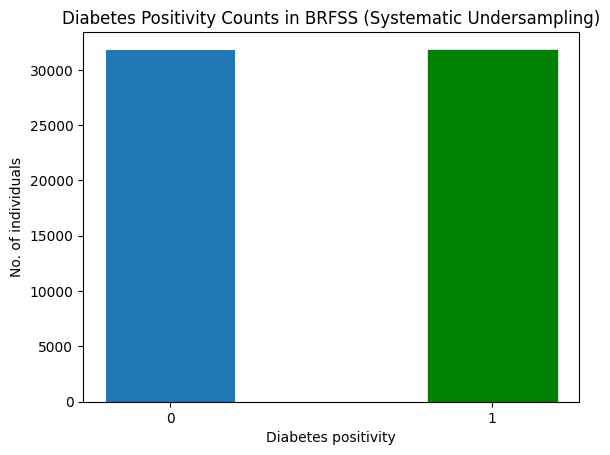

In [ ]:
barlist = plt.bar([str(0),str(1)], y_S_Sy.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Systematic Undersampling)")
plt.show()

In [ ]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (50912, 20)
y_S_train: (50912,)
X_S_test: (12728, 20)
y_S_test: (12728,)


In [ ]:
model_source_Sy = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1183 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1184 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1185 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1186 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1187 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1188 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1189 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7779 - loss: 0.5591 - val_AUC: 0.8203 - val_loss: 0.5169
Epoch 2/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8157 - loss: 0.5192 - val_AUC: 0.8224 - val_loss: 0.5218
Epoch 3/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - AUC: 0.8169 - loss: 0.5170 - val_AUC: 0.8245 - val_loss: 0.5098
Epoch 4/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8204 - loss: 0.5127 - val_AUC: 0.8240 - val_loss: 0.5134
Epoch 5/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8243 - loss: 0.5091 - val_AUC: 0.8257 - val_loss: 0.5138
Epoch 6/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8268 - loss: 0.5051 - val_AUC: 0.8246 - val_loss: 0.5131
Epoch 7/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8238 - loss: 0.5087 - val_AUC: 0.8251 - val_loss: 0.5105
Epoch 8/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8235 - loss: 0.5085 - val_AUC: 0.8253 - val_loss: 0.5094
Epoch 9/10
1273/1273 ━━━━━━━━━━━━━━━━━━━

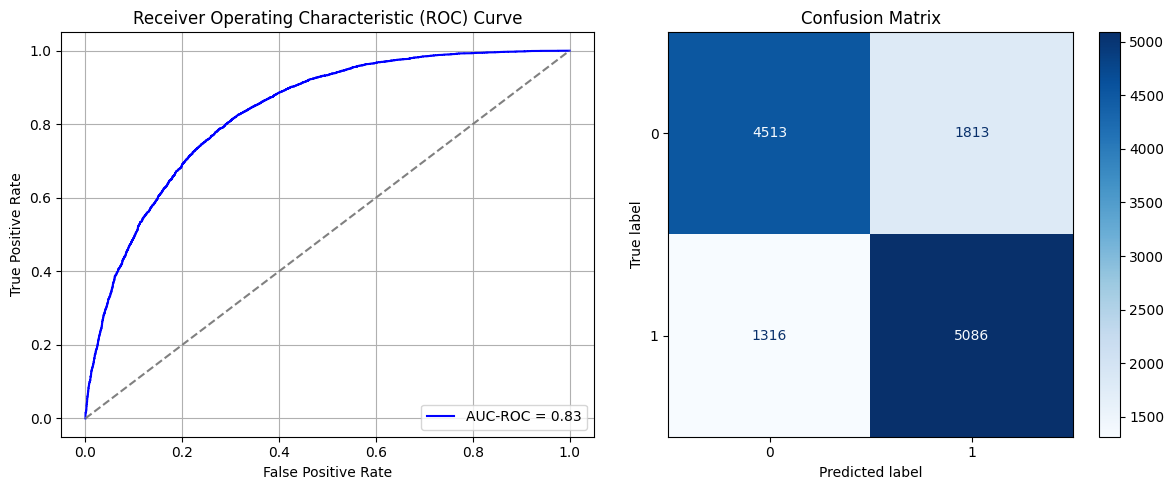

Best threshold based on F1-score: 0.37940481305122375
Time elapsed (performance): 56.4343501190001


<Sequential name=sequential_169, built=True>

In [ ]:
train_and_evaluate(model_source_Sy, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC-ROC: 0.6996656693564207
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.39      0.55      2278
         1.0       0.23      0.90      0.37       461

    accuracy                           0.47      2739
   macro avg       0.59      0.64      0.46      2739
weighted avg       0.83      0.47      0.52      2739

FPR 0.6128182616330115 TPR: 0.9002169197396963 FNR: 0.09978308026030369 TNR: 0.38718173836698855


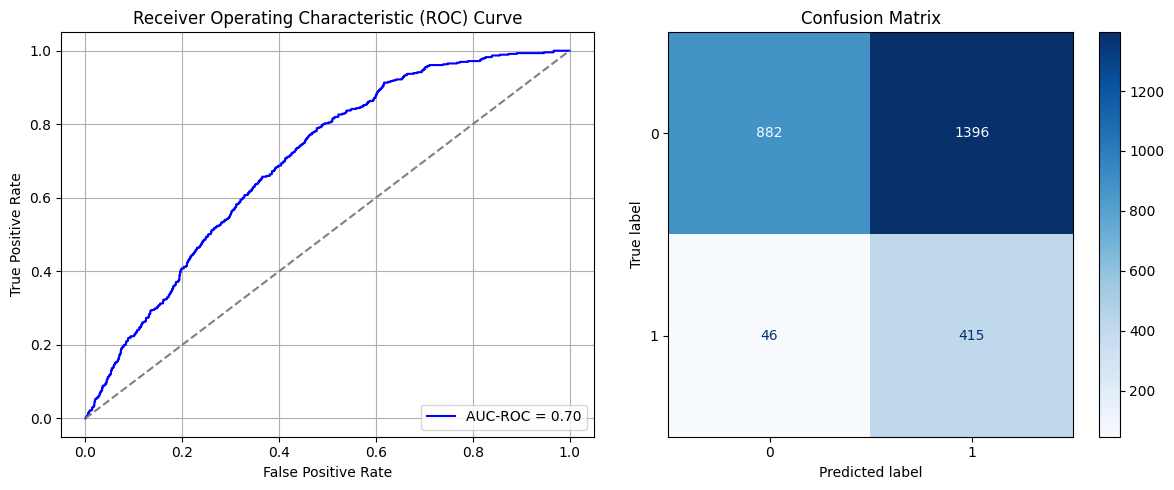

Best threshold based on F1-score: 0.6000612378120422
False Negative Rate: 0.09978308026030369
Time elapsed (performance): 0.9111938249998275


In [ ]:
Transductive_TL(model_source_Sy, X_T_test, y_T_test, "Target")

In [ ]:
fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_170"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1190 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1191 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1192 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1193 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1194 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1195 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1196 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6767 - loss: 0.5732 - val_AUC: 0.6800 - val_loss: 0.4521
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7001 - loss: 0.4345 - val_AUC: 0.6853 - val_loss: 0.4478
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7040 - loss: 0.4365 - val_AUC: 0.6884 - val_loss: 0.4460
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7093 - loss: 0.4177 - val_AUC: 0.6933 - val_loss: 0.4448
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6977 - loss: 0.4310 - val_AUC: 0.6968 - val_loss: 0.4436
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7133 - loss: 0.4252 - val_AUC: 0.7005 - val_loss: 0.4422
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7044 - loss: 0.4151 - val_AUC: 0.7037 - val_loss: 0.4430
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7207 - loss: 0.4210 - val_AUC: 0.7079 - val_loss: 0.4397
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7221 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.0, 1.0)

In [ ]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']


# fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_171"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1197 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1198 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1199 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1200 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1201 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1202 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1203 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6716 - loss: 0.6859 - val_AUC: 0.0000e+00 - val_loss: 0.7875
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7030 - loss: 0.5957 - val_AUC: 0.0000e+00 - val_loss: 0.8609
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6819 - loss: 0.6023 - val_AUC: 0.0000e+00 - val_loss: 0.8674
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6920 - loss: 0.5956 - val_AUC: 0.0000e+00 - val_loss: 0.8201
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6987 - loss: 0.6018 - val_AUC: 0.0000e+00 - val_loss: 0.8716
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7098 - loss: 0.5845 - val_AUC: 0.0000e+00 - val_loss: 0.8677
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7065 - loss: 0.5885 - val_AUC: 0.0000e+00 - val_loss: 0.8185
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6911 - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_172"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1204 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1205 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1206 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1207 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1208 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1209 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1210 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6844 - loss: 0.6728 - val_AUC: 0.0000e+00 - val_loss: 0.8072
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6912 - loss: 0.6069 - val_AUC: 0.0000e+00 - val_loss: 0.8599
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6962 - loss: 0.6055 - val_AUC: 0.0000e+00 - val_loss: 0.8471
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6889 - loss: 0.6025 - val_AUC: 0.0000e+00 - val_loss: 0.9159
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6899 - loss: 0.5929 - val_AUC: 0.0000e+00 - val_loss: 0.8346
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7165 - loss: 0.5871 - val_AUC: 0.0000e+00 - val_loss: 0.8352
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7133 - loss: 0.5856 - val_AUC: 0.0000e+00 - val_loss: 0.9010
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6812 - loss: 0.5999 - val_AUC: 0.0000e+00 - val_loss: 0.8580
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_173"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1211 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1212 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1213 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1214 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1215 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1216 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1217 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.6967 - loss: 0.6580 - val_AUC: 0.0000e+00 - val_loss: 0.8198
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6864 - loss: 0.6033 - val_AUC: 0.0000e+00 - val_loss: 0.8334
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6963 - loss: 0.6053 - val_AUC: 0.0000e+00 - val_loss: 0.8812
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6859 - loss: 0.5957 - val_AUC: 0.0000e+00 - val_loss: 0.8434
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6888 - loss: 0.6096 - val_AUC: 0.0000e+00 - val_loss: 0.9270
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6842 - loss: 0.6028 - val_AUC: 0.0000e+00 - val_loss: 0.8275
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6944 - loss: 0.5965 - val_AUC: 0.0000e+00 - val_loss: 0.8877
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7026 - loss: 0.5992 - val_AUC: 0.0000e+00 - val_loss: 0.9037
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_174"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1218 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1219 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1220 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1221 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1222 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1223 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1224 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6693 - loss: 0.6862 - val_AUC: 0.0000e+00 - val_loss: 0.7948
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6875 - loss: 0.6030 - val_AUC: 0.0000e+00 - val_loss: 0.8319
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6835 - loss: 0.6015 - val_AUC: 0.0000e+00 - val_loss: 0.8087
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6989 - loss: 0.5948 - val_AUC: 0.0000e+00 - val_loss: 0.8428
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6937 - loss: 0.6025 - val_AUC: 0.0000e+00 - val_loss: 0.8235
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6884 - loss: 0.5991 - val_AUC: 0.0000e+00 - val_loss: 0.7889
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6948 - loss: 0.5932 - val_AUC: 0.0000e+00 - val_loss: 0.8039
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6958 - loss: 0.5939 - val_AUC: 0.0000e+00 - val_loss: 0.8387
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_175"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1225 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1226 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1227 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1228 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1229 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1230 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1231 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - AUC: 0.6918 - loss: 0.6755 - val_AUC: 0.0000e+00 - val_loss: 0.7999
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6911 - loss: 0.6094 - val_AUC: 0.0000e+00 - val_loss: 0.8455
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.6880 - loss: 0.6064 - val_AUC: 0.0000e+00 - val_loss: 0.8585
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - AUC: 0.6807 - loss: 0.6120 - val_AUC: 0.0000e+00 - val_loss: 0.8574
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6931 - loss: 0.5986 - val_AUC: 0.0000e+00 - val_loss: 0.8672
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6950 - loss: 0.6029 - val_AUC: 0.0000e+00 - val_loss: 0.8877
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.7025 - loss: 0.5974 - val_AUC: 0.0000e+00 - val_loss: 0.9055
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6949 - loss: 0.5962 - val_AUC: 0.0000e+00 - val_loss: 0.8870
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_176"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1232 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1233 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1234 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1235 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1236 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1237 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1238 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - AUC: 0.6839 - loss: 0.6699 - val_AUC: 0.0000e+00 - val_loss: 0.8110
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6588 - loss: 0.6168 - val_AUC: 0.0000e+00 - val_loss: 0.8385
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6818 - loss: 0.6060 - val_AUC: 0.0000e+00 - val_loss: 0.8490
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6881 - loss: 0.6092 - val_AUC: 0.0000e+00 - val_loss: 0.8987
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7000 - loss: 0.5986 - val_AUC: 0.0000e+00 - val_loss: 0.9262
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6900 - loss: 0.6007 - val_AUC: 0.0000e+00 - val_loss: 0.8740
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7013 - loss: 0.5992 - val_AUC: 0.0000e+00 - val_loss: 0.8732
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6769 - loss: 0.6046 - val_AUC: 0.0000e+00 - val_loss: 0.8894
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_177"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1239 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1240 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1241 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1242 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1243 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1244 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1245 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6963 - loss: 0.6575 - val_AUC: 0.0000e+00 - val_loss: 0.8282
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6978 - loss: 0.5971 - val_AUC: 0.0000e+00 - val_loss: 0.8379
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6924 - loss: 0.6054 - val_AUC: 0.0000e+00 - val_loss: 0.8406
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6898 - loss: 0.6020 - val_AUC: 0.0000e+00 - val_loss: 0.8295
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7011 - loss: 0.6011 - val_AUC: 0.0000e+00 - val_loss: 0.9029
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6963 - loss: 0.5928 - val_AUC: 0.0000e+00 - val_loss: 0.8559
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6857 - loss: 0.6059 - val_AUC: 0.0000e+00 - val_loss: 0.9018
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7031 - loss: 0.5976 - val_AUC: 0.0000e+00 - val_loss: 0.8592
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_178"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1246 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1247 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1248 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1249 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1250 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1251 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1252 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6872 - loss: 0.6886 - val_AUC: 0.0000e+00 - val_loss: 0.8195
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6916 - loss: 0.6107 - val_AUC: 0.0000e+00 - val_loss: 0.8551
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6993 - loss: 0.5955 - val_AUC: 0.0000e+00 - val_loss: 0.8666
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6873 - loss: 0.6070 - val_AUC: 0.0000e+00 - val_loss: 0.8804
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6914 - loss: 0.6023 - val_AUC: 0.0000e+00 - val_loss: 0.8757
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7136 - loss: 0.5916 - val_AUC: 0.0000e+00 - val_loss: 0.8504
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7032 - loss: 0.5921 - val_AUC: 0.0000e+00 - val_loss: 0.8267
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6910 - loss: 0.5957 - val_AUC: 0.0000e+00 - val_loss: 0.8430
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_179"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1253 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1254 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1255 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1256 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1257 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1258 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1259 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6853 - loss: 0.6752 - val_AUC: 0.0000e+00 - val_loss: 0.8167
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6942 - loss: 0.6061 - val_AUC: 0.0000e+00 - val_loss: 0.8812
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6882 - loss: 0.5973 - val_AUC: 0.0000e+00 - val_loss: 0.8464
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7056 - loss: 0.5992 - val_AUC: 0.0000e+00 - val_loss: 0.9027
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6878 - loss: 0.6059 - val_AUC: 0.0000e+00 - val_loss: 0.8962
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6892 - loss: 0.6073 - val_AUC: 0.0000e+00 - val_loss: 0.9184
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6901 - loss: 0.6022 - val_AUC: 0.0000e+00 - val_loss: 0.8771
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6944 - loss: 0.5979 - val_AUC: 0.0000e+00 - val_loss: 0.8817
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_180"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1260 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1261 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1262 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1263 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1264 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1265 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1266 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.6837 - loss: 0.6774 - val_AUC: 0.0000e+00 - val_loss: 0.7979
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6711 - loss: 0.6130 - val_AUC: 0.0000e+00 - val_loss: 0.8435
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6979 - loss: 0.6044 - val_AUC: 0.0000e+00 - val_loss: 0.8818
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7020 - loss: 0.5977 - val_AUC: 0.0000e+00 - val_loss: 0.8567
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6981 - loss: 0.5947 - val_AUC: 0.0000e+00 - val_loss: 0.8338
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6793 - loss: 0.6063 - val_AUC: 0.0000e+00 - val_loss: 0.8557
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7021 - loss: 0.5976 - val_AUC: 0.0000e+00 - val_loss: 0.8749
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6980 - loss: 0.6072 - val_AUC: 0.0000e+00 - val_loss: 0.9186
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_181"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1267 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1268 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1269 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1270 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1271 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1272 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1273 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6862 - loss: 0.6697 - val_AUC: 0.0000e+00 - val_loss: 0.8077
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6831 - loss: 0.6116 - val_AUC: 0.0000e+00 - val_loss: 0.8684
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6853 - loss: 0.6056 - val_AUC: 0.0000e+00 - val_loss: 0.8626
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6897 - loss: 0.6005 - val_AUC: 0.0000e+00 - val_loss: 0.8501
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7046 - loss: 0.5997 - val_AUC: 0.0000e+00 - val_loss: 0.9183
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6857 - loss: 0.6037 - val_AUC: 0.0000e+00 - val_loss: 0.8733
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6899 - loss: 0.5961 - val_AUC: 0.0000e+00 - val_loss: 0.8564
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6863 - loss: 0.6093 - val_AUC: 0.0000e+00 - val_loss: 0.8986
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_182"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1274 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1275 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1276 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1277 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1278 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1279 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1280 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.6769 - loss: 0.6795 - val_AUC: 0.0000e+00 - val_loss: 0.7675
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6928 - loss: 0.6098 - val_AUC: 0.0000e+00 - val_loss: 0.8756
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6880 - loss: 0.5986 - val_AUC: 0.0000e+00 - val_loss: 0.8559
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6978 - loss: 0.5957 - val_AUC: 0.0000e+00 - val_loss: 0.8540
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6788 - loss: 0.6122 - val_AUC: 0.0000e+00 - val_loss: 0.8656
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6991 - loss: 0.5960 - val_AUC: 0.0000e+00 - val_loss: 0.8494
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7005 - loss: 0.5955 - val_AUC: 0.0000e+00 - val_loss: 0.8423
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7100 - loss: 0.5925 - val_AUC: 0.0000e+00 - val_loss: 0.8924
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_183"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1281 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1282 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1283 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1284 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1285 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1286 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1287 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6913 - loss: 0.6671 - val_AUC: 0.0000e+00 - val_loss: 0.8129
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7015 - loss: 0.6068 - val_AUC: 0.0000e+00 - val_loss: 0.8800
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6976 - loss: 0.6088 - val_AUC: 0.0000e+00 - val_loss: 0.8820
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6903 - loss: 0.6052 - val_AUC: 0.0000e+00 - val_loss: 0.8861
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6907 - loss: 0.6016 - val_AUC: 0.0000e+00 - val_loss: 0.8859
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6837 - loss: 0.6025 - val_AUC: 0.0000e+00 - val_loss: 0.8411
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6903 - loss: 0.6038 - val_AUC: 0.0000e+00 - val_loss: 0.8518
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6986 - loss: 0.5979 - val_AUC: 0.0000e+00 - val_loss: 0.8729
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_184"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1288 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1289 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1290 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1291 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1292 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1293 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1294 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7113 - loss: 0.6635 - val_AUC: 0.0000e+00 - val_loss: 0.8188
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6758 - loss: 0.6228 - val_AUC: 0.0000e+00 - val_loss: 0.8432
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7082 - loss: 0.5919 - val_AUC: 0.0000e+00 - val_loss: 0.8443
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6826 - loss: 0.6111 - val_AUC: 0.0000e+00 - val_loss: 0.7992
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6971 - loss: 0.5982 - val_AUC: 0.0000e+00 - val_loss: 0.8107
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7053 - loss: 0.5961 - val_AUC: 0.0000e+00 - val_loss: 0.9090
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6928 - loss: 0.5959 - val_AUC: 0.0000e+00 - val_loss: 0.8220
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7004 - loss: 0.5945 - val_AUC: 0.0000e+00 - val_loss: 0.8985
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_185"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1295 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1296 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1297 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1298 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1299 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1300 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1301 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6790 - loss: 0.6730 - val_AUC: 0.0000e+00 - val_loss: 0.8064
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6994 - loss: 0.6052 - val_AUC: 0.0000e+00 - val_loss: 0.8640
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6929 - loss: 0.6072 - val_AUC: 0.0000e+00 - val_loss: 0.8901
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6898 - loss: 0.6011 - val_AUC: 0.0000e+00 - val_loss: 0.8927
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6918 - loss: 0.6108 - val_AUC: 0.0000e+00 - val_loss: 0.8450
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7060 - loss: 0.5932 - val_AUC: 0.0000e+00 - val_loss: 0.9005
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6968 - loss: 0.6004 - val_AUC: 0.0000e+00 - val_loss: 0.8758
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6940 - loss: 0.6040 - val_AUC: 0.0000e+00 - val_loss: 0.8543
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_186"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1302 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1303 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1304 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1305 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1306 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1307 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1308 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6899 - loss: 0.6766 - val_AUC: 0.0000e+00 - val_loss: 0.8072
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7145 - loss: 0.5958 - val_AUC: 0.0000e+00 - val_loss: 0.8601
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6947 - loss: 0.5994 - val_AUC: 0.0000e+00 - val_loss: 0.8397
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6884 - loss: 0.6060 - val_AUC: 0.0000e+00 - val_loss: 0.8573
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6966 - loss: 0.5970 - val_AUC: 0.0000e+00 - val_loss: 0.8825
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6905 - loss: 0.5998 - val_AUC: 0.0000e+00 - val_loss: 0.8559
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7066 - loss: 0.5937 - val_AUC: 0.0000e+00 - val_loss: 0.9080
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6943 - loss: 0.5991 - val_AUC: 0.0000e+00 - val_loss: 0.8418
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_187"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1309 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1310 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1311 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1312 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1313 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1314 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1315 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6657 - loss: 0.7015 - val_AUC: 0.0000e+00 - val_loss: 0.8090
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6941 - loss: 0.6015 - val_AUC: 0.0000e+00 - val_loss: 0.8784
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6832 - loss: 0.6140 - val_AUC: 0.0000e+00 - val_loss: 0.8685
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6902 - loss: 0.6079 - val_AUC: 0.0000e+00 - val_loss: 0.9056
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6954 - loss: 0.6058 - val_AUC: 0.0000e+00 - val_loss: 0.9039
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7052 - loss: 0.6041 - val_AUC: 0.0000e+00 - val_loss: 0.9425
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6921 - loss: 0.5944 - val_AUC: 0.0000e+00 - val_loss: 0.8600
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7216 - loss: 0.5818 - val_AUC: 0.0000e+00 - val_loss: 0.9156
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_188"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1316 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1317 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1318 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1319 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1320 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1321 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1322 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6975 - loss: 0.6602 - val_AUC: 0.0000e+00 - val_loss: 0.8100
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6812 - loss: 0.6084 - val_AUC: 0.0000e+00 - val_loss: 0.8412
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7018 - loss: 0.5974 - val_AUC: 0.0000e+00 - val_loss: 0.8761
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6872 - loss: 0.5964 - val_AUC: 0.0000e+00 - val_loss: 0.8461
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6968 - loss: 0.6033 - val_AUC: 0.0000e+00 - val_loss: 0.8479
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6839 - loss: 0.6023 - val_AUC: 0.0000e+00 - val_loss: 0.8407
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6975 - loss: 0.5958 - val_AUC: 0.0000e+00 - val_loss: 0.8758
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6865 - loss: 0.6009 - val_AUC: 0.0000e+00 - val_loss: 0.8948
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_189"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1323 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1324 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1325 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1326 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1327 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1328 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1329 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6874 - loss: 0.6744 - val_AUC: 0.0000e+00 - val_loss: 0.8242
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6889 - loss: 0.6071 - val_AUC: 0.0000e+00 - val_loss: 0.8718
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6910 - loss: 0.6116 - val_AUC: 0.0000e+00 - val_loss: 0.8366
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6846 - loss: 0.6104 - val_AUC: 0.0000e+00 - val_loss: 0.9101
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6974 - loss: 0.5960 - val_AUC: 0.0000e+00 - val_loss: 0.9111
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6911 - loss: 0.6050 - val_AUC: 0.0000e+00 - val_loss: 0.8839
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7000 - loss: 0.5920 - val_AUC: 0.0000e+00 - val_loss: 0.8425
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6923 - loss: 0.5975 - val_AUC: 0.0000e+00 - val_loss: 0.8814
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_190"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1330 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1331 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1332 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1333 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1334 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1335 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1336 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6685 - loss: 0.6867 - val_AUC: 0.0000e+00 - val_loss: 0.7846
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6897 - loss: 0.6064 - val_AUC: 0.0000e+00 - val_loss: 0.8567
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6958 - loss: 0.5948 - val_AUC: 0.0000e+00 - val_loss: 0.8664
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6866 - loss: 0.6088 - val_AUC: 0.0000e+00 - val_loss: 0.8884
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6888 - loss: 0.6001 - val_AUC: 0.0000e+00 - val_loss: 0.8439
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6801 - loss: 0.5965 - val_AUC: 0.0000e+00 - val_loss: 0.8120
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7012 - loss: 0.6033 - val_AUC: 0.0000e+00 - val_loss: 0.9018
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6931 - loss: 0.6020 - val_AUC: 0.0000e+00 - val_loss: 0.8659
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_191"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1337 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1338 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1339 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1340 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1341 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1342 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1343 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6916 - loss: 0.6771 - val_AUC: 0.0000e+00 - val_loss: 0.7990
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.6969 - loss: 0.6054 - val_AUC: 0.0000e+00 - val_loss: 0.8632
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.6906 - loss: 0.6054 - val_AUC: 0.0000e+00 - val_loss: 0.9318
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6951 - loss: 0.6057 - val_AUC: 0.0000e+00 - val_loss: 0.8791
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7041 - loss: 0.5939 - val_AUC: 0.0000e+00 - val_loss: 0.8589
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6941 - loss: 0.5890 - val_AUC: 0.0000e+00 - val_loss: 0.8075
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6747 - loss: 0.6121 - val_AUC: 0.0000e+00 - val_loss: 0.8280
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7003 - loss: 0.5938 - val_AUC: 0.0000e+00 - val_loss: 0.8341
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_192"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1344 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1345 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1346 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1347 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1348 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1349 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1350 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.6740 - loss: 0.6881 - val_AUC: 0.0000e+00 - val_loss: 0.8280
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6908 - loss: 0.6027 - val_AUC: 0.0000e+00 - val_loss: 0.8520
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6878 - loss: 0.6041 - val_AUC: 0.0000e+00 - val_loss: 0.8567
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6889 - loss: 0.6038 - val_AUC: 0.0000e+00 - val_loss: 0.9032
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6868 - loss: 0.6083 - val_AUC: 0.0000e+00 - val_loss: 0.8375
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6944 - loss: 0.6016 - val_AUC: 0.0000e+00 - val_loss: 0.8672
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6859 - loss: 0.6000 - val_AUC: 0.0000e+00 - val_loss: 0.8715
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7062 - loss: 0.5893 - val_AUC: 0.0000e+00 - val_loss: 0.8678
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_193"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1351 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1352 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1353 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1354 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1355 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1356 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1357 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6975 - loss: 0.6659 - val_AUC: 0.0000e+00 - val_loss: 0.8052
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6853 - loss: 0.6049 - val_AUC: 0.0000e+00 - val_loss: 0.8448
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6825 - loss: 0.5979 - val_AUC: 0.0000e+00 - val_loss: 0.8184
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6997 - loss: 0.5967 - val_AUC: 0.0000e+00 - val_loss: 0.8814
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6937 - loss: 0.6041 - val_AUC: 0.0000e+00 - val_loss: 0.8515
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6848 - loss: 0.6029 - val_AUC: 0.0000e+00 - val_loss: 0.8568
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6952 - loss: 0.6032 - val_AUC: 0.0000e+00 - val_loss: 0.8703
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6972 - loss: 0.6028 - val_AUC: 0.0000e+00 - val_loss: 0.8362
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_194"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1358 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1359 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1360 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1361 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1362 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1363 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1364 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - AUC: 0.6745 - loss: 0.6868 - val_AUC: 0.0000e+00 - val_loss: 0.7836
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6876 - loss: 0.6064 - val_AUC: 0.0000e+00 - val_loss: 0.8344
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6788 - loss: 0.6114 - val_AUC: 0.0000e+00 - val_loss: 0.8589
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6963 - loss: 0.6012 - val_AUC: 0.0000e+00 - val_loss: 0.8879
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6837 - loss: 0.5974 - val_AUC: 0.0000e+00 - val_loss: 0.8349
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6882 - loss: 0.6081 - val_AUC: 0.0000e+00 - val_loss: 0.8240
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7068 - loss: 0.5918 - val_AUC: 0.0000e+00 - val_loss: 0.8732
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6900 - loss: 0.5999 - val_AUC: 0.0000e+00 - val_loss: 0.8383
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_195"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1365 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1366 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1367 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1368 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1369 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1370 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1371 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6789 - loss: 0.6836 - val_AUC: 0.0000e+00 - val_loss: 0.8211
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6844 - loss: 0.6110 - val_AUC: 0.0000e+00 - val_loss: 0.8221
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6754 - loss: 0.6224 - val_AUC: 0.0000e+00 - val_loss: 0.8652
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6926 - loss: 0.6153 - val_AUC: 0.0000e+00 - val_loss: 0.9108
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6959 - loss: 0.5980 - val_AUC: 0.0000e+00 - val_loss: 0.8292
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6876 - loss: 0.6092 - val_AUC: 0.0000e+00 - val_loss: 0.8963
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6886 - loss: 0.5974 - val_AUC: 0.0000e+00 - val_loss: 0.8599
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7102 - loss: 0.5889 - val_AUC: 0.0000e+00 - val_loss: 0.8364
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_196"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1372 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1373 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1374 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1375 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1376 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1377 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1378 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - AUC: 0.6713 - loss: 0.6890 - val_AUC: 0.0000e+00 - val_loss: 0.8050
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6793 - loss: 0.6147 - val_AUC: 0.0000e+00 - val_loss: 0.8781
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6987 - loss: 0.5988 - val_AUC: 0.0000e+00 - val_loss: 0.8458
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7049 - loss: 0.5944 - val_AUC: 0.0000e+00 - val_loss: 0.8517
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7004 - loss: 0.6005 - val_AUC: 0.0000e+00 - val_loss: 0.9229
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7071 - loss: 0.5845 - val_AUC: 0.0000e+00 - val_loss: 0.8617
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7122 - loss: 0.5924 - val_AUC: 0.0000e+00 - val_loss: 0.8815
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6848 - loss: 0.6029 - val_AUC: 0.0000e+00 - val_loss: 0.8360
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_197"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1379 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1380 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1381 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1382 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1383 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1384 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1385 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6847 - loss: 0.6780 - val_AUC: 0.0000e+00 - val_loss: 0.7950
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6939 - loss: 0.6076 - val_AUC: 0.0000e+00 - val_loss: 0.8662
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6829 - loss: 0.6042 - val_AUC: 0.0000e+00 - val_loss: 0.8418
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6821 - loss: 0.6181 - val_AUC: 0.0000e+00 - val_loss: 0.8949
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7042 - loss: 0.5918 - val_AUC: 0.0000e+00 - val_loss: 0.8449
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6813 - loss: 0.5988 - val_AUC: 0.0000e+00 - val_loss: 0.8255
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6853 - loss: 0.6088 - val_AUC: 0.0000e+00 - val_loss: 0.8169
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7037 - loss: 0.5963 - val_AUC: 0.0000e+00 - val_loss: 0.7966
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_198"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1386 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1387 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1388 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1389 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1390 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1391 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1392 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - AUC: 0.6951 - loss: 0.6657 - val_AUC: 0.0000e+00 - val_loss: 0.8288
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6886 - loss: 0.6029 - val_AUC: 0.0000e+00 - val_loss: 0.8296
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6934 - loss: 0.6028 - val_AUC: 0.0000e+00 - val_loss: 0.8565
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6997 - loss: 0.5935 - val_AUC: 0.0000e+00 - val_loss: 0.8857
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6959 - loss: 0.5988 - val_AUC: 0.0000e+00 - val_loss: 0.8746
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6997 - loss: 0.5969 - val_AUC: 0.0000e+00 - val_loss: 0.8724
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7075 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.8444
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6982 - loss: 0.5969 - val_AUC: 0.0000e+00 - val_loss: 0.8978
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_199"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1393 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1394 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1395 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1396 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1397 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1398 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1399 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7026 - loss: 0.6615 - val_AUC: 0.0000e+00 - val_loss: 0.8028
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6830 - loss: 0.6156 - val_AUC: 0.0000e+00 - val_loss: 0.8567
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6905 - loss: 0.5923 - val_AUC: 0.0000e+00 - val_loss: 0.8333
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6852 - loss: 0.6034 - val_AUC: 0.0000e+00 - val_loss: 0.8306
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6934 - loss: 0.5964 - val_AUC: 0.0000e+00 - val_loss: 0.8405
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6928 - loss: 0.5948 - val_AUC: 0.0000e+00 - val_loss: 0.8832
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7095 - loss: 0.5878 - val_AUC: 0.0000e+00 - val_loss: 0.8440
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7069 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.8181
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_200"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1400 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1401 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1402 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1403 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1404 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1405 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1406 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.6847 - loss: 0.6798 - val_AUC: 0.0000e+00 - val_loss: 0.8008
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6781 - loss: 0.6002 - val_AUC: 0.0000e+00 - val_loss: 0.8477
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6855 - loss: 0.6041 - val_AUC: 0.0000e+00 - val_loss: 0.8671
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6919 - loss: 0.6010 - val_AUC: 0.0000e+00 - val_loss: 0.8778
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7078 - loss: 0.5933 - val_AUC: 0.0000e+00 - val_loss: 0.8584
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6883 - loss: 0.5969 - val_AUC: 0.0000e+00 - val_loss: 0.8560
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7126 - loss: 0.5891 - val_AUC: 0.0000e+00 - val_loss: 0.9017
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7077 - loss: 0.5947 - val_AUC: 0.0000e+00 - val_loss: 0.9212
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1407 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1408 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1409 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1410 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1411 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1412 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1413 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6971 - loss: 0.6664 - val_AUC: 0.0000e+00 - val_loss: 0.8250
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6967 - loss: 0.6030 - val_AUC: 0.0000e+00 - val_loss: 0.8696
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6981 - loss: 0.6032 - val_AUC: 0.0000e+00 - val_loss: 0.9185
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6900 - loss: 0.6075 - val_AUC: 0.0000e+00 - val_loss: 0.8817
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6914 - loss: 0.5939 - val_AUC: 0.0000e+00 - val_loss: 0.8758
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7036 - loss: 0.5961 - val_AUC: 0.0000e+00 - val_loss: 0.8669
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7104 - loss: 0.5907 - val_AUC: 0.0000e+00 - val_loss: 0.8616
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6874 - loss: 0.6093 - val_AUC: 0.0000e+00 - val_loss: 0.8841
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_202"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1414 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1415 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1416 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1417 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1418 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1419 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1420 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.6963 - loss: 0.6728 - val_AUC: 0.0000e+00 - val_loss: 0.8129
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6997 - loss: 0.6010 - val_AUC: 0.0000e+00 - val_loss: 0.8458
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6924 - loss: 0.6029 - val_AUC: 0.0000e+00 - val_loss: 0.8850
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7111 - loss: 0.6006 - val_AUC: 0.0000e+00 - val_loss: 0.8508
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6982 - loss: 0.5933 - val_AUC: 0.0000e+00 - val_loss: 0.8548
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6994 - loss: 0.5959 - val_AUC: 0.0000e+00 - val_loss: 0.8733
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7074 - loss: 0.5927 - val_AUC: 0.0000e+00 - val_loss: 0.8839
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6975 - loss: 0.6040 - val_AUC: 0.0000e+00 - val_loss: 0.8926
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_203"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1421 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1422 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1423 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1424 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1425 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1426 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1427 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6776 - loss: 0.6833 - val_AUC: 0.0000e+00 - val_loss: 0.8140
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7042 - loss: 0.6038 - val_AUC: 0.0000e+00 - val_loss: 0.8964
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6823 - loss: 0.6095 - val_AUC: 0.0000e+00 - val_loss: 0.8281
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6986 - loss: 0.5997 - val_AUC: 0.0000e+00 - val_loss: 0.8958
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7108 - loss: 0.5920 - val_AUC: 0.0000e+00 - val_loss: 0.9080
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7036 - loss: 0.5923 - val_AUC: 0.0000e+00 - val_loss: 0.8451
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7103 - loss: 0.5965 - val_AUC: 0.0000e+00 - val_loss: 0.8240
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6942 - loss: 0.5977 - val_AUC: 0.0000e+00 - val_loss: 0.8077
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_204"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1428 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1429 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1430 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1431 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1432 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1433 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1434 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7034 - loss: 0.6627 - val_AUC: 0.0000e+00 - val_loss: 0.8275
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6964 - loss: 0.6072 - val_AUC: 0.0000e+00 - val_loss: 0.8701
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6771 - loss: 0.6092 - val_AUC: 0.0000e+00 - val_loss: 0.8761
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6906 - loss: 0.6011 - val_AUC: 0.0000e+00 - val_loss: 0.8426
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7033 - loss: 0.5947 - val_AUC: 0.0000e+00 - val_loss: 0.8872
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6689 - loss: 0.6115 - val_AUC: 0.0000e+00 - val_loss: 0.8491
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7078 - loss: 0.5936 - val_AUC: 0.0000e+00 - val_loss: 0.8775
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6939 - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_205"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1435 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1436 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1437 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1438 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1439 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1440 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1441 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6900 - loss: 0.6778 - val_AUC: 0.0000e+00 - val_loss: 0.7996
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6907 - loss: 0.5953 - val_AUC: 0.0000e+00 - val_loss: 0.8223
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6996 - loss: 0.5937 - val_AUC: 0.0000e+00 - val_loss: 0.8851
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6866 - loss: 0.6079 - val_AUC: 0.0000e+00 - val_loss: 0.8420
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6782 - loss: 0.6029 - val_AUC: 0.0000e+00 - val_loss: 0.8348
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6943 - loss: 0.6030 - val_AUC: 0.0000e+00 - val_loss: 0.8736
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7031 - loss: 0.5967 - val_AUC: 0.0000e+00 - val_loss: 0.9158
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6769 - loss: 0.6078 - val_AUC: 0.0000e+00 - val_loss: 0.8668
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_206"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1442 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1443 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1444 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1445 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1446 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1447 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1448 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6724 - loss: 0.6831 - val_AUC: 0.0000e+00 - val_loss: 0.8036
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6888 - loss: 0.6059 - val_AUC: 0.0000e+00 - val_loss: 0.8763
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6998 - loss: 0.6009 - val_AUC: 0.0000e+00 - val_loss: 0.9156
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6970 - loss: 0.6070 - val_AUC: 0.0000e+00 - val_loss: 0.9130
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6880 - loss: 0.6026 - val_AUC: 0.0000e+00 - val_loss: 0.8989
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6798 - loss: 0.6073 - val_AUC: 0.0000e+00 - val_loss: 0.8377
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6917 - loss: 0.6043 - val_AUC: 0.0000e+00 - val_loss: 0.9423
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6933 - loss: 0.5983 - val_AUC: 0.0000e+00 - val_loss: 0.8466
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_207"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1449 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1450 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1451 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1452 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1453 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1454 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1455 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6809 - loss: 0.6791 - val_AUC: 0.0000e+00 - val_loss: 0.8150
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6945 - loss: 0.6031 - val_AUC: 0.0000e+00 - val_loss: 0.8844
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6842 - loss: 0.6161 - val_AUC: 0.0000e+00 - val_loss: 0.9172
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6959 - loss: 0.6013 - val_AUC: 0.0000e+00 - val_loss: 0.8922
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6877 - loss: 0.6070 - val_AUC: 0.0000e+00 - val_loss: 0.8631
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6919 - loss: 0.5945 - val_AUC: 0.0000e+00 - val_loss: 0.8599
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6982 - loss: 0.5962 - val_AUC: 0.0000e+00 - val_loss: 0.7704
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6704 - loss: 0.6099 - val_AUC: 0.0000e+00 - val_loss: 0.8405
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_208"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1456 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1457 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1458 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1459 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1460 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1461 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1462 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7042 - loss: 0.6636 - val_AUC: 0.0000e+00 - val_loss: 0.8083
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6782 - loss: 0.6071 - val_AUC: 0.0000e+00 - val_loss: 0.8534
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6977 - loss: 0.5999 - val_AUC: 0.0000e+00 - val_loss: 0.8577
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7047 - loss: 0.5914 - val_AUC: 0.0000e+00 - val_loss: 0.8314
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7038 - loss: 0.5931 - val_AUC: 0.0000e+00 - val_loss: 0.8348
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6827 - loss: 0.6048 - val_AUC: 0.0000e+00 - val_loss: 0.8733
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6863 - loss: 0.6006 - val_AUC: 0.0000e+00 - val_loss: 0.8231
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6986 - loss: 0.5946 - val_AUC: 0.0000e+00 - val_loss: 0.8404
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_209"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1463 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1464 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1465 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1466 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1467 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1468 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1469 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6945 - loss: 0.6694 - val_AUC: 0.0000e+00 - val_loss: 0.8330
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6853 - loss: 0.5970 - val_AUC: 0.0000e+00 - val_loss: 0.8151
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6890 - loss: 0.5999 - val_AUC: 0.0000e+00 - val_loss: 0.8395
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7013 - loss: 0.5999 - val_AUC: 0.0000e+00 - val_loss: 0.8839
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6964 - loss: 0.5965 - val_AUC: 0.0000e+00 - val_loss: 0.8865
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7120 - loss: 0.5886 - val_AUC: 0.0000e+00 - val_loss: 0.8267
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7028 - loss: 0.5932 - val_AUC: 0.0000e+00 - val_loss: 0.8866
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6997 - loss: 0.5997 - val_AUC: 0.0000e+00 - val_loss: 0.8323
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_210"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1470 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1471 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1472 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1473 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1474 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1475 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1476 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - AUC: 0.6702 - loss: 0.6934 - val_AUC: 0.0000e+00 - val_loss: 0.7646
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6890 - loss: 0.6053 - val_AUC: 0.0000e+00 - val_loss: 0.8334
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7088 - loss: 0.5957 - val_AUC: 0.0000e+00 - val_loss: 0.9001
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6889 - loss: 0.6085 - val_AUC: 0.0000e+00 - val_loss: 0.8665
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7131 - loss: 0.5962 - val_AUC: 0.0000e+00 - val_loss: 0.9256
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6945 - loss: 0.6001 - val_AUC: 0.0000e+00 - val_loss: 0.8312
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6892 - loss: 0.6057 - val_AUC: 0.0000e+00 - val_loss: 0.9015
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6985 - loss: 0.5948 - val_AUC: 0.0000e+00 - val_loss: 0.7729
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_211"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1477 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1478 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1479 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1480 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1481 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1482 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1483 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6959 - loss: 0.6672 - val_AUC: 0.0000e+00 - val_loss: 0.8114
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7003 - loss: 0.5990 - val_AUC: 0.0000e+00 - val_loss: 0.8825
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6836 - loss: 0.6022 - val_AUC: 0.0000e+00 - val_loss: 0.8427
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6852 - loss: 0.6041 - val_AUC: 0.0000e+00 - val_loss: 0.8388
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6904 - loss: 0.6028 - val_AUC: 0.0000e+00 - val_loss: 0.8713
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6948 - loss: 0.5998 - val_AUC: 0.0000e+00 - val_loss: 0.8626
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6918 - loss: 0.6021 - val_AUC: 0.0000e+00 - val_loss: 0.8563
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7017 - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_212"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1484 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1485 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1486 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1487 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1488 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1489 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1490 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6797 - loss: 0.6905 - val_AUC: 0.0000e+00 - val_loss: 0.8128
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6813 - loss: 0.6067 - val_AUC: 0.0000e+00 - val_loss: 0.8486
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6799 - loss: 0.6186 - val_AUC: 0.0000e+00 - val_loss: 0.8622
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7152 - loss: 0.5903 - val_AUC: 0.0000e+00 - val_loss: 0.8592
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6974 - loss: 0.5957 - val_AUC: 0.0000e+00 - val_loss: 0.8253
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6944 - loss: 0.5988 - val_AUC: 0.0000e+00 - val_loss: 0.8470
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6874 - loss: 0.6044 - val_AUC: 0.0000e+00 - val_loss: 0.9119
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6977 - loss: 0.5984 - val_AUC: 0.0000e+00 - val_loss: 0.8678
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_213"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1491 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1492 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1493 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1494 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1495 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1496 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1497 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6868 - loss: 0.6829 - val_AUC: 0.0000e+00 - val_loss: 0.7834
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6716 - loss: 0.6145 - val_AUC: 0.0000e+00 - val_loss: 0.8303
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6958 - loss: 0.6082 - val_AUC: 0.0000e+00 - val_loss: 0.8668
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6969 - loss: 0.5908 - val_AUC: 0.0000e+00 - val_loss: 0.8237
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6968 - loss: 0.6007 - val_AUC: 0.0000e+00 - val_loss: 0.9137
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6884 - loss: 0.6058 - val_AUC: 0.0000e+00 - val_loss: 0.8285
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6923 - loss: 0.6015 - val_AUC: 0.0000e+00 - val_loss: 0.8610
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7009 - loss: 0.5933 - val_AUC: 0.0000e+00 - val_loss: 0.8374
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_214"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1498 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1499 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1500 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1501 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1502 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1503 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1504 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.6755 - loss: 0.6795 - val_AUC: 0.0000e+00 - val_loss: 0.8106
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6884 - loss: 0.6015 - val_AUC: 0.0000e+00 - val_loss: 0.8227
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6907 - loss: 0.5998 - val_AUC: 0.0000e+00 - val_loss: 0.8641
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6997 - loss: 0.6041 - val_AUC: 0.0000e+00 - val_loss: 0.9154
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.6802 - loss: 0.6070 - val_AUC: 0.0000e+00 - val_loss: 0.8433
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6904 - loss: 0.6034 - val_AUC: 0.0000e+00 - val_loss: 0.8444
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6878 - loss: 0.6032 - val_AUC: 0.0000e+00 - val_loss: 0.8878
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7027 - loss: 0.5985 - val_AUC: 0.0000e+00 - val_loss: 0.8934
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_215"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1505 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1506 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1507 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1508 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1509 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1510 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1511 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6882 - loss: 0.6742 - val_AUC: 0.0000e+00 - val_loss: 0.8187
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7019 - loss: 0.5983 - val_AUC: 0.0000e+00 - val_loss: 0.8400
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6944 - loss: 0.6017 - val_AUC: 0.0000e+00 - val_loss: 0.8934
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6941 - loss: 0.5989 - val_AUC: 0.0000e+00 - val_loss: 0.9159
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6915 - loss: 0.6019 - val_AUC: 0.0000e+00 - val_loss: 0.8616
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7158 - loss: 0.5824 - val_AUC: 0.0000e+00 - val_loss: 0.7867
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7151 - loss: 0.5916 - val_AUC: 0.0000e+00 - val_loss: 0.9009
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7197 - loss: 0.5883 - val_AUC: 0.0000e+00 - val_loss: 0.8936
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_216"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1512 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1513 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1514 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1515 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1516 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1517 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1518 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - AUC: 0.6928 - loss: 0.6658 - val_AUC: 0.0000e+00 - val_loss: 0.8086
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6883 - loss: 0.6116 - val_AUC: 0.0000e+00 - val_loss: 0.8664
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6917 - loss: 0.6048 - val_AUC: 0.0000e+00 - val_loss: 0.8631
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6900 - loss: 0.6088 - val_AUC: 0.0000e+00 - val_loss: 0.8307
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7004 - loss: 0.5951 - val_AUC: 0.0000e+00 - val_loss: 0.8105
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6855 - loss: 0.6031 - val_AUC: 0.0000e+00 - val_loss: 0.8882
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6990 - loss: 0.6002 - val_AUC: 0.0000e+00 - val_loss: 0.8463
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7038 - loss: 0.5974 - val_AUC: 0.0000e+00 - val_loss: 0.8441
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_217"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1519 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1520 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1521 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1522 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1523 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1524 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1525 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6708 - loss: 0.6828 - val_AUC: 0.0000e+00 - val_loss: 0.7943
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6742 - loss: 0.6135 - val_AUC: 0.0000e+00 - val_loss: 0.8080
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6972 - loss: 0.6009 - val_AUC: 0.0000e+00 - val_loss: 0.8357
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6916 - loss: 0.6095 - val_AUC: 0.0000e+00 - val_loss: 0.8595
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6971 - loss: 0.6055 - val_AUC: 0.0000e+00 - val_loss: 0.8901
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7106 - loss: 0.5886 - val_AUC: 0.0000e+00 - val_loss: 0.8372
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6921 - loss: 0.6033 - val_AUC: 0.0000e+00 - val_loss: 0.9247
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7041 - loss: 0.5948 - val_AUC: 0.0000e+00 - val_loss: 0.9088
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_218"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1526 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1527 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1528 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1529 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1530 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1531 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1532 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6803 - loss: 0.6861 - val_AUC: 0.0000e+00 - val_loss: 0.8016
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6887 - loss: 0.6047 - val_AUC: 0.0000e+00 - val_loss: 0.8455
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6833 - loss: 0.6079 - val_AUC: 0.0000e+00 - val_loss: 0.8412
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6785 - loss: 0.6203 - val_AUC: 0.0000e+00 - val_loss: 0.9018
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6888 - loss: 0.6086 - val_AUC: 0.0000e+00 - val_loss: 0.8714
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6951 - loss: 0.5943 - val_AUC: 0.0000e+00 - val_loss: 0.8513
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6947 - loss: 0.6001 - val_AUC: 0.0000e+00 - val_loss: 0.8252
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6929 - loss: 0.5966 - val_AUC: 0.0000e+00 - val_loss: 0.8141
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_219"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1533 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1534 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1535 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1536 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1537 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1538 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1539 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - AUC: 0.6833 - loss: 0.6810 - val_AUC: 0.0000e+00 - val_loss: 0.8209
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6846 - loss: 0.6033 - val_AUC: 0.0000e+00 - val_loss: 0.8269
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6865 - loss: 0.6065 - val_AUC: 0.0000e+00 - val_loss: 0.8674
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6873 - loss: 0.6008 - val_AUC: 0.0000e+00 - val_loss: 0.8490
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7028 - loss: 0.6020 - val_AUC: 0.0000e+00 - val_loss: 0.8863
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7056 - loss: 0.5967 - val_AUC: 0.0000e+00 - val_loss: 0.8723
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6948 - loss: 0.5934 - val_AUC: 0.0000e+00 - val_loss: 0.8348
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6981 - loss: 0.5913 - val_AUC: 0.0000e+00 - val_loss: 0.8354
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_220"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1540 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1541 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1542 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1543 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1544 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1545 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1546 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6772 - loss: 0.6842 - val_AUC: 0.0000e+00 - val_loss: 0.7973
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6977 - loss: 0.5991 - val_AUC: 0.0000e+00 - val_loss: 0.8578
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6739 - loss: 0.6081 - val_AUC: 0.0000e+00 - val_loss: 0.8459
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7018 - loss: 0.5850 - val_AUC: 0.0000e+00 - val_loss: 0.8448
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6747 - loss: 0.6102 - val_AUC: 0.0000e+00 - val_loss: 0.8254
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6911 - loss: 0.6048 - val_AUC: 0.0000e+00 - val_loss: 0.8823
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7089 - loss: 0.5972 - val_AUC: 0.0000e+00 - val_loss: 0.8739
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.6945 - loss: 0.6048 - val_AUC: 0.0000e+00 - val_loss: 0.9080
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step -

In [ ]:
print(ParamFit)
ParamFit.to_csv('Sy_Fine_Tuning.csv')

         FPR       FNR
0   0.208516  0.563991
1   0.118964  0.722343
2   0.197981  0.581345
3   0.136084  0.689805
4   0.178227  0.620390
5   0.089113  0.767896
6   0.187884  0.592191
7   0.183933  0.613883
8   0.139157  0.691974
9   0.161984  0.659436
10  0.130378  0.700651
11  0.165496  0.657267
12  0.278314  0.451193
13  0.167252  0.646421
14  0.102283  0.748373
15  0.107112  0.739696
16  0.154083  0.670282
17  0.162423  0.657267
18  0.171203  0.642082
19  0.123793  0.709328
20  0.112379  0.731020
21  0.139157  0.694143
22  0.122915  0.718004
23  0.212906  0.559653
24  0.136962  0.696312
25  0.105795  0.741866
26  0.167691  0.648590
27  0.191396  0.594360
28  0.224759  0.527115
29  0.133011  0.702820
30  0.211150  0.555315
31  0.176471  0.635575
32  0.105795  0.739696
33  0.107989  0.737527
34  0.158472  0.665944
35  0.221247  0.537961
36  0.131255  0.700651
37  0.170764  0.655098
38  0.186128  0.605206
39  0.091308  0.772234
40  0.050922  0.861171
41  0.162423  0.652928
42  0.14574

## Systematic Sampling (multiple samples):

Now, we investigate the possibility of conducting $m$ systematic samples, each with a sampling interval of $k=m*\frac{N_0}{N_1}$, and obtaining the undersampled majority class data using all $m$ systematic samples combined. This may more closely approximate SRS sampling.

For convenience, we take $m=10$ in this case.

In [21]:
X_S_Sy, y_S_Sy = multi_systematic_undersampler(data_S_full, data_S_full['Diabetes_binary'], 10)
# print(y_S_Sy)

X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)
T_train = pd.concat([X_T_train, y_T_train], axis=1)

X_T_train_Sy, y_T_train_Sy = multi_systematic_undersampler(T_train, T_train[6], 10)
# print(y_T_train_Sy)

31820
208165
6.5419547454431175
1964
8992
4.5784114052953155


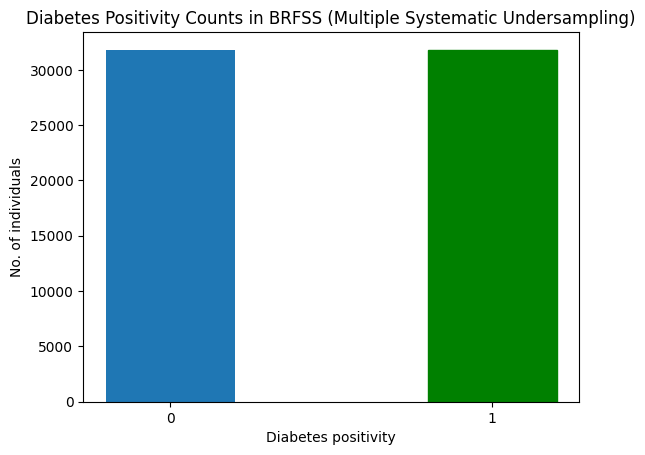

In [ ]:
barlist = plt.bar([str(0),str(1)], y_S_Sy.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Multiple Systematic Undersampling)")
plt.show()

In [ ]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (50912, 20)
y_S_train: (50912,)
X_S_test: (12728, 20)
y_S_test: (12728,)


In [ ]:
model_source_Sy = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_221"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1547 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1548 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1549 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1550 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1551 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1552 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1553 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7836 - loss: 0.5597 - val_AUC: 0.8244 - val_loss: 0.5287
Epoch 2/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - AUC: 0.8226 - loss: 0.5116 - val_AUC: 0.8268 - val_loss: 0.5078
Epoch 3/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - AUC: 0.8228 - loss: 0.5101 - val_AUC: 0.8297 - val_loss: 0.5046
Epoch 4/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - AUC: 0.8268 - loss: 0.5050 - val_AUC: 0.8307 - val_loss: 0.5033
Epoch 5/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - AUC: 0.8292 - loss: 0.5018 - val_AUC: 0.8308 - val_loss: 0.5032
Epoch 6/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.8323 - loss: 0.4989 - val_AUC: 0.8300 - val_loss: 0.5108
Epoch 7/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8331 - loss: 0.4978 - val_AUC: 0.8331 - val_loss: 0.5019
Epoch 8/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8318 - loss: 0.4987 - val_AUC: 0.8311 - val_loss: 0.5029
Epoch 9/10
1273/1273 ━━━━━━━━━━━━━━━━

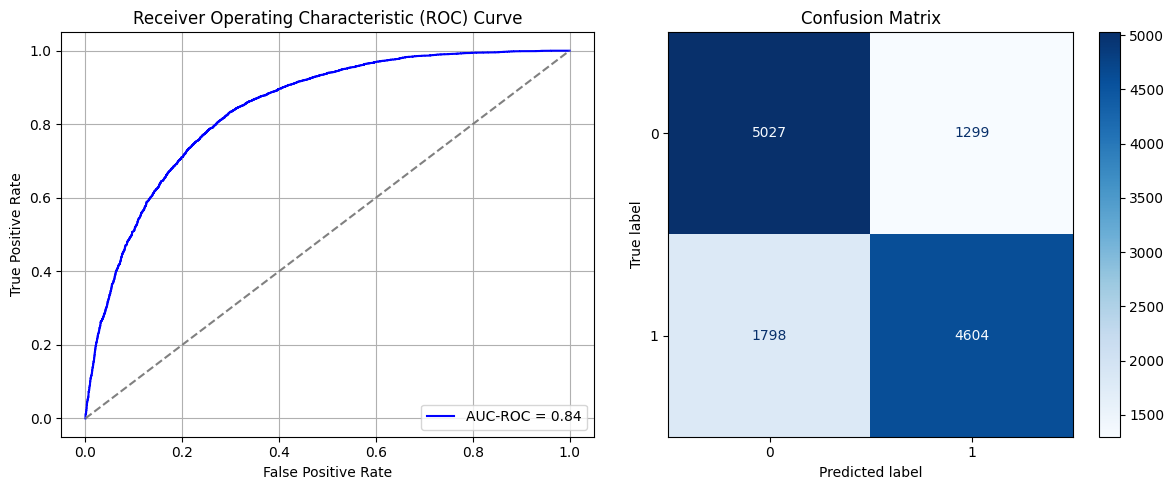

Best threshold based on F1-score: 0.3599730134010315
Time elapsed (performance): 89.23379450599987


<Sequential name=sequential_221, built=True>

In [ ]:
train_and_evaluate(model_source_Sy, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC-ROC: 0.7152599894492065
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.44      0.60      2278
         1.0       0.23      0.85      0.37       461

    accuracy                           0.51      2739
   macro avg       0.58      0.64      0.48      2739
weighted avg       0.82      0.51      0.56      2739

FPR 0.5627743634767339 TPR: 0.8481561822125814 FNR: 0.15184381778741865 TNR: 0.43722563652326607


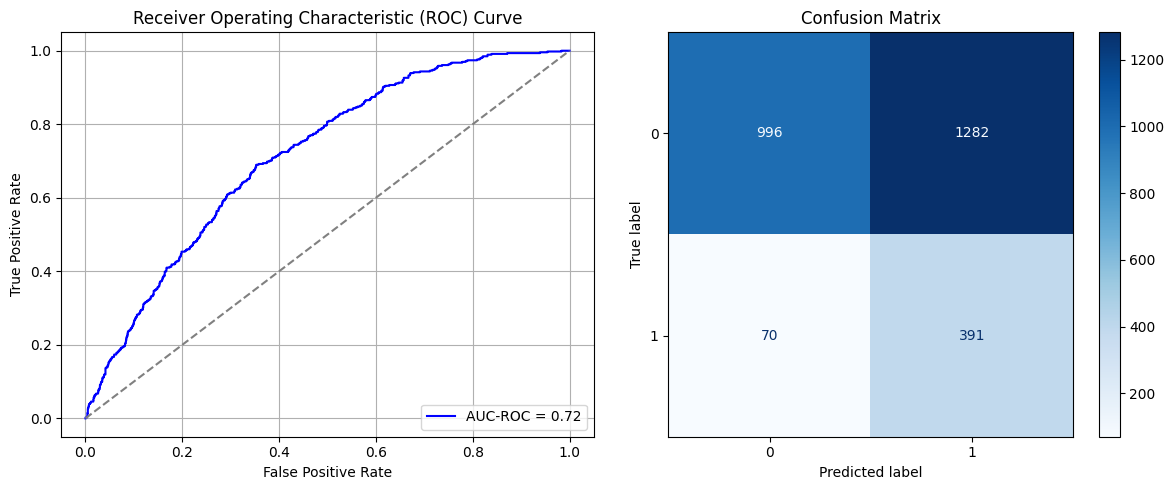

Best threshold based on F1-score: 0.6688798666000366
False Negative Rate: 0.15184381778741865
Time elapsed (performance): 0.8237615379998715


In [ ]:
Transductive_TL(model_source_Sy, X_T_test, y_T_test, "Target")

In [ ]:
fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_222"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1554 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1555 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1556 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1557 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1558 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1559 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1560 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.6722 - loss: 0.5856 - val_AUC: 0.6777 - val_loss: 0.4520
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7035 - loss: 0.4293 - val_AUC: 0.6938 - val_loss: 0.4450
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7065 - loss: 0.4278 - val_AUC: 0.7035 - val_loss: 0.4422
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7236 - loss: 0.4168 - val_AUC: 0.7139 - val_loss: 0.4360
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7417 - loss: 0.4120 - val_AUC: 0.7225 - val_loss: 0.4385
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7376 - loss: 0.4172 - val_AUC: 0.7297 - val_loss: 0.4308
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7463 - loss: 0.4156 - val_AUC: 0.7375 - val_loss: 0.4292
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7495 - loss: 0.4030 - val_AUC: 0.7402 - val_loss: 0.4254
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AU

(0.005706760316066725, 0.9544468546637744)

In [ ]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']

# fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_223"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1561 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1562 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1563 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1564 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1565 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1566 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1567 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7273 - loss: 0.6387 - val_AUC: 0.0000e+00 - val_loss: 0.7668
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7137 - loss: 0.5941 - val_AUC: 0.0000e+00 - val_loss: 0.8250
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7093 - loss: 0.5865 - val_AUC: 0.0000e+00 - val_loss: 0.8124
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7309 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.8617
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7106 - loss: 0.5880 - val_AUC: 0.0000e+00 - val_loss: 0.7905
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7076 - loss: 0.5886 - val_AUC: 0.0000e+00 - val_loss: 0.8112
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7308 - loss: 0.5753 - val_AUC: 0.0000e+00 - val_loss: 0.7846
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7329 - loss: 0.5720 - val_AUC: 0.0000e+00 - val_loss: 0.8152
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1568 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1569 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1570 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1571 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1572 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1573 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1574 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6992 - loss: 0.6693 - val_AUC: 0.0000e+00 - val_loss: 0.7966
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7226 - loss: 0.5842 - val_AUC: 0.0000e+00 - val_loss: 0.8379
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7152 - loss: 0.5831 - val_AUC: 0.0000e+00 - val_loss: 0.8246
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7349 - loss: 0.5728 - val_AUC: 0.0000e+00 - val_loss: 0.9120
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7285 - loss: 0.5769 - val_AUC: 0.0000e+00 - val_loss: 0.8388
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7309 - loss: 0.5772 - val_AUC: 0.0000e+00 - val_loss: 0.7940
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7388 - loss: 0.5611 - val_AUC: 0.0000e+00 - val_loss: 0.8065
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7348 - loss: 0.5735 - val_AUC: 0.0000e+00 - val_loss: 0.8210
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_225"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1575 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1576 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1577 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1578 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1579 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1580 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1581 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7054 - loss: 0.6702 - val_AUC: 0.0000e+00 - val_loss: 0.7859
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7113 - loss: 0.5921 - val_AUC: 0.0000e+00 - val_loss: 0.8276
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7174 - loss: 0.5866 - val_AUC: 0.0000e+00 - val_loss: 0.8545
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7225 - loss: 0.5667 - val_AUC: 0.0000e+00 - val_loss: 0.7795
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7245 - loss: 0.5764 - val_AUC: 0.0000e+00 - val_loss: 0.7939
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7244 - loss: 0.5829 - val_AUC: 0.0000e+00 - val_loss: 0.8097
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7254 - loss: 0.5771 - val_AUC: 0.0000e+00 - val_loss: 0.7437
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7361 - loss: 0.5720 - val_AUC: 0.0000e+00 - val_loss: 0.8170
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_226"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1582 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1583 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1584 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1585 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1586 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1587 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1588 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7222 - loss: 0.6529 - val_AUC: 0.0000e+00 - val_loss: 0.7991
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6938 - loss: 0.6128 - val_AUC: 0.0000e+00 - val_loss: 0.8455
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7177 - loss: 0.5828 - val_AUC: 0.0000e+00 - val_loss: 0.8161
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7146 - loss: 0.5858 - val_AUC: 0.0000e+00 - val_loss: 0.7902
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7114 - loss: 0.5797 - val_AUC: 0.0000e+00 - val_loss: 0.7748
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7271 - loss: 0.5835 - val_AUC: 0.0000e+00 - val_loss: 0.8226
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7362 - loss: 0.5729 - val_AUC: 0.0000e+00 - val_loss: 0.8007
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7340 - loss: 0.5719 - val_AUC: 0.0000e+00 - val_loss: 0.7656
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_227"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1589 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1590 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1591 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1592 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1593 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1594 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1595 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7207 - loss: 0.6544 - val_AUC: 0.0000e+00 - val_loss: 0.7838
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7112 - loss: 0.5935 - val_AUC: 0.0000e+00 - val_loss: 0.8289
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7139 - loss: 0.5886 - val_AUC: 0.0000e+00 - val_loss: 0.8197
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7223 - loss: 0.5895 - val_AUC: 0.0000e+00 - val_loss: 0.8538
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7322 - loss: 0.5752 - val_AUC: 0.0000e+00 - val_loss: 0.8026
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7280 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.8043
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7392 - loss: 0.5714 - val_AUC: 0.0000e+00 - val_loss: 0.8223
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7330 - loss: 0.5745 - val_AUC: 0.0000e+00 - val_loss: 0.7783
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_228"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1596 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1597 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1598 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1599 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1600 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1601 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1602 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7098 - loss: 0.6509 - val_AUC: 0.0000e+00 - val_loss: 0.8112
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7275 - loss: 0.5826 - val_AUC: 0.0000e+00 - val_loss: 0.8219
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7170 - loss: 0.5765 - val_AUC: 0.0000e+00 - val_loss: 0.8120
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7219 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.8560
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7145 - loss: 0.5849 - val_AUC: 0.0000e+00 - val_loss: 0.8232
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7286 - loss: 0.5792 - val_AUC: 0.0000e+00 - val_loss: 0.8380
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7221 - loss: 0.5864 - val_AUC: 0.0000e+00 - val_loss: 0.7986
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7307 - loss: 0.5811 - val_AUC: 0.0000e+00 - val_loss: 0.8095
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_229"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1603 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1604 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1605 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1606 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1607 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1608 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1609 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7068 - loss: 0.6614 - val_AUC: 0.0000e+00 - val_loss: 0.7828
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7132 - loss: 0.5931 - val_AUC: 0.0000e+00 - val_loss: 0.8382
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7240 - loss: 0.5736 - val_AUC: 0.0000e+00 - val_loss: 0.8113
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7089 - loss: 0.5912 - val_AUC: 0.0000e+00 - val_loss: 0.8354
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7325 - loss: 0.5699 - val_AUC: 0.0000e+00 - val_loss: 0.8310
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7197 - loss: 0.5850 - val_AUC: 0.0000e+00 - val_loss: 0.8671
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7322 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.7762
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7566 - loss: 0.5581 - val_AUC: 0.0000e+00 - val_loss: 0.8127
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_230"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1610 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1611 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1612 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1613 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1614 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1615 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1616 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7118 - loss: 0.6534 - val_AUC: 0.0000e+00 - val_loss: 0.7705
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7105 - loss: 0.5864 - val_AUC: 0.0000e+00 - val_loss: 0.8086
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7078 - loss: 0.5890 - val_AUC: 0.0000e+00 - val_loss: 0.8094
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7079 - loss: 0.5865 - val_AUC: 0.0000e+00 - val_loss: 0.7900
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7279 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.8147
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7372 - loss: 0.5702 - val_AUC: 0.0000e+00 - val_loss: 0.8038
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7316 - loss: 0.5732 - val_AUC: 0.0000e+00 - val_loss: 0.8139
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7376 - loss: 0.5685 - val_AUC: 0.0000e+00 - val_loss: 0.8029
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_231"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1617 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1618 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1619 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1620 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1621 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1622 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1623 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7144 - loss: 0.6504 - val_AUC: 0.0000e+00 - val_loss: 0.7893
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7147 - loss: 0.5857 - val_AUC: 0.0000e+00 - val_loss: 0.7951
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7119 - loss: 0.5897 - val_AUC: 0.0000e+00 - val_loss: 0.8416
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7242 - loss: 0.5742 - val_AUC: 0.0000e+00 - val_loss: 0.8118
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7183 - loss: 0.5840 - val_AUC: 0.0000e+00 - val_loss: 0.8157
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7305 - loss: 0.5771 - val_AUC: 0.0000e+00 - val_loss: 0.8217
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7503 - loss: 0.5596 - val_AUC: 0.0000e+00 - val_loss: 0.8010
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7289 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.7866
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_232"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1624 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1625 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1626 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1627 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1628 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1629 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1630 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.6990 - loss: 0.6663 - val_AUC: 0.0000e+00 - val_loss: 0.7673
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7048 - loss: 0.5943 - val_AUC: 0.0000e+00 - val_loss: 0.8099
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7117 - loss: 0.5915 - val_AUC: 0.0000e+00 - val_loss: 0.8133
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7065 - loss: 0.5933 - val_AUC: 0.0000e+00 - val_loss: 0.8286
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7163 - loss: 0.5856 - val_AUC: 0.0000e+00 - val_loss: 0.8308
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7207 - loss: 0.5840 - val_AUC: 0.0000e+00 - val_loss: 0.7797
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7460 - loss: 0.5695 - val_AUC: 0.0000e+00 - val_loss: 0.8255
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7465 - loss: 0.5666 - val_AUC: 0.0000e+00 - val_loss: 0.8488
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_233"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1631 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1632 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1633 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1634 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1635 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1636 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1637 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6987 - loss: 0.6621 - val_AUC: 0.0000e+00 - val_loss: 0.7964
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7104 - loss: 0.5906 - val_AUC: 0.0000e+00 - val_loss: 0.8310
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7268 - loss: 0.5793 - val_AUC: 0.0000e+00 - val_loss: 0.8240
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7054 - loss: 0.5860 - val_AUC: 0.0000e+00 - val_loss: 0.8064
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7217 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.8162
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7210 - loss: 0.5834 - val_AUC: 0.0000e+00 - val_loss: 0.7759
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7373 - loss: 0.5777 - val_AUC: 0.0000e+00 - val_loss: 0.8100
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7458 - loss: 0.5686 - val_AUC: 0.0000e+00 - val_loss: 0.8806
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_234"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1638 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1639 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1640 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1641 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1642 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1643 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1644 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - AUC: 0.6983 - loss: 0.6696 - val_AUC: 0.0000e+00 - val_loss: 0.7811
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7020 - loss: 0.5904 - val_AUC: 0.0000e+00 - val_loss: 0.8108
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7052 - loss: 0.5932 - val_AUC: 0.0000e+00 - val_loss: 0.8385
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7433 - loss: 0.5699 - val_AUC: 0.0000e+00 - val_loss: 0.8256
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7256 - loss: 0.5797 - val_AUC: 0.0000e+00 - val_loss: 0.7876
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7225 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.7632
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7304 - loss: 0.5769 - val_AUC: 0.0000e+00 - val_loss: 0.7950
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.7271 - loss: 0.5831 - val_AUC: 0.0000e+00 - val_loss: 0.8505
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_235"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1645 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1646 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1647 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1648 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1649 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1650 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1651 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7003 - loss: 0.6715 - val_AUC: 0.0000e+00 - val_loss: 0.7537
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7241 - loss: 0.5843 - val_AUC: 0.0000e+00 - val_loss: 0.8292
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7103 - loss: 0.5936 - val_AUC: 0.0000e+00 - val_loss: 0.8593
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7117 - loss: 0.5857 - val_AUC: 0.0000e+00 - val_loss: 0.8073
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7315 - loss: 0.5839 - val_AUC: 0.0000e+00 - val_loss: 0.8638
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7158 - loss: 0.5874 - val_AUC: 0.0000e+00 - val_loss: 0.8202
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7357 - loss: 0.5777 - val_AUC: 0.0000e+00 - val_loss: 0.8282
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7351 - loss: 0.5790 - val_AUC: 0.0000e+00 - val_loss: 0.8280
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_236"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1652 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1653 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1654 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1655 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1656 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1657 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1658 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - AUC: 0.7071 - loss: 0.6536 - val_AUC: 0.0000e+00 - val_loss: 0.7800
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7173 - loss: 0.5792 - val_AUC: 0.0000e+00 - val_loss: 0.8003
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7351 - loss: 0.5785 - val_AUC: 0.0000e+00 - val_loss: 0.8300
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7235 - loss: 0.5773 - val_AUC: 0.0000e+00 - val_loss: 0.8121
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7151 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.8301
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7364 - loss: 0.5669 - val_AUC: 0.0000e+00 - val_loss: 0.7842
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7268 - loss: 0.5796 - val_AUC: 0.0000e+00 - val_loss: 0.8243
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7279 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.8149
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_237"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1659 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1660 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1661 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1662 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1663 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1664 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1665 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7235 - loss: 0.6449 - val_AUC: 0.0000e+00 - val_loss: 0.7987
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7274 - loss: 0.5813 - val_AUC: 0.0000e+00 - val_loss: 0.8233
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7160 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.8102
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7201 - loss: 0.5892 - val_AUC: 0.0000e+00 - val_loss: 0.8669
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7322 - loss: 0.5814 - val_AUC: 0.0000e+00 - val_loss: 0.8354
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7359 - loss: 0.5752 - val_AUC: 0.0000e+00 - val_loss: 0.8345
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7258 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.7525
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7328 - loss: 0.5780 - val_AUC: 0.0000e+00 - val_loss: 0.8089
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_238"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1666 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1667 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1668 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1669 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1670 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1671 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1672 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7053 - loss: 0.6626 - val_AUC: 0.0000e+00 - val_loss: 0.7982
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7046 - loss: 0.5926 - val_AUC: 0.0000e+00 - val_loss: 0.8172
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7088 - loss: 0.5899 - val_AUC: 0.0000e+00 - val_loss: 0.8163
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7182 - loss: 0.5792 - val_AUC: 0.0000e+00 - val_loss: 0.7952
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7081 - loss: 0.5921 - val_AUC: 0.0000e+00 - val_loss: 0.8506
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7257 - loss: 0.5742 - val_AUC: 0.0000e+00 - val_loss: 0.8367
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7306 - loss: 0.5758 - val_AUC: 0.0000e+00 - val_loss: 0.8113
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7440 - loss: 0.5688 - val_AUC: 0.0000e+00 - val_loss: 0.8444
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_239"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1673 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1674 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1675 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1676 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1677 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1678 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1679 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7058 - loss: 0.6563 - val_AUC: 0.0000e+00 - val_loss: 0.7581
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7083 - loss: 0.5886 - val_AUC: 0.0000e+00 - val_loss: 0.8014
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7213 - loss: 0.5891 - val_AUC: 0.0000e+00 - val_loss: 0.8315
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7107 - loss: 0.5961 - val_AUC: 0.0000e+00 - val_loss: 0.8045
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7227 - loss: 0.5822 - val_AUC: 0.0000e+00 - val_loss: 0.8625
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7397 - loss: 0.5693 - val_AUC: 0.0000e+00 - val_loss: 0.8286
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7331 - loss: 0.5744 - val_AUC: 0.0000e+00 - val_loss: 0.7262
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7307 - loss: 0.5821 - val_AUC: 0.0000e+00 - val_loss: 0.8034
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_240"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1680 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1681 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1682 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1683 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1684 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1685 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1686 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7161 - loss: 0.6458 - val_AUC: 0.0000e+00 - val_loss: 0.8133
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7263 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.8326
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7207 - loss: 0.5863 - val_AUC: 0.0000e+00 - val_loss: 0.8454
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7157 - loss: 0.5908 - val_AUC: 0.0000e+00 - val_loss: 0.8617
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7284 - loss: 0.5804 - val_AUC: 0.0000e+00 - val_loss: 0.8344
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7282 - loss: 0.5752 - val_AUC: 0.0000e+00 - val_loss: 0.8346
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7388 - loss: 0.5776 - val_AUC: 0.0000e+00 - val_loss: 0.8703
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7192 - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_241"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1687 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1688 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1689 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1690 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1691 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1692 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1693 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7137 - loss: 0.6559 - val_AUC: 0.0000e+00 - val_loss: 0.7871
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7130 - loss: 0.5954 - val_AUC: 0.0000e+00 - val_loss: 0.8595
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7112 - loss: 0.5928 - val_AUC: 0.0000e+00 - val_loss: 0.8199
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7132 - loss: 0.5948 - val_AUC: 0.0000e+00 - val_loss: 0.8650
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7335 - loss: 0.5724 - val_AUC: 0.0000e+00 - val_loss: 0.8426
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7269 - loss: 0.5833 - val_AUC: 0.0000e+00 - val_loss: 0.8098
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7459 - loss: 0.5584 - val_AUC: 0.0000e+00 - val_loss: 0.8127
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7581 - loss: 0.5558 - val_AUC: 0.0000e+00 - val_loss: 0.7513
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_242"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1694 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1695 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1696 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1697 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1698 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1699 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1700 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - AUC: 0.7127 - loss: 0.6499 - val_AUC: 0.0000e+00 - val_loss: 0.7758
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7209 - loss: 0.5788 - val_AUC: 0.0000e+00 - val_loss: 0.8192
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7235 - loss: 0.5799 - val_AUC: 0.0000e+00 - val_loss: 0.7890
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7127 - loss: 0.5881 - val_AUC: 0.0000e+00 - val_loss: 0.7967
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7126 - loss: 0.5929 - val_AUC: 0.0000e+00 - val_loss: 0.8657
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7287 - loss: 0.5772 - val_AUC: 0.0000e+00 - val_loss: 0.7563
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7342 - loss: 0.5760 - val_AUC: 0.0000e+00 - val_loss: 0.8488
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7524 - loss: 0.5684 - val_AUC: 0.0000e+00 - val_loss: 0.7863
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_243"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1701 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1702 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1703 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1704 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1705 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1706 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1707 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7060 - loss: 0.6607 - val_AUC: 0.0000e+00 - val_loss: 0.7801
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7084 - loss: 0.5945 - val_AUC: 0.0000e+00 - val_loss: 0.8456
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7249 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.8088
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7200 - loss: 0.5815 - val_AUC: 0.0000e+00 - val_loss: 0.8393
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7212 - loss: 0.5905 - val_AUC: 0.0000e+00 - val_loss: 0.8142
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7223 - loss: 0.5900 - val_AUC: 0.0000e+00 - val_loss: 0.8784
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7250 - loss: 0.5847 - val_AUC: 0.0000e+00 - val_loss: 0.8868
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7269 - loss: 0.5925 - val_AUC: 0.0000e+00 - val_loss: 0.8069
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_244"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1708 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1709 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1710 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1711 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1712 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1713 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1714 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7183 - loss: 0.6490 - val_AUC: 0.0000e+00 - val_loss: 0.8014
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7224 - loss: 0.5788 - val_AUC: 0.0000e+00 - val_loss: 0.8270
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7124 - loss: 0.5882 - val_AUC: 0.0000e+00 - val_loss: 0.7947
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7246 - loss: 0.5851 - val_AUC: 0.0000e+00 - val_loss: 0.8183
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7316 - loss: 0.5761 - val_AUC: 0.0000e+00 - val_loss: 0.8256
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7414 - loss: 0.5664 - val_AUC: 0.0000e+00 - val_loss: 0.8537
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7317 - loss: 0.5740 - val_AUC: 0.0000e+00 - val_loss: 0.8022
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7399 - loss: 0.5730 - val_AUC: 0.0000e+00 - val_loss: 0.7885
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_245"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1715 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1716 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1717 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1718 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1719 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1720 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1721 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7166 - loss: 0.6461 - val_AUC: 0.0000e+00 - val_loss: 0.7899
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7204 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.8459
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7062 - loss: 0.6026 - val_AUC: 0.0000e+00 - val_loss: 0.8402
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7197 - loss: 0.5858 - val_AUC: 0.0000e+00 - val_loss: 0.8409
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7244 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.7955
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7118 - loss: 0.5869 - val_AUC: 0.0000e+00 - val_loss: 0.7879
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7444 - loss: 0.5683 - val_AUC: 0.0000e+00 - val_loss: 0.8503
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7408 - loss: 0.5740 - val_AUC: 0.0000e+00 - val_loss: 0.8487
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_246"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1722 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1723 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1724 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1725 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1726 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1727 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1728 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7227 - loss: 0.6392 - val_AUC: 0.0000e+00 - val_loss: 0.7829
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7178 - loss: 0.5824 - val_AUC: 0.0000e+00 - val_loss: 0.8315
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7240 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.8467
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7264 - loss: 0.5769 - val_AUC: 0.0000e+00 - val_loss: 0.8071
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7208 - loss: 0.5874 - val_AUC: 0.0000e+00 - val_loss: 0.8164
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7249 - loss: 0.5803 - val_AUC: 0.0000e+00 - val_loss: 0.8250
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7283 - loss: 0.5797 - val_AUC: 0.0000e+00 - val_loss: 0.7646
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7329 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.8271
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_247"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1729 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1730 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1731 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1732 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1733 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1734 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1735 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7114 - loss: 0.6548 - val_AUC: 0.0000e+00 - val_loss: 0.7974
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7101 - loss: 0.6013 - val_AUC: 0.0000e+00 - val_loss: 0.8510
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7206 - loss: 0.5929 - val_AUC: 0.0000e+00 - val_loss: 0.8637
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7226 - loss: 0.5792 - val_AUC: 0.0000e+00 - val_loss: 0.8277
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7204 - loss: 0.5920 - val_AUC: 0.0000e+00 - val_loss: 0.8764
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7116 - loss: 0.5866 - val_AUC: 0.0000e+00 - val_loss: 0.7863
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7357 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.7745
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7301 - loss: 0.5736 - val_AUC: 0.0000e+00 - val_loss: 0.8358
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_248"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1736 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1737 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1738 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1739 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1740 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1741 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1742 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.6990 - loss: 0.6599 - val_AUC: 0.0000e+00 - val_loss: 0.7759
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7124 - loss: 0.5895 - val_AUC: 0.0000e+00 - val_loss: 0.8062
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7116 - loss: 0.5896 - val_AUC: 0.0000e+00 - val_loss: 0.8444
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7198 - loss: 0.5821 - val_AUC: 0.0000e+00 - val_loss: 0.8440
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7119 - loss: 0.5777 - val_AUC: 0.0000e+00 - val_loss: 0.8235
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7243 - loss: 0.5830 - val_AUC: 0.0000e+00 - val_loss: 0.8245
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7537 - loss: 0.5599 - val_AUC: 0.0000e+00 - val_loss: 0.8020
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7425 - loss: 0.5718 - val_AUC: 0.0000e+00 - val_loss: 0.7873
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_249"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1743 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1744 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1745 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1746 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1747 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1748 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1749 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7090 - loss: 0.6521 - val_AUC: 0.0000e+00 - val_loss: 0.7892
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7122 - loss: 0.5959 - val_AUC: 0.0000e+00 - val_loss: 0.8582
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7304 - loss: 0.5780 - val_AUC: 0.0000e+00 - val_loss: 0.8255
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7337 - loss: 0.5737 - val_AUC: 0.0000e+00 - val_loss: 0.8592
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7147 - loss: 0.5830 - val_AUC: 0.0000e+00 - val_loss: 0.7908
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7253 - loss: 0.5685 - val_AUC: 0.0000e+00 - val_loss: 0.7255
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7395 - loss: 0.5741 - val_AUC: 0.0000e+00 - val_loss: 0.8323
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7388 - loss: 0.5750 - val_AUC: 0.0000e+00 - val_loss: 0.8209
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_250"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1750 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1751 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1752 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1753 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1754 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1755 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1756 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7082 - loss: 0.6508 - val_AUC: 0.0000e+00 - val_loss: 0.7520
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7043 - loss: 0.5892 - val_AUC: 0.0000e+00 - val_loss: 0.7989
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7200 - loss: 0.5819 - val_AUC: 0.0000e+00 - val_loss: 0.7854
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7247 - loss: 0.5859 - val_AUC: 0.0000e+00 - val_loss: 0.8530
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7251 - loss: 0.5876 - val_AUC: 0.0000e+00 - val_loss: 0.8401
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7363 - loss: 0.5708 - val_AUC: 0.0000e+00 - val_loss: 0.8163
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7524 - loss: 0.5661 - val_AUC: 0.0000e+00 - val_loss: 0.7909
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7257 - loss: 0.5799 - val_AUC: 0.0000e+00 - val_loss: 0.7209
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_251"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1757 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1758 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1759 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1760 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1761 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1762 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1763 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7173 - loss: 0.6459 - val_AUC: 0.0000e+00 - val_loss: 0.7904
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7190 - loss: 0.5809 - val_AUC: 0.0000e+00 - val_loss: 0.8186
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7194 - loss: 0.5801 - val_AUC: 0.0000e+00 - val_loss: 0.7920
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7197 - loss: 0.5797 - val_AUC: 0.0000e+00 - val_loss: 0.7892
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7158 - loss: 0.5909 - val_AUC: 0.0000e+00 - val_loss: 0.8478
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7335 - loss: 0.5828 - val_AUC: 0.0000e+00 - val_loss: 0.9011
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7290 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.8022
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7269 - loss: 0.5757 - val_AUC: 0.0000e+00 - val_loss: 0.8351
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_252"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1764 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1765 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1766 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1767 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1768 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1769 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1770 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7231 - loss: 0.6413 - val_AUC: 0.0000e+00 - val_loss: 0.7760
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7257 - loss: 0.5828 - val_AUC: 0.0000e+00 - val_loss: 0.8221
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7212 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.8457
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7114 - loss: 0.6000 - val_AUC: 0.0000e+00 - val_loss: 0.8676
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7302 - loss: 0.5775 - val_AUC: 0.0000e+00 - val_loss: 0.8500
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7295 - loss: 0.5733 - val_AUC: 0.0000e+00 - val_loss: 0.8323
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7189 - loss: 0.5862 - val_AUC: 0.0000e+00 - val_loss: 0.7851
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7261 - loss: 0.5738 - val_AUC: 0.0000e+00 - val_loss: 0.7718
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_253"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1771 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1772 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1773 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1774 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1775 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1776 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1777 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - AUC: 0.7059 - loss: 0.6631 - val_AUC: 0.0000e+00 - val_loss: 0.7793
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7258 - loss: 0.5854 - val_AUC: 0.0000e+00 - val_loss: 0.8521
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7245 - loss: 0.5855 - val_AUC: 0.0000e+00 - val_loss: 0.8057
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7241 - loss: 0.5878 - val_AUC: 0.0000e+00 - val_loss: 0.8463
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7408 - loss: 0.5708 - val_AUC: 0.0000e+00 - val_loss: 0.8422
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7345 - loss: 0.5770 - val_AUC: 0.0000e+00 - val_loss: 0.7923
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7368 - loss: 0.5685 - val_AUC: 0.0000e+00 - val_loss: 0.8362
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7462 - loss: 0.5677 - val_AUC: 0.0000e+00 - val_loss: 0.7790
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_254"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1778 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1779 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1780 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1781 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1782 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1783 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1784 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7114 - loss: 0.6565 - val_AUC: 0.0000e+00 - val_loss: 0.7776
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7174 - loss: 0.5854 - val_AUC: 0.0000e+00 - val_loss: 0.8255
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6998 - loss: 0.6005 - val_AUC: 0.0000e+00 - val_loss: 0.8268
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7344 - loss: 0.5719 - val_AUC: 0.0000e+00 - val_loss: 0.8216
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7255 - loss: 0.5778 - val_AUC: 0.0000e+00 - val_loss: 0.7917
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7194 - loss: 0.5860 - val_AUC: 0.0000e+00 - val_loss: 0.8145
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7326 - loss: 0.5760 - val_AUC: 0.0000e+00 - val_loss: 0.8270
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7529 - loss: 0.5688 - val_AUC: 0.0000e+00 - val_loss: 0.8541
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_255"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1785 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1786 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1787 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1788 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1789 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1790 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1791 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7117 - loss: 0.6528 - val_AUC: 0.0000e+00 - val_loss: 0.7929
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7252 - loss: 0.5900 - val_AUC: 0.0000e+00 - val_loss: 0.8402
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7168 - loss: 0.5892 - val_AUC: 0.0000e+00 - val_loss: 0.8120
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7229 - loss: 0.5785 - val_AUC: 0.0000e+00 - val_loss: 0.8051
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7051 - loss: 0.5954 - val_AUC: 0.0000e+00 - val_loss: 0.8230
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7262 - loss: 0.5759 - val_AUC: 0.0000e+00 - val_loss: 0.8145
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7223 - loss: 0.5855 - val_AUC: 0.0000e+00 - val_loss: 0.8000
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7503 - loss: 0.5664 - val_AUC: 0.0000e+00 - val_loss: 0.8484
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_256"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1792 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1793 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1794 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1795 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1796 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1797 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1798 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7093 - loss: 0.6581 - val_AUC: 0.0000e+00 - val_loss: 0.7885
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7200 - loss: 0.5852 - val_AUC: 0.0000e+00 - val_loss: 0.8326
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7055 - loss: 0.5965 - val_AUC: 0.0000e+00 - val_loss: 0.8403
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7371 - loss: 0.5731 - val_AUC: 0.0000e+00 - val_loss: 0.8572
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7419 - loss: 0.5673 - val_AUC: 0.0000e+00 - val_loss: 0.8351
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7282 - loss: 0.5785 - val_AUC: 0.0000e+00 - val_loss: 0.8493
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7324 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.9125
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7258 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.8063
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_257"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1799 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1800 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1801 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1802 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1803 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1804 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1805 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - AUC: 0.7243 - loss: 0.6425 - val_AUC: 0.0000e+00 - val_loss: 0.8043
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7065 - loss: 0.5911 - val_AUC: 0.0000e+00 - val_loss: 0.8190
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7227 - loss: 0.5902 - val_AUC: 0.0000e+00 - val_loss: 0.8731
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7343 - loss: 0.5676 - val_AUC: 0.0000e+00 - val_loss: 0.8037
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7126 - loss: 0.5828 - val_AUC: 0.0000e+00 - val_loss: 0.8198
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7301 - loss: 0.5835 - val_AUC: 0.0000e+00 - val_loss: 0.7906
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7365 - loss: 0.5730 - val_AUC: 0.0000e+00 - val_loss: 0.8037
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7369 - loss: 0.5738 - val_AUC: 0.0000e+00 - val_loss: 0.8638
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_258"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1806 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1807 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1808 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1809 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1810 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1811 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1812 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7182 - loss: 0.6457 - val_AUC: 0.0000e+00 - val_loss: 0.7739
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7173 - loss: 0.5822 - val_AUC: 0.0000e+00 - val_loss: 0.8076
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7143 - loss: 0.5967 - val_AUC: 0.0000e+00 - val_loss: 0.8528
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7210 - loss: 0.5839 - val_AUC: 0.0000e+00 - val_loss: 0.8248
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7275 - loss: 0.5738 - val_AUC: 0.0000e+00 - val_loss: 0.8109
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7077 - loss: 0.5977 - val_AUC: 0.0000e+00 - val_loss: 0.8529
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7297 - loss: 0.5740 - val_AUC: 0.0000e+00 - val_loss: 0.7676
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7384 - loss: 0.5682 - val_AUC: 0.0000e+00 - val_loss: 0.7875
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_259"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1813 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1814 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1815 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1816 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1817 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1818 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1819 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7089 - loss: 0.6611 - val_AUC: 0.0000e+00 - val_loss: 0.7844
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7159 - loss: 0.5874 - val_AUC: 0.0000e+00 - val_loss: 0.8071
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7137 - loss: 0.5880 - val_AUC: 0.0000e+00 - val_loss: 0.8238
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6982 - loss: 0.5957 - val_AUC: 0.0000e+00 - val_loss: 0.7978
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7125 - loss: 0.5944 - val_AUC: 0.0000e+00 - val_loss: 0.8139
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7267 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.8428
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7282 - loss: 0.5790 - val_AUC: 0.0000e+00 - val_loss: 0.7916
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7258 - loss: 0.5827 - val_AUC: 0.0000e+00 - val_loss: 0.8680
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_260"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1820 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1821 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1822 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1823 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1824 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1825 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1826 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7029 - loss: 0.6702 - val_AUC: 0.0000e+00 - val_loss: 0.7745
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7050 - loss: 0.5925 - val_AUC: 0.0000e+00 - val_loss: 0.8150
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7103 - loss: 0.5856 - val_AUC: 0.0000e+00 - val_loss: 0.8431
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7299 - loss: 0.5785 - val_AUC: 0.0000e+00 - val_loss: 0.8283
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7328 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.8533
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7328 - loss: 0.5701 - val_AUC: 0.0000e+00 - val_loss: 0.7950
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7369 - loss: 0.5738 - val_AUC: 0.0000e+00 - val_loss: 0.7982
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7328 - loss: 0.5739 - val_AUC: 0.0000e+00 - val_loss: 0.7878
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_261"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1827 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1828 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1829 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1830 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1831 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1832 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1833 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7280 - loss: 0.6332 - val_AUC: 0.0000e+00 - val_loss: 0.7757
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7237 - loss: 0.5849 - val_AUC: 0.0000e+00 - val_loss: 0.8353
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7292 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.8451
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7145 - loss: 0.5896 - val_AUC: 0.0000e+00 - val_loss: 0.8537
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7266 - loss: 0.5788 - val_AUC: 0.0000e+00 - val_loss: 0.8171
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7529 - loss: 0.5574 - val_AUC: 0.0000e+00 - val_loss: 0.7355
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7318 - loss: 0.5747 - val_AUC: 0.0000e+00 - val_loss: 0.7181
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7478 - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_262"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1834 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1835 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1836 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1837 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1838 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1839 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1840 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7117 - loss: 0.6584 - val_AUC: 0.0000e+00 - val_loss: 0.7749
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7039 - loss: 0.5937 - val_AUC: 0.0000e+00 - val_loss: 0.8089
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7522 - loss: 0.5635 - val_AUC: 0.0000e+00 - val_loss: 0.8155
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7381 - loss: 0.5738 - val_AUC: 0.0000e+00 - val_loss: 0.8365
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7311 - loss: 0.5708 - val_AUC: 0.0000e+00 - val_loss: 0.8234
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7351 - loss: 0.5694 - val_AUC: 0.0000e+00 - val_loss: 0.7877
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7385 - loss: 0.5619 - val_AUC: 0.0000e+00 - val_loss: 0.7968
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7601 - loss: 0.5598 - val_AUC: 0.0000e+00 - val_loss: 0.8221
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_263"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1841 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1842 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1843 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1844 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1845 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1846 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1847 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - AUC: 0.7115 - loss: 0.6622 - val_AUC: 0.0000e+00 - val_loss: 0.7780
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7129 - loss: 0.5882 - val_AUC: 0.0000e+00 - val_loss: 0.8166
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7263 - loss: 0.5809 - val_AUC: 0.0000e+00 - val_loss: 0.7913
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7267 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.8253
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7349 - loss: 0.5727 - val_AUC: 0.0000e+00 - val_loss: 0.8420
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7406 - loss: 0.5760 - val_AUC: 0.0000e+00 - val_loss: 0.8561
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7426 - loss: 0.5697 - val_AUC: 0.0000e+00 - val_loss: 0.8227
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7378 - loss: 0.5731 - val_AUC: 0.0000e+00 - val_loss: 0.8011
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_264"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1848 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1849 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1850 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1851 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1852 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1853 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1854 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7180 - loss: 0.6461 - val_AUC: 0.0000e+00 - val_loss: 0.7826
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7145 - loss: 0.5916 - val_AUC: 0.0000e+00 - val_loss: 0.8559
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7294 - loss: 0.5818 - val_AUC: 0.0000e+00 - val_loss: 0.8500
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7311 - loss: 0.5754 - val_AUC: 0.0000e+00 - val_loss: 0.8121
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7320 - loss: 0.5724 - val_AUC: 0.0000e+00 - val_loss: 0.7917
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7254 - loss: 0.5729 - val_AUC: 0.0000e+00 - val_loss: 0.7791
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7395 - loss: 0.5707 - val_AUC: 0.0000e+00 - val_loss: 0.7603
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7300 - loss: 0.5811 - val_AUC: 0.0000e+00 - val_loss: 0.8330
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_265"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1855 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1856 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1857 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1858 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1859 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1860 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1861 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7103 - loss: 0.6602 - val_AUC: 0.0000e+00 - val_loss: 0.7590
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7013 - loss: 0.5914 - val_AUC: 0.0000e+00 - val_loss: 0.7952
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7079 - loss: 0.5893 - val_AUC: 0.0000e+00 - val_loss: 0.8091
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7223 - loss: 0.5768 - val_AUC: 0.0000e+00 - val_loss: 0.7767
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7339 - loss: 0.5697 - val_AUC: 0.0000e+00 - val_loss: 0.7976
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7532 - loss: 0.5628 - val_AUC: 0.0000e+00 - val_loss: 0.9260
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7284 - loss: 0.5875 - val_AUC: 0.0000e+00 - val_loss: 0.7846
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7494 - loss: 0.5678 - val_AUC: 0.0000e+00 - val_loss: 0.8221
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_266"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1862 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1863 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1864 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1865 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1866 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1867 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1868 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7033 - loss: 0.6656 - val_AUC: 0.0000e+00 - val_loss: 0.7788
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7347 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.8120
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7031 - loss: 0.5886 - val_AUC: 0.0000e+00 - val_loss: 0.8041
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7094 - loss: 0.5920 - val_AUC: 0.0000e+00 - val_loss: 0.8167
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7250 - loss: 0.5780 - val_AUC: 0.0000e+00 - val_loss: 0.8091
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7235 - loss: 0.5853 - val_AUC: 0.0000e+00 - val_loss: 0.9018
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7335 - loss: 0.5679 - val_AUC: 0.0000e+00 - val_loss: 0.7653
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7535 - loss: 0.5636 - val_AUC: 0.0000e+00 - val_loss: 0.7571
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_267"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1869 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1870 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1871 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1872 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1873 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1874 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1875 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7158 - loss: 0.6546 - val_AUC: 0.0000e+00 - val_loss: 0.7722
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7153 - loss: 0.5865 - val_AUC: 0.0000e+00 - val_loss: 0.7958
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7248 - loss: 0.5792 - val_AUC: 0.0000e+00 - val_loss: 0.8123
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7143 - loss: 0.5927 - val_AUC: 0.0000e+00 - val_loss: 0.8451
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7185 - loss: 0.5883 - val_AUC: 0.0000e+00 - val_loss: 0.7984
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7315 - loss: 0.5721 - val_AUC: 0.0000e+00 - val_loss: 0.8110
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7262 - loss: 0.5818 - val_AUC: 0.0000e+00 - val_loss: 0.8368
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7480 - loss: 0.5700 - val_AUC: 0.0000e+00 - val_loss: 0.7887
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_268"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1876 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1877 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1878 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1879 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1880 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1881 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1882 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7188 - loss: 0.6485 - val_AUC: 0.0000e+00 - val_loss: 0.7781
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6953 - loss: 0.5919 - val_AUC: 0.0000e+00 - val_loss: 0.8176
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7081 - loss: 0.6001 - val_AUC: 0.0000e+00 - val_loss: 0.8322
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7236 - loss: 0.5790 - val_AUC: 0.0000e+00 - val_loss: 0.8178
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7157 - loss: 0.5886 - val_AUC: 0.0000e+00 - val_loss: 0.8052
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7183 - loss: 0.5854 - val_AUC: 0.0000e+00 - val_loss: 0.8015
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7383 - loss: 0.5736 - val_AUC: 0.0000e+00 - val_loss: 0.8313
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7393 - loss: 0.5658 - val_AUC: 0.0000e+00 - val_loss: 0.7749
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_269"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1883 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1884 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1885 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1886 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1887 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1888 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1889 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7160 - loss: 0.6480 - val_AUC: 0.0000e+00 - val_loss: 0.7953
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7193 - loss: 0.5900 - val_AUC: 0.0000e+00 - val_loss: 0.8215
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7102 - loss: 0.5862 - val_AUC: 0.0000e+00 - val_loss: 0.8288
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7318 - loss: 0.5743 - val_AUC: 0.0000e+00 - val_loss: 0.8137
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7207 - loss: 0.5865 - val_AUC: 0.0000e+00 - val_loss: 0.8107
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7229 - loss: 0.5796 - val_AUC: 0.0000e+00 - val_loss: 0.8094
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7301 - loss: 0.5777 - val_AUC: 0.0000e+00 - val_loss: 0.8074
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7425 - loss: 0.5684 - val_AUC: 0.0000e+00 - val_loss: 0.8460
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_270"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1890 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1891 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1892 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1893 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1894 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1895 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1896 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.6999 - loss: 0.6665 - val_AUC: 0.0000e+00 - val_loss: 0.7710
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7175 - loss: 0.5927 - val_AUC: 0.0000e+00 - val_loss: 0.8316
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7267 - loss: 0.5744 - val_AUC: 0.0000e+00 - val_loss: 0.8156
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7170 - loss: 0.5799 - val_AUC: 0.0000e+00 - val_loss: 0.8037
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7263 - loss: 0.5807 - val_AUC: 0.0000e+00 - val_loss: 0.8349
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7217 - loss: 0.5908 - val_AUC: 0.0000e+00 - val_loss: 0.8605
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7216 - loss: 0.5851 - val_AUC: 0.0000e+00 - val_loss: 0.8229
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7129 - loss: 0.5885 - val_AUC: 0.0000e+00 - val_loss: 0.8739
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_271"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1897 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1898 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1899 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1900 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1901 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1902 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1903 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7339 - loss: 0.6396 - val_AUC: 0.0000e+00 - val_loss: 0.7991
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7171 - loss: 0.5865 - val_AUC: 0.0000e+00 - val_loss: 0.8176
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7155 - loss: 0.5847 - val_AUC: 0.0000e+00 - val_loss: 0.8129
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7170 - loss: 0.5864 - val_AUC: 0.0000e+00 - val_loss: 0.8309
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7309 - loss: 0.5781 - val_AUC: 0.0000e+00 - val_loss: 0.8284
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7201 - loss: 0.5835 - val_AUC: 0.0000e+00 - val_loss: 0.8498
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7325 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.8902
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7461 - loss: 0.5651 - val_AUC: 0.0000e+00 - val_loss: 0.7640
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_272"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1904 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1905 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1906 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1907 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1908 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1909 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1910 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.7115 - loss: 0.6538 - val_AUC: 0.0000e+00 - val_loss: 0.7774
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7142 - loss: 0.5912 - val_AUC: 0.0000e+00 - val_loss: 0.7976
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7161 - loss: 0.5876 - val_AUC: 0.0000e+00 - val_loss: 0.8476
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7286 - loss: 0.5767 - val_AUC: 0.0000e+00 - val_loss: 0.8131
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7254 - loss: 0.5769 - val_AUC: 0.0000e+00 - val_loss: 0.8249
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7319 - loss: 0.5808 - val_AUC: 0.0000e+00 - val_loss: 0.8629
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7299 - loss: 0.5755 - val_AUC: 0.0000e+00 - val_loss: 0.8498
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7397 - loss: 0.5782 - val_AUC: 0.0000e+00 - val_loss: 0.8327
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
print(ParamFit)
ParamFit.to_csv('Sy_multi_Fine_Tuning.csv')

         FPR       FNR
0   0.247147  0.409978
1   0.125988  0.596529
2   0.265584  0.392625
3   0.151010  0.557484
4   0.148376  0.561822
5   0.222564  0.440347
6   0.150571  0.553145
7   0.163740  0.524946
8   0.125110  0.607375
9   0.254170  0.407809
10  0.106234  0.644252
11  0.160667  0.537961
12  0.137401  0.592191
13  0.286216  0.362256
14  0.264267  0.394794
15  0.232660  0.433839
16  0.182616  0.490239
17  0.179104  0.492408
18  0.161106  0.535792
19  0.244513  0.425163
20  0.122476  0.600868
21  0.160667  0.527115
22  0.226076  0.442516
23  0.093503  0.689805
24  0.257682  0.405640
25  0.262511  0.399132
26  0.205443  0.468547
27  0.140035  0.577007
28  0.151449  0.557484
29  0.158472  0.537961
30  0.205882  0.457701
31  0.246269  0.416486
32  0.246708  0.412148
33  0.168130  0.518438
34  0.218174  0.446855
35  0.305092  0.338395
36  0.138718  0.574837
37  0.225198  0.449024
38  0.140913  0.574837
39  0.147498  0.559653
40  0.227831  0.433839
41  0.163740  0.531453
42  0.19929

# Random Oversampling (ROS):

## Simple Random Sampling with Replacement:

In this case, we investigate the effectiveness of Random Oversampling methods, beginning with Simple Random Sampling (SRS) with replacement. For this, we perform random resampling from the minority class of size $N_1$ to generate an additional sample of size $N_0-N_1$, such that the oversampled minority class will have the same size as the majority class.

In [ ]:
X_S_SRS, y_S_SRS = SRSwR_oversampler(data_S_full, data_S_full['Diabetes_binary'])
print(y_S_SRS)

X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)
T_train = pd.concat([X_T_train, y_T_train], axis=1)

X_T_train_SRS, y_T_train_SRS = SRSwR_oversampler(T_train, T_train[6])
print(y_T_train_Sy)

31820
208165
0         0
1         0
2         0
4         0
5         0
         ..
41447     1
20037     1
174108    1
225124    1
153448    1
Name: Diabetes_binary, Length: 416330, dtype: int64
1964
8992
250526    0.0
23116     0.0
33894     0.0
84067     0.0
16709     0.0
         ... 
47021     1.0
197392    1.0
59357     1.0
156689    1.0
45219     1.0
Name: 6, Length: 3924, dtype: float64


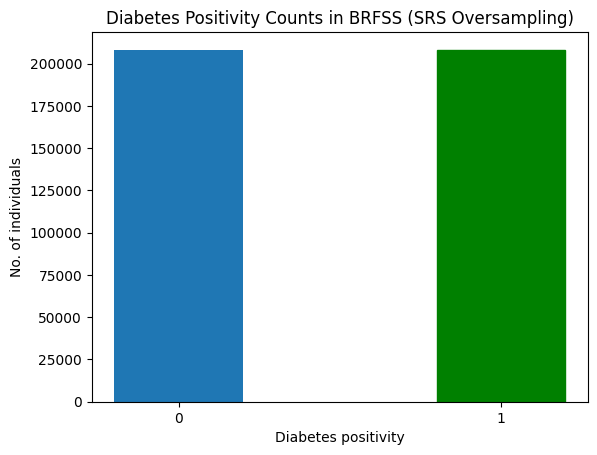

In [ ]:
barlist = plt.bar([str(0),str(1)], y_S_SRS.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (SRS Oversampling)")
plt.show()

In [ ]:
model_source_SRS_ROS = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_273"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1911 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1912 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1913 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1914 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1915 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1916 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1917 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7850 - loss: 0.5523 - val_AUC: 0.8223 - val_loss: 0.5162
Epoch 2/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - AUC: 0.8206 - loss: 0.5121 - val_AUC: 0.8280 - val_loss: 0.5108
Epoch 3/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.8285 - loss: 0.5032 - val_AUC: 0.8298 - val_loss: 0.5046
Epoch 4/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - AUC: 0.8306 - loss: 0.5001 - val_AUC: 0.8312 - val_loss: 0.5047
Epoch 5/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8312 - loss: 0.5002 - val_AUC: 0.8303 - val_loss: 0.5042
Epoch 6/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8278 - loss: 0.5046 - val_AUC: 0.8316 - val_loss: 0.5052
Epoch 7/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8343 - loss: 0.4959 - val_AUC: 0.8336 - val_loss: 0.5136
Epoch 8/10
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8364 - loss: 0.4924 - val_AUC: 0.8328 - val_loss: 0.5005
Epoch 9/10
1273/1273 ━━━━━━━━━━━━━━━━━━━

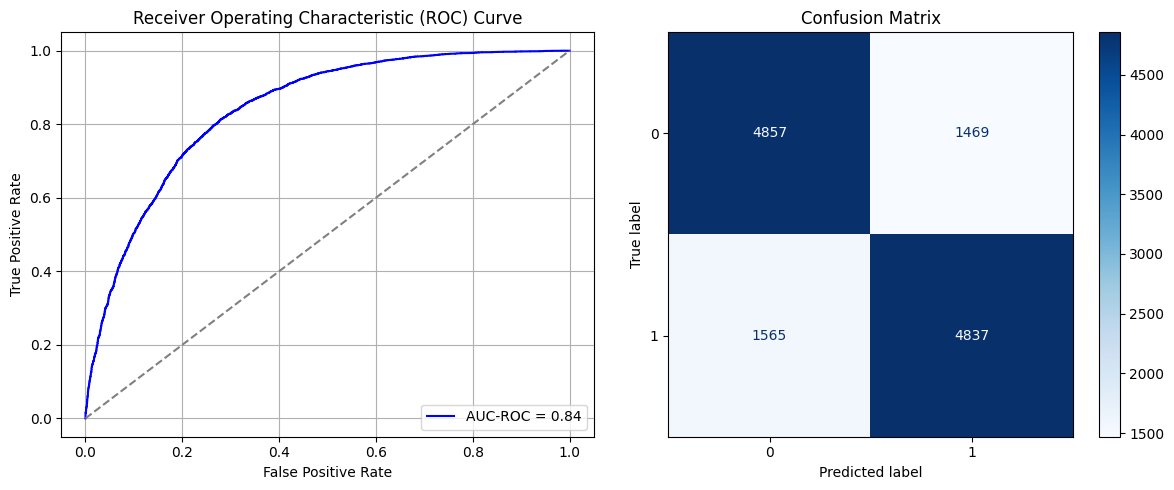

Best threshold based on F1-score: 0.3860374689102173
Time elapsed (performance): 58.95120449600017


<Sequential name=sequential_273, built=True>

In [ ]:
train_and_evaluate(model_source_SRS_ROS, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC-ROC: 0.7283927751824011
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.42      0.58      2278
         1.0       0.23      0.87      0.37       461

    accuracy                           0.50      2739
   macro avg       0.59      0.65      0.48      2739
weighted avg       0.82      0.50      0.55      2739

FPR 0.5798946444249341 TPR: 0.8741865509761388 FNR: 0.12581344902386118 TNR: 0.4201053555750659


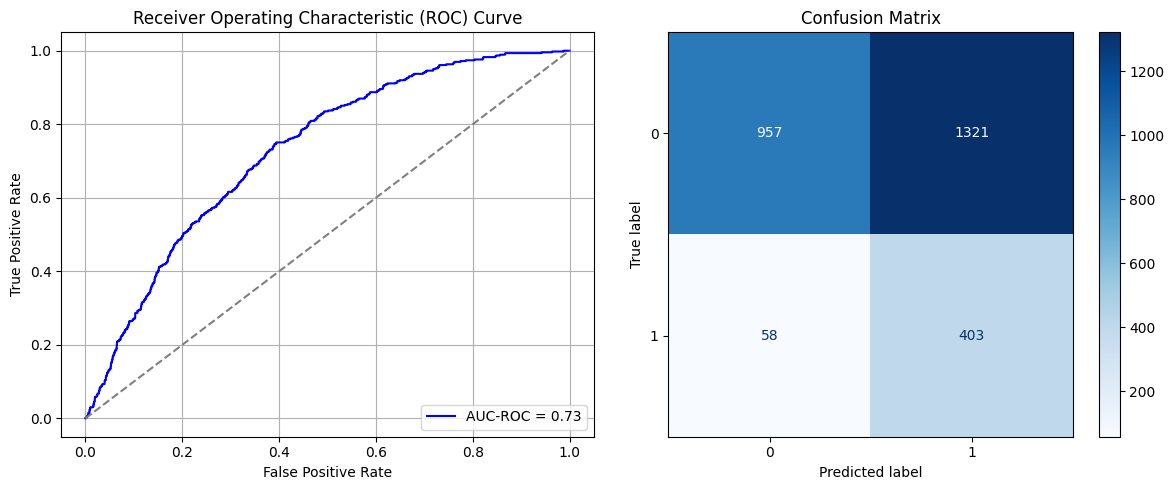

Best threshold based on F1-score: 0.9981775879859924
False Negative Rate: 0.12581344902386118
Time elapsed (performance): 0.7269353350002348


<ipython-input-16-de1f6cb50f3b>:54: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [ ]:
Transductive_TL(model_source_SRS_ROS, X_T_test, y_T_test, "Target")

In [ ]:
fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_274"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1918 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1919 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1920 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1921 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1922 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1923 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1924 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6736 - loss: 0.6033 - val_AUC: 0.6925 - val_loss: 0.4562
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7177 - loss: 0.4212 - val_AUC: 0.6962 - val_loss: 0.4484
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7135 - loss: 0.4253 - val_AUC: 0.6970 - val_loss: 0.4455
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7334 - loss: 0.4206 - val_AUC: 0.6975 - val_loss: 0.4445
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7315 - loss: 0.4167 - val_AUC: 0.6991 - val_loss: 0.4452
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7380 - loss: 0.4129 - val_AUC: 0.7002 - val_loss: 0.4432
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7198 - loss: 0.4146 - val_AUC: 0.7006 - val_loss: 0.4424
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7370 - loss: 0.4130 - val_AUC: 0.7015 - val_loss: 0.4427
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7162 -

(0.0004389815627743635, 1.0)

In [ ]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train_SRS, X_T_test, y_T_train_SRS, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']

# fine_tuning(X_T_train_SRS, X_T_test, y_T_train_SRS, y_T_test, 0, 4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_275"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1925 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1926 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1927 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1928 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1929 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1930 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1931 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7090 - loss: 0.6247 - val_AUC: 0.0000e+00 - val_loss: 0.7923
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7198 - loss: 0.5847 - val_AUC: 0.0000e+00 - val_loss: 0.8603
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7254 - loss: 0.5767 - val_AUC: 0.0000e+00 - val_loss: 0.8159
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7296 - loss: 0.5821 - val_AUC: 0.0000e+00 - val_loss: 0.8739
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7255 - loss: 0.5807 - val_AUC: 0.0000e+00 - val_loss: 0.8171
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7303 - loss: 0.5759 - val_AUC: 0.0000e+00 - val_loss: 0.8628
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7248 - loss: 0.5784 - val_AUC: 0.0000e+00 - val_loss: 0.8068
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7258 - loss: 0.5806 - val_AUC: 0.0000e+00 - val_loss: 0.7969
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_276"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1932 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1933 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1934 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1935 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1936 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1937 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1938 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7200 - loss: 0.6110 - val_AUC: 0.0000e+00 - val_loss: 0.7779
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7245 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.8010
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7202 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.8647
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7268 - loss: 0.5827 - val_AUC: 0.0000e+00 - val_loss: 0.8153
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7171 - loss: 0.5855 - val_AUC: 0.0000e+00 - val_loss: 0.8361
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7216 - loss: 0.5842 - val_AUC: 0.0000e+00 - val_loss: 0.8687
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7285 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.8320
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7258 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.8659
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_277"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1939 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1940 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1941 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1942 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1943 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1944 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1945 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7066 - loss: 0.6288 - val_AUC: 0.0000e+00 - val_loss: 0.8708
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7189 - loss: 0.5860 - val_AUC: 0.0000e+00 - val_loss: 0.8413
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7209 - loss: 0.5826 - val_AUC: 0.0000e+00 - val_loss: 0.8241
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7307 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.8654
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7260 - loss: 0.5788 - val_AUC: 0.0000e+00 - val_loss: 0.7962
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.7234 - loss: 0.5788 - val_AUC: 0.0000e+00 - val_loss: 0.8083
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.7238 - loss: 0.5844 - val_AUC: 0.0000e+00 - val_loss: 0.8688
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - AUC: 0.7272 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.8394
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_278"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1946 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1947 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1948 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1949 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1950 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1951 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1952 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7070 - loss: 0.6238 - val_AUC: 0.0000e+00 - val_loss: 0.7744
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7231 - loss: 0.5849 - val_AUC: 0.0000e+00 - val_loss: 0.8585
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7264 - loss: 0.5813 - val_AUC: 0.0000e+00 - val_loss: 0.8565
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7246 - loss: 0.5814 - val_AUC: 0.0000e+00 - val_loss: 0.8049
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7333 - loss: 0.5732 - val_AUC: 0.0000e+00 - val_loss: 0.8753
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7280 - loss: 0.5788 - val_AUC: 0.0000e+00 - val_loss: 0.9140
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7276 - loss: 0.5787 - val_AUC: 0.0000e+00 - val_loss: 0.8549
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_279"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1953 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1954 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1955 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1956 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1957 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1958 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1959 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7099 - loss: 0.6252 - val_AUC: 0.0000e+00 - val_loss: 0.8318
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7234 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.8132
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7264 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.9146
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7224 - loss: 0.5844 - val_AUC: 0.0000e+00 - val_loss: 0.8165
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7267 - loss: 0.5778 - val_AUC: 0.0000e+00 - val_loss: 0.8099
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7195 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.8624
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7291 - loss: 0.5801 - val_AUC: 0.0000e+00 - val_loss: 0.8194
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7289 - loss: 0.5801 - val_AUC: 0.0000e+00 - val_loss: 0.8183
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_280"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1960 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1961 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1962 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1963 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1964 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1965 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1966 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7077 - loss: 0.6245 - val_AUC: 0.0000e+00 - val_loss: 0.7977
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7184 - loss: 0.5842 - val_AUC: 0.0000e+00 - val_loss: 0.7808
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7231 - loss: 0.5813 - val_AUC: 0.0000e+00 - val_loss: 0.8228
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7288 - loss: 0.5810 - val_AUC: 0.0000e+00 - val_loss: 0.7951
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7201 - loss: 0.5851 - val_AUC: 0.0000e+00 - val_loss: 0.8669
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7270 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.8499
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7190 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.7981
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7274 - loss: 0.5742 - val_AUC: 0.0000e+00 - val_loss: 0.7967
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_281"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1967 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1968 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1969 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1970 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1971 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1972 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1973 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7036 - loss: 0.6296 - val_AUC: 0.0000e+00 - val_loss: 0.8422
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7189 - loss: 0.5839 - val_AUC: 0.0000e+00 - val_loss: 0.7706
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7213 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.8183
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7228 - loss: 0.5823 - val_AUC: 0.0000e+00 - val_loss: 0.8191
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7250 - loss: 0.5826 - val_AUC: 0.0000e+00 - val_loss: 0.8511
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7303 - loss: 0.5746 - val_AUC: 0.0000e+00 - val_loss: 0.8271
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7238 - loss: 0.5804 - val_AUC: 0.0000e+00 - val_loss: 0.8547
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7343 - loss: 0.5758 - val_AUC: 0.0000e+00 - val_loss: 0.8499
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_282"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1974 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1975 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1976 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1977 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1978 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1979 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1980 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7018 - loss: 0.6272 - val_AUC: 0.0000e+00 - val_loss: 0.7949
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7248 - loss: 0.5843 - val_AUC: 0.0000e+00 - val_loss: 0.8566
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7235 - loss: 0.5821 - val_AUC: 0.0000e+00 - val_loss: 0.8464
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7288 - loss: 0.5785 - val_AUC: 0.0000e+00 - val_loss: 0.8148
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7300 - loss: 0.5761 - val_AUC: 0.0000e+00 - val_loss: 0.8606
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7219 - loss: 0.5829 - val_AUC: 0.0000e+00 - val_loss: 0.7815
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7291 - loss: 0.5763 - val_AUC: 0.0000e+00 - val_loss: 0.8378
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7268 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.8611
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_283"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1981 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1982 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1983 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1984 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1985 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1986 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1987 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7000 - loss: 0.6298 - val_AUC: 0.0000e+00 - val_loss: 0.8188
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7161 - loss: 0.5881 - val_AUC: 0.0000e+00 - val_loss: 0.8861
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7169 - loss: 0.5871 - val_AUC: 0.0000e+00 - val_loss: 0.8277
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7245 - loss: 0.5798 - val_AUC: 0.0000e+00 - val_loss: 0.8339
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7210 - loss: 0.5830 - val_AUC: 0.0000e+00 - val_loss: 0.8524
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7318 - loss: 0.5715 - val_AUC: 0.0000e+00 - val_loss: 0.7678
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7281 - loss: 0.5773 - val_AUC: 0.0000e+00 - val_loss: 0.7996
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7219 - loss: 0.5829 - val_AUC: 0.0000e+00 - val_loss: 0.7794
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_284"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1988 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1989 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1990 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1991 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1992 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1993 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1994 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7103 - loss: 0.6209 - val_AUC: 0.0000e+00 - val_loss: 0.8071
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7216 - loss: 0.5864 - val_AUC: 0.0000e+00 - val_loss: 0.8101
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7255 - loss: 0.5793 - val_AUC: 0.0000e+00 - val_loss: 0.7800
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7207 - loss: 0.5840 - val_AUC: 0.0000e+00 - val_loss: 0.8284
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7122 - loss: 0.5863 - val_AUC: 0.0000e+00 - val_loss: 0.8444
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7214 - loss: 0.5865 - val_AUC: 0.0000e+00 - val_loss: 0.8995
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7302 - loss: 0.5745 - val_AUC: 0.0000e+00 - val_loss: 0.8490
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7299 - loss: 0.5790 - val_AUC: 0.0000e+00 - val_loss: 0.8717
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_285"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1995 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1996 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1997 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1998 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1999 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2000 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2001 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7074 - loss: 0.6242 - val_AUC: 0.0000e+00 - val_loss: 0.8315
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7164 - loss: 0.5859 - val_AUC: 0.0000e+00 - val_loss: 0.8182
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7251 - loss: 0.5823 - val_AUC: 0.0000e+00 - val_loss: 0.8285
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7313 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.8573
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7187 - loss: 0.5845 - val_AUC: 0.0000e+00 - val_loss: 0.8288
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7231 - loss: 0.5804 - val_AUC: 0.0000e+00 - val_loss: 0.7867
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7276 - loss: 0.5766 - val_AUC: 0.0000e+00 - val_loss: 0.8278
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7260 - loss: 0.5788 - val_AUC: 0.0000e+00 - val_loss: 0.8206
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_286"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2002 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2003 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2004 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2005 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2006 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2007 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2008 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7111 - loss: 0.6237 - val_AUC: 0.0000e+00 - val_loss: 0.8718
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7177 - loss: 0.5827 - val_AUC: 0.0000e+00 - val_loss: 0.8290
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7196 - loss: 0.5855 - val_AUC: 0.0000e+00 - val_loss: 0.8708
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7130 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.7899
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7256 - loss: 0.5770 - val_AUC: 0.0000e+00 - val_loss: 0.7822
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7258 - loss: 0.5783 - val_AUC: 0.0000e+00 - val_loss: 0.8200
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7315 - loss: 0.5798 - val_AUC: 0.0000e+00 - val_loss: 0.8694
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7213 - loss: 0.5812 - val_AUC: 0.0000e+00 - val_loss: 0.8548
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_287"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2009 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2010 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2011 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2012 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2013 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2014 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2015 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7079 - loss: 0.6253 - val_AUC: 0.0000e+00 - val_loss: 0.8358
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7140 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.8565
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7268 - loss: 0.5790 - val_AUC: 0.0000e+00 - val_loss: 0.8395
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7325 - loss: 0.5757 - val_AUC: 0.0000e+00 - val_loss: 0.7952
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7278 - loss: 0.5807 - val_AUC: 0.0000e+00 - val_loss: 0.8035
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7249 - loss: 0.5813 - val_AUC: 0.0000e+00 - val_loss: 0.8862
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7253 - loss: 0.5797 - val_AUC: 0.0000e+00 - val_loss: 0.8517
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7242 - loss: 0.5800 - val_AUC: 0.0000e+00 - val_loss: 0.8554
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_288"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2016 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2017 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2018 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2019 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2020 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2021 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2022 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7103 - loss: 0.6214 - val_AUC: 0.0000e+00 - val_loss: 0.8463
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7212 - loss: 0.5833 - val_AUC: 0.0000e+00 - val_loss: 0.8427
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7237 - loss: 0.5844 - val_AUC: 0.0000e+00 - val_loss: 0.9274
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7265 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.8332
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7188 - loss: 0.5808 - val_AUC: 0.0000e+00 - val_loss: 0.8387
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7256 - loss: 0.5806 - val_AUC: 0.0000e+00 - val_loss: 0.8162
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7233 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.8562
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7282 - loss: 0.5752 - val_AUC: 0.0000e+00 - val_loss: 0.8344
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_289"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2023 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2024 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2025 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2026 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2027 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2028 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2029 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7018 - loss: 0.6306 - val_AUC: 0.0000e+00 - val_loss: 0.8154
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7175 - loss: 0.5882 - val_AUC: 0.0000e+00 - val_loss: 0.8690
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7229 - loss: 0.5845 - val_AUC: 0.0000e+00 - val_loss: 0.8634
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7249 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.8605
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7305 - loss: 0.5787 - val_AUC: 0.0000e+00 - val_loss: 0.8479
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7216 - loss: 0.5809 - val_AUC: 0.0000e+00 - val_loss: 0.8139
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7254 - loss: 0.5785 - val_AUC: 0.0000e+00 - val_loss: 0.8357
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7317 - loss: 0.5767 - val_AUC: 0.0000e+00 - val_loss: 0.8158
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_290"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2030 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2031 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2032 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2033 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2034 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2035 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2036 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7048 - loss: 0.6298 - val_AUC: 0.0000e+00 - val_loss: 0.7992
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7232 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.8173
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7208 - loss: 0.5848 - val_AUC: 0.0000e+00 - val_loss: 0.7926
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7255 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.7934
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7293 - loss: 0.5798 - val_AUC: 0.0000e+00 - val_loss: 0.8644
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7217 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.8812
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7283 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.8317
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7291 - loss: 0.5793 - val_AUC: 0.0000e+00 - val_loss: 0.8723
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_291"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2037 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2038 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2039 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2040 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2041 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2042 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2043 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - AUC: 0.6967 - loss: 0.6372 - val_AUC: 0.0000e+00 - val_loss: 0.8174
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7259 - loss: 0.5772 - val_AUC: 0.0000e+00 - val_loss: 0.7953
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7271 - loss: 0.5797 - val_AUC: 0.0000e+00 - val_loss: 0.8766
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7258 - loss: 0.5806 - val_AUC: 0.0000e+00 - val_loss: 0.8591
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7282 - loss: 0.5787 - val_AUC: 0.0000e+00 - val_loss: 0.8898
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7295 - loss: 0.5759 - val_AUC: 0.0000e+00 - val_loss: 0.8187
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7264 - loss: 0.5783 - val_AUC: 0.0000e+00 - val_loss: 0.9077
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7348 - loss: 0.5733 - val_AUC: 0.0000e+00 - val_loss: 0.8288
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_292"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2044 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2045 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2046 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2047 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2048 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2049 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2050 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7073 - loss: 0.6300 - val_AUC: 0.0000e+00 - val_loss: 0.8856
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7234 - loss: 0.5848 - val_AUC: 0.0000e+00 - val_loss: 0.8829
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7234 - loss: 0.5818 - val_AUC: 0.0000e+00 - val_loss: 0.8468
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7237 - loss: 0.5806 - val_AUC: 0.0000e+00 - val_loss: 0.8017
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7246 - loss: 0.5811 - val_AUC: 0.0000e+00 - val_loss: 0.8134
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7212 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.8701
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7219 - loss: 0.5809 - val_AUC: 0.0000e+00 - val_loss: 0.8386
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7206 - loss: 0.5853 - val_AUC: 0.0000e+00 - val_loss: 0.8123
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_293"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2051 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2052 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2053 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2054 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2055 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2056 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2057 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7022 - loss: 0.6261 - val_AUC: 0.0000e+00 - val_loss: 0.8215
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7188 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.8220
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7184 - loss: 0.5839 - val_AUC: 0.0000e+00 - val_loss: 0.8026
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7240 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.8196
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7252 - loss: 0.5781 - val_AUC: 0.0000e+00 - val_loss: 0.8798
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7282 - loss: 0.5775 - val_AUC: 0.0000e+00 - val_loss: 0.8216
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7246 - loss: 0.5811 - val_AUC: 0.0000e+00 - val_loss: 0.8403
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7318 - loss: 0.5751 - val_AUC: 0.0000e+00 - val_loss: 0.8342
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_294"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2058 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2059 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2060 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2061 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2062 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2063 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2064 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7109 - loss: 0.6204 - val_AUC: 0.0000e+00 - val_loss: 0.8766
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7228 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.8703
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7235 - loss: 0.5823 - val_AUC: 0.0000e+00 - val_loss: 0.9348
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7229 - loss: 0.5810 - val_AUC: 0.0000e+00 - val_loss: 0.8688
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7285 - loss: 0.5759 - val_AUC: 0.0000e+00 - val_loss: 0.8224
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7329 - loss: 0.5744 - val_AUC: 0.0000e+00 - val_loss: 0.7531
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7275 - loss: 0.5799 - val_AUC: 0.0000e+00 - val_loss: 0.8398
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7303 - loss: 0.5768 - val_AUC: 0.0000e+00 - val_loss: 0.8225
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_295"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2065 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2066 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2067 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2068 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2069 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2070 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2071 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7088 - loss: 0.6213 - val_AUC: 0.0000e+00 - val_loss: 0.8646
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7121 - loss: 0.5896 - val_AUC: 0.0000e+00 - val_loss: 0.8545
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7273 - loss: 0.5761 - val_AUC: 0.0000e+00 - val_loss: 0.8188
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7307 - loss: 0.5765 - val_AUC: 0.0000e+00 - val_loss: 0.7626
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7233 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.8205
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7239 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.8588
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7187 - loss: 0.5845 - val_AUC: 0.0000e+00 - val_loss: 0.8220
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7284 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.9038
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_296"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2072 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2073 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2074 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2075 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2076 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2077 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2078 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7002 - loss: 0.6280 - val_AUC: 0.0000e+00 - val_loss: 0.7673
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7149 - loss: 0.5887 - val_AUC: 0.0000e+00 - val_loss: 0.8461
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7238 - loss: 0.5822 - val_AUC: 0.0000e+00 - val_loss: 0.8227
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7234 - loss: 0.5824 - val_AUC: 0.0000e+00 - val_loss: 0.8728
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7220 - loss: 0.5799 - val_AUC: 0.0000e+00 - val_loss: 0.8840
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7321 - loss: 0.5734 - val_AUC: 0.0000e+00 - val_loss: 0.8041
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7277 - loss: 0.5787 - val_AUC: 0.0000e+00 - val_loss: 0.7610
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7257 - loss: 0.5762 - val_AUC: 0.0000e+00 - val_loss: 0.8075
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_297"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2079 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2080 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2081 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2082 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2083 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2084 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2085 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7082 - loss: 0.6236 - val_AUC: 0.0000e+00 - val_loss: 0.8277
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7205 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.8871
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7256 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.8596
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7216 - loss: 0.5835 - val_AUC: 0.0000e+00 - val_loss: 0.8411
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7268 - loss: 0.5804 - val_AUC: 0.0000e+00 - val_loss: 0.8534
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7283 - loss: 0.5785 - val_AUC: 0.0000e+00 - val_loss: 0.8429
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7244 - loss: 0.5808 - val_AUC: 0.0000e+00 - val_loss: 0.8036
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7275 - loss: 0.5769 - val_AUC: 0.0000e+00 - val_loss: 0.8244
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_298"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2086 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2087 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2088 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2089 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2090 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2091 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2092 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7070 - loss: 0.6254 - val_AUC: 0.0000e+00 - val_loss: 0.8235
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7213 - loss: 0.5814 - val_AUC: 0.0000e+00 - val_loss: 0.8039
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7260 - loss: 0.5788 - val_AUC: 0.0000e+00 - val_loss: 0.8015
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7249 - loss: 0.5821 - val_AUC: 0.0000e+00 - val_loss: 0.7940
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7209 - loss: 0.5831 - val_AUC: 0.0000e+00 - val_loss: 0.7770
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7316 - loss: 0.5742 - val_AUC: 0.0000e+00 - val_loss: 0.9081
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7287 - loss: 0.5768 - val_AUC: 0.0000e+00 - val_loss: 0.8216
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7267 - loss: 0.5765 - val_AUC: 0.0000e+00 - val_loss: 0.8486
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_299"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2093 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2094 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2095 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2096 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2097 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2098 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2099 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7064 - loss: 0.6268 - val_AUC: 0.0000e+00 - val_loss: 0.8582
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7157 - loss: 0.5917 - val_AUC: 0.0000e+00 - val_loss: 0.8064
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7255 - loss: 0.5812 - val_AUC: 0.0000e+00 - val_loss: 0.8657
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7276 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.8710
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7276 - loss: 0.5780 - val_AUC: 0.0000e+00 - val_loss: 0.7958
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7333 - loss: 0.5735 - val_AUC: 0.0000e+00 - val_loss: 0.8904
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7272 - loss: 0.5803 - val_AUC: 0.0000e+00 - val_loss: 0.8742
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7262 - loss: 0.5809 - val_AUC: 0.0000e+00 - val_loss: 0.8240
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_300"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2100 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2101 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2102 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2103 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2104 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2105 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2106 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7005 - loss: 0.6254 - val_AUC: 0.0000e+00 - val_loss: 0.7879
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7258 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.7867
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7219 - loss: 0.5852 - val_AUC: 0.0000e+00 - val_loss: 0.8696
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7318 - loss: 0.5758 - val_AUC: 0.0000e+00 - val_loss: 0.8489
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7245 - loss: 0.5812 - val_AUC: 0.0000e+00 - val_loss: 0.8636
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7225 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.8647
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7255 - loss: 0.5804 - val_AUC: 0.0000e+00 - val_loss: 0.8710
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7293 - loss: 0.5786 - val_AUC: 0.0000e+00 - val_loss: 0.8351
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_301"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2107 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2108 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2109 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2110 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2111 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2112 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2113 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7101 - loss: 0.6202 - val_AUC: 0.0000e+00 - val_loss: 0.8242
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7178 - loss: 0.5851 - val_AUC: 0.0000e+00 - val_loss: 0.9043
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7200 - loss: 0.5830 - val_AUC: 0.0000e+00 - val_loss: 0.8352
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7301 - loss: 0.5766 - val_AUC: 0.0000e+00 - val_loss: 0.8663
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7272 - loss: 0.5769 - val_AUC: 0.0000e+00 - val_loss: 0.8132
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7139 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.8640
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7300 - loss: 0.5792 - val_AUC: 0.0000e+00 - val_loss: 0.8369
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7291 - loss: 0.5781 - val_AUC: 0.0000e+00 - val_loss: 0.8617
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_302"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2114 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2115 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2116 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2117 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2118 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2119 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2120 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7006 - loss: 0.6318 - val_AUC: 0.0000e+00 - val_loss: 0.8239
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7185 - loss: 0.5875 - val_AUC: 0.0000e+00 - val_loss: 0.8592
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7210 - loss: 0.5842 - val_AUC: 0.0000e+00 - val_loss: 0.8929
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7299 - loss: 0.5745 - val_AUC: 0.0000e+00 - val_loss: 0.8483
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7242 - loss: 0.5793 - val_AUC: 0.0000e+00 - val_loss: 0.8324
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7302 - loss: 0.5780 - val_AUC: 0.0000e+00 - val_loss: 0.8841
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7233 - loss: 0.5828 - val_AUC: 0.0000e+00 - val_loss: 0.8402
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7295 - loss: 0.5777 - val_AUC: 0.0000e+00 - val_loss: 0.8399
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_303"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2121 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2122 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2123 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2124 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2125 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2126 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2127 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7134 - loss: 0.6209 - val_AUC: 0.0000e+00 - val_loss: 0.8762
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7267 - loss: 0.5826 - val_AUC: 0.0000e+00 - val_loss: 0.8392
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7244 - loss: 0.5815 - val_AUC: 0.0000e+00 - val_loss: 0.8093
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7202 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.8094
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7227 - loss: 0.5808 - val_AUC: 0.0000e+00 - val_loss: 0.8753
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7246 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.9272
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7259 - loss: 0.5814 - val_AUC: 0.0000e+00 - val_loss: 0.9279
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7302 - loss: 0.5758 - val_AUC: 0.0000e+00 - val_loss: 0.7874
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_304"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2128 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2129 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2130 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2131 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2132 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2133 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2134 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7128 - loss: 0.6199 - val_AUC: 0.0000e+00 - val_loss: 0.8666
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7135 - loss: 0.5888 - val_AUC: 0.0000e+00 - val_loss: 0.8482
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7201 - loss: 0.5845 - val_AUC: 0.0000e+00 - val_loss: 0.8252
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7247 - loss: 0.5809 - val_AUC: 0.0000e+00 - val_loss: 0.8428
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7198 - loss: 0.5852 - val_AUC: 0.0000e+00 - val_loss: 0.8275
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7219 - loss: 0.5796 - val_AUC: 0.0000e+00 - val_loss: 0.8131
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7320 - loss: 0.5744 - val_AUC: 0.0000e+00 - val_loss: 0.8745
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7202 - loss: 0.5833 - val_AUC: 0.0000e+00 - val_loss: 0.8190
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_305"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2135 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2136 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2137 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2138 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2139 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2140 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2141 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7056 - loss: 0.6292 - val_AUC: 0.0000e+00 - val_loss: 0.8037
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7268 - loss: 0.5833 - val_AUC: 0.0000e+00 - val_loss: 0.8557
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7211 - loss: 0.5878 - val_AUC: 0.0000e+00 - val_loss: 0.8713
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7220 - loss: 0.5847 - val_AUC: 0.0000e+00 - val_loss: 0.8830
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7268 - loss: 0.5821 - val_AUC: 0.0000e+00 - val_loss: 0.7971
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7276 - loss: 0.5785 - val_AUC: 0.0000e+00 - val_loss: 0.8059
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7260 - loss: 0.5801 - val_AUC: 0.0000e+00 - val_loss: 0.8303
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7297 - loss: 0.5743 - val_AUC: 0.0000e+00 - val_loss: 0.8257
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_306"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2142 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2143 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2144 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2145 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2146 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2147 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2148 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7018 - loss: 0.6331 - val_AUC: 0.0000e+00 - val_loss: 0.8313
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7170 - loss: 0.5840 - val_AUC: 0.0000e+00 - val_loss: 0.8456
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7180 - loss: 0.5885 - val_AUC: 0.0000e+00 - val_loss: 0.8570
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7230 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.8567
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7282 - loss: 0.5772 - val_AUC: 0.0000e+00 - val_loss: 0.8302
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7237 - loss: 0.5821 - val_AUC: 0.0000e+00 - val_loss: 0.8595
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7243 - loss: 0.5818 - val_AUC: 0.0000e+00 - val_loss: 0.8386
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7299 - loss: 0.5754 - val_AUC: 0.0000e+00 - val_loss: 0.8259
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_307"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2149 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2150 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2151 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2152 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2153 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2154 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2155 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7041 - loss: 0.6254 - val_AUC: 0.0000e+00 - val_loss: 0.8245
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7242 - loss: 0.5811 - val_AUC: 0.0000e+00 - val_loss: 0.8681
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7168 - loss: 0.5845 - val_AUC: 0.0000e+00 - val_loss: 0.8248
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7231 - loss: 0.5843 - val_AUC: 0.0000e+00 - val_loss: 0.8771
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7242 - loss: 0.5808 - val_AUC: 0.0000e+00 - val_loss: 0.8545
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7263 - loss: 0.5812 - val_AUC: 0.0000e+00 - val_loss: 0.8174
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7259 - loss: 0.5797 - val_AUC: 0.0000e+00 - val_loss: 0.8048
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7233 - loss: 0.5815 - val_AUC: 0.0000e+00 - val_loss: 0.8069
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_308"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2156 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2157 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2158 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2159 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2160 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2161 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2162 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7098 - loss: 0.6181 - val_AUC: 0.0000e+00 - val_loss: 0.8432
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7233 - loss: 0.5828 - val_AUC: 0.0000e+00 - val_loss: 0.8119
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7202 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.8532
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7279 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.8085
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7254 - loss: 0.5788 - val_AUC: 0.0000e+00 - val_loss: 0.9244
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7225 - loss: 0.5823 - val_AUC: 0.0000e+00 - val_loss: 0.8299
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7291 - loss: 0.5798 - val_AUC: 0.0000e+00 - val_loss: 0.8952
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7221 - loss: 0.5817 - val_AUC: 0.0000e+00 - val_loss: 0.7632
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_309"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2163 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2164 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2165 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2166 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2167 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2168 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2169 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6987 - loss: 0.6339 - val_AUC: 0.0000e+00 - val_loss: 0.8382
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7175 - loss: 0.5885 - val_AUC: 0.0000e+00 - val_loss: 0.8638
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7241 - loss: 0.5753 - val_AUC: 0.0000e+00 - val_loss: 0.7763
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7241 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.9083
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7208 - loss: 0.5829 - val_AUC: 0.0000e+00 - val_loss: 0.8510
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7223 - loss: 0.5818 - val_AUC: 0.0000e+00 - val_loss: 0.7785
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7309 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.8357
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7285 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.7960
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_310"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2170 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2171 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2172 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2173 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2174 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2175 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2176 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7043 - loss: 0.6265 - val_AUC: 0.0000e+00 - val_loss: 0.8173
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7212 - loss: 0.5855 - val_AUC: 0.0000e+00 - val_loss: 0.8515
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7221 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.9939
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7185 - loss: 0.5869 - val_AUC: 0.0000e+00 - val_loss: 0.8301
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7261 - loss: 0.5809 - val_AUC: 0.0000e+00 - val_loss: 0.7663
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7261 - loss: 0.5786 - val_AUC: 0.0000e+00 - val_loss: 0.8490
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7218 - loss: 0.5831 - val_AUC: 0.0000e+00 - val_loss: 0.8662
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7292 - loss: 0.5761 - val_AUC: 0.0000e+00 - val_loss: 0.8016
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_311"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2177 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2178 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2179 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2180 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2181 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2182 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2183 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7122 - loss: 0.6219 - val_AUC: 0.0000e+00 - val_loss: 0.8350
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7225 - loss: 0.5868 - val_AUC: 0.0000e+00 - val_loss: 0.8177
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7264 - loss: 0.5811 - val_AUC: 0.0000e+00 - val_loss: 0.8067
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7275 - loss: 0.5778 - val_AUC: 0.0000e+00 - val_loss: 0.8703
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7314 - loss: 0.5761 - val_AUC: 0.0000e+00 - val_loss: 0.8321
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7243 - loss: 0.5804 - val_AUC: 0.0000e+00 - val_loss: 0.8781
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7255 - loss: 0.5785 - val_AUC: 0.0000e+00 - val_loss: 0.7670
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7273 - loss: 0.5765 - val_AUC: 0.0000e+00 - val_loss: 0.8057
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_312"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2184 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2185 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2186 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2187 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2188 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2189 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2190 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7047 - loss: 0.6243 - val_AUC: 0.0000e+00 - val_loss: 0.8223
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7237 - loss: 0.5836 - val_AUC: 0.0000e+00 - val_loss: 0.8302
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7289 - loss: 0.5787 - val_AUC: 0.0000e+00 - val_loss: 0.8942
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7205 - loss: 0.5808 - val_AUC: 0.0000e+00 - val_loss: 0.8299
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7250 - loss: 0.5835 - val_AUC: 0.0000e+00 - val_loss: 0.8113
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7190 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.7684
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7288 - loss: 0.5782 - val_AUC: 0.0000e+00 - val_loss: 0.8650
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7260 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.8661
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_313"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2191 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2192 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2193 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2194 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2195 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2196 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2197 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7011 - loss: 0.6319 - val_AUC: 0.0000e+00 - val_loss: 0.9039
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7235 - loss: 0.5797 - val_AUC: 0.0000e+00 - val_loss: 0.8589
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7228 - loss: 0.5821 - val_AUC: 0.0000e+00 - val_loss: 0.8404
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7244 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.8423
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7269 - loss: 0.5776 - val_AUC: 0.0000e+00 - val_loss: 0.8164
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7255 - loss: 0.5773 - val_AUC: 0.0000e+00 - val_loss: 0.8239
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7270 - loss: 0.5770 - val_AUC: 0.0000e+00 - val_loss: 0.8461
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7243 - loss: 0.5803 - val_AUC: 0.0000e+00 - val_loss: 0.8601
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_314"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2198 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2199 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2200 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2201 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2202 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2203 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2204 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7074 - loss: 0.6271 - val_AUC: 0.0000e+00 - val_loss: 0.8419
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7273 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.8638
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7248 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.8081
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7162 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.8278
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7314 - loss: 0.5712 - val_AUC: 0.0000e+00 - val_loss: 0.8606
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7247 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.7810
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7269 - loss: 0.5777 - val_AUC: 0.0000e+00 - val_loss: 0.8138
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7241 - loss: 0.5831 - val_AUC: 0.0000e+00 - val_loss: 0.8810
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_315"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2205 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2206 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2207 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2208 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2209 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2210 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2211 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7126 - loss: 0.6213 - val_AUC: 0.0000e+00 - val_loss: 0.8447
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7228 - loss: 0.5852 - val_AUC: 0.0000e+00 - val_loss: 0.8472
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7266 - loss: 0.5799 - val_AUC: 0.0000e+00 - val_loss: 0.8214
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7258 - loss: 0.5822 - val_AUC: 0.0000e+00 - val_loss: 0.8051
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7246 - loss: 0.5806 - val_AUC: 0.0000e+00 - val_loss: 0.8308
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7218 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.8417
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7392 - loss: 0.5737 - val_AUC: 0.0000e+00 - val_loss: 0.8736
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7253 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.8577
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_316"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2212 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2213 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2214 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2215 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2216 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2217 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2218 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7093 - loss: 0.6219 - val_AUC: 0.0000e+00 - val_loss: 0.7980
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7216 - loss: 0.5860 - val_AUC: 0.0000e+00 - val_loss: 0.8757
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7230 - loss: 0.5840 - val_AUC: 0.0000e+00 - val_loss: 0.8328
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7220 - loss: 0.5840 - val_AUC: 0.0000e+00 - val_loss: 0.8721
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7289 - loss: 0.5799 - val_AUC: 0.0000e+00 - val_loss: 0.8647
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7327 - loss: 0.5736 - val_AUC: 0.0000e+00 - val_loss: 0.8791
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7243 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.8190
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7247 - loss: 0.5749 - val_AUC: 0.0000e+00 - val_loss: 0.8402
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_317"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2219 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2220 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2221 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2222 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2223 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2224 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2225 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7089 - loss: 0.6206 - val_AUC: 0.0000e+00 - val_loss: 0.8157
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7242 - loss: 0.5830 - val_AUC: 0.0000e+00 - val_loss: 0.8313
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7240 - loss: 0.5822 - val_AUC: 0.0000e+00 - val_loss: 0.7872
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7188 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.8149
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7269 - loss: 0.5778 - val_AUC: 0.0000e+00 - val_loss: 0.8166
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7244 - loss: 0.5829 - val_AUC: 0.0000e+00 - val_loss: 0.8876
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7238 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.8271
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7347 - loss: 0.5734 - val_AUC: 0.0000e+00 - val_loss: 0.8449
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_318"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2226 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2227 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2228 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2229 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2230 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2231 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2232 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.7050 - loss: 0.6268 - val_AUC: 0.0000e+00 - val_loss: 0.7926
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7186 - loss: 0.5836 - val_AUC: 0.0000e+00 - val_loss: 0.8235
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7184 - loss: 0.5824 - val_AUC: 0.0000e+00 - val_loss: 0.8943
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7185 - loss: 0.5884 - val_AUC: 0.0000e+00 - val_loss: 0.9213
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7195 - loss: 0.5827 - val_AUC: 0.0000e+00 - val_loss: 0.8284
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7211 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.8786
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7251 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.8293
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7298 - loss: 0.5738 - val_AUC: 0.0000e+00 - val_loss: 0.8165
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_319"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2233 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2234 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2235 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2236 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2237 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2238 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2239 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7092 - loss: 0.6247 - val_AUC: 0.0000e+00 - val_loss: 0.9095
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7175 - loss: 0.5903 - val_AUC: 0.0000e+00 - val_loss: 0.8704
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7272 - loss: 0.5786 - val_AUC: 0.0000e+00 - val_loss: 0.8219
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7244 - loss: 0.5836 - val_AUC: 0.0000e+00 - val_loss: 0.8954
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7227 - loss: 0.5815 - val_AUC: 0.0000e+00 - val_loss: 0.8795
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7285 - loss: 0.5770 - val_AUC: 0.0000e+00 - val_loss: 0.9068
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7189 - loss: 0.5843 - val_AUC: 0.0000e+00 - val_loss: 0.8272
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7294 - loss: 0.5772 - val_AUC: 0.0000e+00 - val_loss: 0.8559
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_320"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2240 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2241 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2242 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2243 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2244 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2245 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2246 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6995 - loss: 0.6310 - val_AUC: 0.0000e+00 - val_loss: 0.8414
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7209 - loss: 0.5879 - val_AUC: 0.0000e+00 - val_loss: 0.7981
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7203 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.8061
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7241 - loss: 0.5787 - val_AUC: 0.0000e+00 - val_loss: 0.8653
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7258 - loss: 0.5776 - val_AUC: 0.0000e+00 - val_loss: 0.8374
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7186 - loss: 0.5833 - val_AUC: 0.0000e+00 - val_loss: 0.8160
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7301 - loss: 0.5764 - val_AUC: 0.0000e+00 - val_loss: 0.8263
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7260 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.8178
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_321"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2247 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2248 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2249 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2250 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2251 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2252 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2253 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6987 - loss: 0.6357 - val_AUC: 0.0000e+00 - val_loss: 0.8617
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7252 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.7645
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7211 - loss: 0.5845 - val_AUC: 0.0000e+00 - val_loss: 0.8689
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7236 - loss: 0.5808 - val_AUC: 0.0000e+00 - val_loss: 0.8279
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7244 - loss: 0.5818 - val_AUC: 0.0000e+00 - val_loss: 0.7623
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7259 - loss: 0.5804 - val_AUC: 0.0000e+00 - val_loss: 0.8664
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7238 - loss: 0.5800 - val_AUC: 0.0000e+00 - val_loss: 0.8692
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7336 - loss: 0.5740 - val_AUC: 0.0000e+00 - val_loss: 0.8541
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_322"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2254 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2255 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2256 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2257 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2258 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2259 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2260 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7124 - loss: 0.6211 - val_AUC: 0.0000e+00 - val_loss: 0.8544
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7201 - loss: 0.5827 - val_AUC: 0.0000e+00 - val_loss: 0.8786
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7218 - loss: 0.5789 - val_AUC: 0.0000e+00 - val_loss: 0.9044
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7225 - loss: 0.5843 - val_AUC: 0.0000e+00 - val_loss: 0.8068
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7303 - loss: 0.5784 - val_AUC: 0.0000e+00 - val_loss: 0.8833
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7388 - loss: 0.5707 - val_AUC: 0.0000e+00 - val_loss: 0.8838
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7201 - loss: 0.5836 - val_AUC: 0.0000e+00 - val_loss: 0.7983
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7306 - loss: 0.5772 - val_AUC: 0.0000e+00 - val_loss: 0.8192
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_323"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2261 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2262 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2263 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2264 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2265 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2266 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2267 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7075 - loss: 0.6256 - val_AUC: 0.0000e+00 - val_loss: 0.8103
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7158 - loss: 0.5897 - val_AUC: 0.0000e+00 - val_loss: 0.8121
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7306 - loss: 0.5766 - val_AUC: 0.0000e+00 - val_loss: 0.7923
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7276 - loss: 0.5801 - val_AUC: 0.0000e+00 - val_loss: 0.9096
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7266 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.7776
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7303 - loss: 0.5780 - val_AUC: 0.0000e+00 - val_loss: 0.8451
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7253 - loss: 0.5800 - val_AUC: 0.0000e+00 - val_loss: 0.7394
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7316 - loss: 0.5796 - val_AUC: 0.0000e+00 - val_loss: 0.8336
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_324"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2268 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2269 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2270 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2271 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2272 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2273 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2274 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7134 - loss: 0.6180 - val_AUC: 0.0000e+00 - val_loss: 0.8769
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7232 - loss: 0.5833 - val_AUC: 0.0000e+00 - val_loss: 0.8207
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7171 - loss: 0.5891 - val_AUC: 0.0000e+00 - val_loss: 0.7765
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7250 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.8838
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7253 - loss: 0.5817 - val_AUC: 0.0000e+00 - val_loss: 0.8509
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7218 - loss: 0.5833 - val_AUC: 0.0000e+00 - val_loss: 0.8144
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7230 - loss: 0.5853 - val_AUC: 0.0000e+00 - val_loss: 0.8287
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7328 - loss: 0.5729 - val_AUC: 0.0000e+00 - val_loss: 0.8655
Epoch 9/10
450/450 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_325"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2275 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2276 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2277 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2278 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2279 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2280 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2281 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7086 - loss: 0.6224 - val_AUC: 0.0000e+00 - val_loss: 0.7950
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7231 - loss: 0.5836 - val_AUC: 0.0000e+00 - val_loss: 0.7859
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7258 - loss: 0.5801 - val_AUC: 0.0000e+00 - val_loss: 0.8496
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7128 - loss: 0.5895 - val_AUC: 0.0000e+00 - val_loss: 0.8572
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7251 - loss: 0.5817 - val_AUC: 0.0000e+00 - val_loss: 0.7995
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7248 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.7910
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7247 - loss: 0.5804 - val_AUC: 0.0000e+00 - val_loss: 0.8238
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7267 - loss: 0.5798 - val_AUC: 0.0000e+00 - val_loss: 0.8286
Epoch 9/10
450/450 ━━━━━

(0.09394205443371378, 0.720173535791757)

In [ ]:
print(ParamFit)
ParamFit.to_csv('SRS_ROS_Fine_Tuning.csv')

         FPR       FNR
0   0.121159  0.672451
1   0.185250  0.518438
2   0.224759  0.453362
3   0.241879  0.444685
4   0.230904  0.453362
5   0.217735  0.468547
6   0.170325  0.542299
7   0.206760  0.475054
8   0.215101  0.468547
9   0.190079  0.522777
10  0.200176  0.496746
11  0.152766  0.587852
12  0.180421  0.533623
13  0.159789  0.563991
14  0.285338  0.392625
15  0.143986  0.611714
16  0.225198  0.457701
17  0.201493  0.496746
18  0.234855  0.446855
19  0.196664  0.505423
20  0.198420  0.503254
21  0.244952  0.442516
22  0.250658  0.442516
23  0.206760  0.481562
24  0.216857  0.466377
25  0.171203  0.537961
26  0.211589  0.470716
27  0.212028  0.468547
28  0.159789  0.557484
29  0.222125  0.459870
30  0.215540  0.464208
31  0.159789  0.566161
32  0.166813  0.548807
33  0.203687  0.492408
34  0.166813  0.555315
35  0.197981  0.505423
36  0.178665  0.533623
37  0.208955  0.475054
38  0.175154  0.531453
39  0.244074  0.444685
40  0.143986  0.607375
41  0.192713  0.520607
42  0.22914

## Systematic Resampling:

In this case, we examine the possibility of performing Random Oversampling on the minority class using systematic sampling. For this purpose, taking a sampling interval of $k$, we would compile a total of $k*\frac{N_0-N_1}{N_1}$ systematic samples from the minority class in order to balance the dataset. We sample the starting point from 1 to $k$ *with replacement*, since a highly imbalanced dataset will require sampling with replacement in order to achieve a balanced dataset.

In particular, taking $k=48$ yields a number of samples of $k*\frac{N_0-N_1}{N_1}=266.01 \approx 266$, so we take $k=48$ for the source data resampling. Similarly, we take $k=50$ for the target training data resampling, as this yields a $k*\frac{N_0-N_1}{N_1}=178.92 \approx 179$.

In [22]:
X_S_Sy, y_S_Sy = systematic_resampler(data_S_full, data_S_full['Diabetes_binary'], 48)
# print(y_S_Sy)

X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)
T_train = pd.concat([X_T_train, y_T_train], axis=1)

X_T_train_Sy, y_T_train_Sy = systematic_resampler(T_train, T_train[6], 50)
# print(y_T_train_Sy)

31820
208165
Nsamples= 266.01382778126964
1964
8992
Nsamples= 178.9205702647658


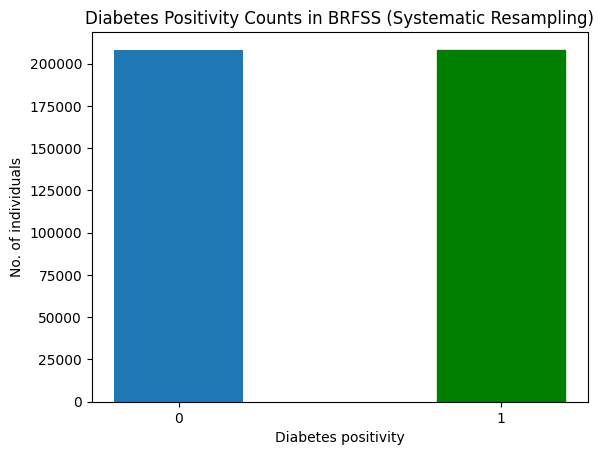

In [ ]:
barlist = plt.bar([str(0),str(1)], y_S_Sy.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Systematic Resampling)")
plt.show()

In [ ]:
model_source_Sy_ROS = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_326"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2282 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2283 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2284 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2285 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2286 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2287 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2288 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
8322/8322 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - AUC: 0.8083 - loss: 0.5271 - val_AUC: 0.8239 - val_loss: 0.5111
Epoch 2/10
8322/8322 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8263 - loss: 0.5061 - val_AUC: 0.8276 - val_loss: 0.5052
Epoch 3/10
8322/8322 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - AUC: 0.8289 - loss: 0.5029 - val_AUC: 0.8279 - val_loss: 0.5045
Epoch 4/10
8322/8322 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - AUC: 0.8309 - loss: 0.5002 - val_AUC: 0.8291 - val_loss: 0.5030
Epoch 5/10
8322/8322 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - AUC: 0.8315 - loss: 0.4993 - val_AUC: 0.8303 - val_loss: 0.5015
Epoch 6/10
8322/8322 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8320 - loss: 0.4986 - val_AUC: 0.8302 - val_loss: 0.5011
Epoch 7/10
8322/8322 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - AUC: 0.8335 - loss: 0.4963 - val_AUC: 0.8310 - val_loss: 0.5000
Epoch 8/10
8322/8322 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.8332 - loss: 0.4963 - val_AUC: 0.8306 - val_loss: 0.4995
Epoch 9/10
8322/8322 ━━━━━━━━━━━

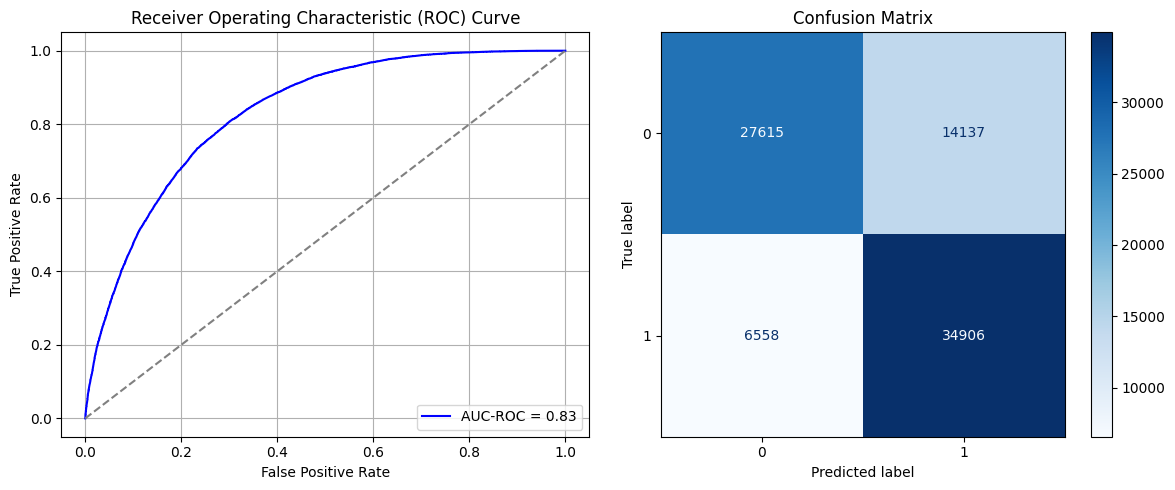

Best threshold based on F1-score: 0.42495158314704895
Time elapsed (performance): 334.3367059259999


<Sequential name=sequential_326, built=True>

In [ ]:
train_and_evaluate(model_source_Sy_ROS, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC-ROC: 0.7115838759500951
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.35      0.52      2278
         1.0       0.23      0.93      0.36       461

    accuracy                           0.45      2739
   macro avg       0.59      0.64      0.44      2739
weighted avg       0.84      0.45      0.49      2739

FPR 0.6453028972783144 TPR: 0.9262472885032538 FNR: 0.0737527114967462 TNR: 0.35469710272168564


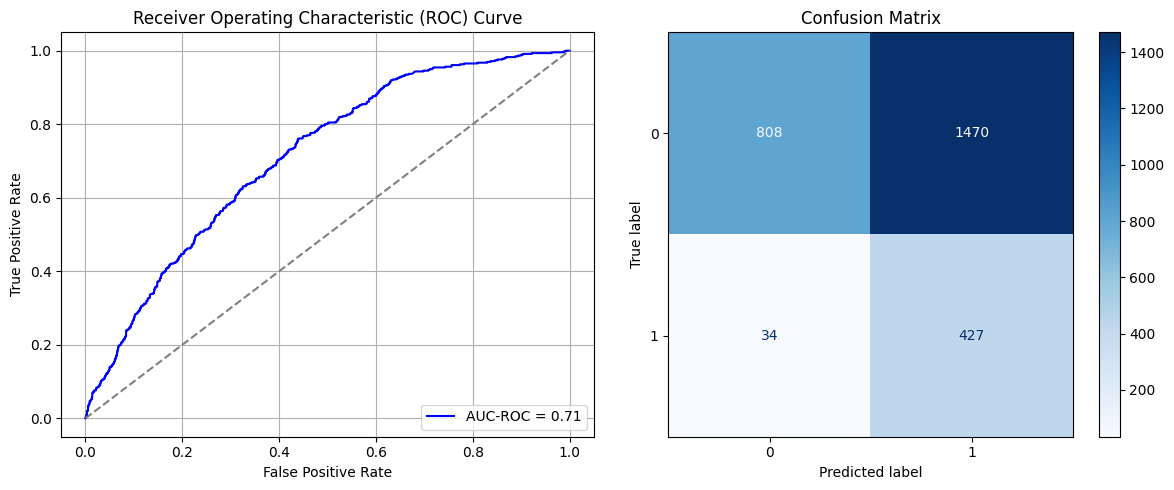

Best threshold based on F1-score: 0.9731065034866333
False Negative Rate: 0.0737527114967462
Time elapsed (performance): 0.7664749700006723


<ipython-input-16-de1f6cb50f3b>:54: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [ ]:
Transductive_TL(model_source_Sy_ROS, X_T_test, y_T_test, "Target")

In [ ]:
fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_327"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2289 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2290 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2291 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2292 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2293 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2294 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2295 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6717 - loss: 0.7388 - val_AUC: 0.6411 - val_loss: 0.4548
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6926 - loss: 0.4339 - val_AUC: 0.6924 - val_loss: 0.4431
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7013 - loss: 0.4317 - val_AUC: 0.6947 - val_loss: 0.4415
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7146 - loss: 0.4276 - val_AUC: 0.6957 - val_loss: 0.4424
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7121 - loss: 0.4247 - val_AUC: 0.6964 - val_loss: 0.4413
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7147 - loss: 0.4207 - val_AUC: 0.6977 - val_loss: 0.4422
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7122 - loss: 0.4411 - val_AUC: 0.6983 - val_loss: 0.4420
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7112 - loss: 0.4199 - val_AUC: 0.6987 - val_loss: 0.4413
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7137 -

(0.0026338893766461808, 0.9891540130151844)

In [ ]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']

# fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_328"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2296 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2297 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2298 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2299 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2300 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2301 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2302 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6956 - loss: 0.6760 - val_AUC: 0.0000e+00 - val_loss: 0.9335
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7174 - loss: 0.5889 - val_AUC: 0.0000e+00 - val_loss: 0.9119
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7087 - loss: 0.5908 - val_AUC: 0.0000e+00 - val_loss: 0.8365
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7151 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.8495
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7159 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.8270
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7168 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.8618
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7197 - loss: 0.5815 - val_AUC: 0.0000e+00 - val_loss: 0.8872
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_329"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2303 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2304 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2305 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2306 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2307 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2308 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2309 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.6899 - loss: 0.6819 - val_AUC: 0.0000e+00 - val_loss: 0.8687
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.7083 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.8913
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7102 - loss: 0.5902 - val_AUC: 0.0000e+00 - val_loss: 0.9425
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7171 - loss: 0.5840 - val_AUC: 0.0000e+00 - val_loss: 0.8894
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7246 - loss: 0.5776 - val_AUC: 0.0000e+00 - val_loss: 0.8805
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.7192 - loss: 0.5786 - val_AUC: 0.0000e+00 - val_loss: 0.8240
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7101 - loss: 0.5855 - val_AUC: 0.0000e+00 - val_loss: 0.7891
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7174 - loss: 0.5843 - val_AUC: 0.0000e+00 - val_loss: 0.9295
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_330"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2310 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2311 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2312 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2313 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2314 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2315 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2316 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6894 - loss: 0.6792 - val_AUC: 0.0000e+00 - val_loss: 0.8158
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7081 - loss: 0.5940 - val_AUC: 0.0000e+00 - val_loss: 0.8716
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7133 - loss: 0.5885 - val_AUC: 0.0000e+00 - val_loss: 0.9047
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7134 - loss: 0.5873 - val_AUC: 0.0000e+00 - val_loss: 0.8825
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7110 - loss: 0.5894 - val_AUC: 0.0000e+00 - val_loss: 0.8718
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7176 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.8897
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7155 - loss: 0.5865 - val_AUC: 0.0000e+00 - val_loss: 0.8822
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7192 - loss: 0.5811 - val_AUC: 0.0000e+00 - val_loss: 0.8570
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_331"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2317 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2318 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2319 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2320 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2321 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2322 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2323 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6871 - loss: 0.6794 - val_AUC: 0.0000e+00 - val_loss: 0.8378
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7085 - loss: 0.5938 - val_AUC: 0.0000e+00 - val_loss: 0.9077
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7158 - loss: 0.5857 - val_AUC: 0.0000e+00 - val_loss: 0.8632
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7181 - loss: 0.5831 - val_AUC: 0.0000e+00 - val_loss: 0.8089
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7167 - loss: 0.5858 - val_AUC: 0.0000e+00 - val_loss: 0.8554
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7099 - loss: 0.5893 - val_AUC: 0.0000e+00 - val_loss: 0.8566
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7114 - loss: 0.5863 - val_AUC: 0.0000e+00 - val_loss: 0.8774
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7140 - loss: 0.5888 - val_AUC: 0.0000e+00 - val_loss: 0.9063
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_332"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2324 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2325 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2326 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2327 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2328 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2329 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2330 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6950 - loss: 0.6736 - val_AUC: 0.0000e+00 - val_loss: 0.8985
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7058 - loss: 0.5952 - val_AUC: 0.0000e+00 - val_loss: 0.7998
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7106 - loss: 0.5927 - val_AUC: 0.0000e+00 - val_loss: 0.8126
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7227 - loss: 0.5800 - val_AUC: 0.0000e+00 - val_loss: 0.8909
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7064 - loss: 0.5917 - val_AUC: 0.0000e+00 - val_loss: 0.8838
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7170 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.9120
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7168 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.8330
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7100 - loss: 0.5885 - val_AUC: 0.0000e+00 - val_loss: 0.8278
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_333"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2331 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2332 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2333 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2334 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2335 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2336 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2337 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6949 - loss: 0.6764 - val_AUC: 0.0000e+00 - val_loss: 0.8960
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7128 - loss: 0.5940 - val_AUC: 0.0000e+00 - val_loss: 0.8839
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7122 - loss: 0.5888 - val_AUC: 0.0000e+00 - val_loss: 0.8688
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7144 - loss: 0.5888 - val_AUC: 0.0000e+00 - val_loss: 0.8297
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7145 - loss: 0.5855 - val_AUC: 0.0000e+00 - val_loss: 0.8495
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7152 - loss: 0.5845 - val_AUC: 0.0000e+00 - val_loss: 0.8080
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7119 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.8581
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7107 - loss: 0.5875 - val_AUC: 0.0000e+00 - val_loss: 0.8701
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_334"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2338 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2339 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2340 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2341 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2342 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2343 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2344 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6929 - loss: 0.6768 - val_AUC: 0.0000e+00 - val_loss: 0.8554
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7135 - loss: 0.5926 - val_AUC: 0.0000e+00 - val_loss: 0.8488
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7089 - loss: 0.5887 - val_AUC: 0.0000e+00 - val_loss: 0.8884
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7002 - loss: 0.5973 - val_AUC: 0.0000e+00 - val_loss: 0.8839
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7103 - loss: 0.5884 - val_AUC: 0.0000e+00 - val_loss: 0.8362
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7091 - loss: 0.5900 - val_AUC: 0.0000e+00 - val_loss: 0.8492
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7162 - loss: 0.5827 - val_AUC: 0.0000e+00 - val_loss: 0.8135
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7129 - loss: 0.5871 - val_AUC: 0.0000e+00 - val_loss: 0.8383
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_335"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2345 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2346 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2347 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2348 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2349 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2350 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2351 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6863 - loss: 0.6825 - val_AUC: 0.0000e+00 - val_loss: 0.8428
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7068 - loss: 0.5961 - val_AUC: 0.0000e+00 - val_loss: 0.8710
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7058 - loss: 0.5922 - val_AUC: 0.0000e+00 - val_loss: 0.8624
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7075 - loss: 0.5917 - val_AUC: 0.0000e+00 - val_loss: 0.8534
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7120 - loss: 0.5878 - val_AUC: 0.0000e+00 - val_loss: 0.8393
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7183 - loss: 0.5831 - val_AUC: 0.0000e+00 - val_loss: 0.8104
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7143 - loss: 0.5835 - val_AUC: 0.0000e+00 - val_loss: 0.8300
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7165 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.8906
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_336"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2352 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2353 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2354 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2355 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2356 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2357 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2358 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6839 - loss: 0.6843 - val_AUC: 0.0000e+00 - val_loss: 0.8610
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7035 - loss: 0.5975 - val_AUC: 0.0000e+00 - val_loss: 0.8763
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7007 - loss: 0.5919 - val_AUC: 0.0000e+00 - val_loss: 0.8173
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7139 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.8988
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7032 - loss: 0.5950 - val_AUC: 0.0000e+00 - val_loss: 0.9434
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7145 - loss: 0.5859 - val_AUC: 0.0000e+00 - val_loss: 0.8282
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7170 - loss: 0.5854 - val_AUC: 0.0000e+00 - val_loss: 0.8889
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7108 - loss: 0.5844 - val_AUC: 0.0000e+00 - val_loss: 0.8404
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_337"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2359 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2360 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2361 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2362 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2363 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2364 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2365 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6935 - loss: 0.6763 - val_AUC: 0.0000e+00 - val_loss: 0.8815
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7125 - loss: 0.5864 - val_AUC: 0.0000e+00 - val_loss: 0.8775
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7118 - loss: 0.5927 - val_AUC: 0.0000e+00 - val_loss: 0.9089
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7123 - loss: 0.5876 - val_AUC: 0.0000e+00 - val_loss: 0.8326
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7066 - loss: 0.5905 - val_AUC: 0.0000e+00 - val_loss: 0.9265
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7106 - loss: 0.5893 - val_AUC: 0.0000e+00 - val_loss: 0.8683
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7147 - loss: 0.5853 - val_AUC: 0.0000e+00 - val_loss: 0.8761
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7162 - loss: 0.5878 - val_AUC: 0.0000e+00 - val_loss: 0.9245
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_338"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2366 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2367 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2368 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2369 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2370 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2371 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2372 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6936 - loss: 0.6854 - val_AUC: 0.0000e+00 - val_loss: 0.8907
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7113 - loss: 0.5941 - val_AUC: 0.0000e+00 - val_loss: 0.9031
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7206 - loss: 0.5834 - val_AUC: 0.0000e+00 - val_loss: 0.8432
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7066 - loss: 0.5934 - val_AUC: 0.0000e+00 - val_loss: 0.8274
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7231 - loss: 0.5795 - val_AUC: 0.0000e+00 - val_loss: 0.8193
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7165 - loss: 0.5836 - val_AUC: 0.0000e+00 - val_loss: 0.8860
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7127 - loss: 0.5865 - val_AUC: 0.0000e+00 - val_loss: 0.8394
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7183 - loss: 0.5834 - val_AUC: 0.0000e+00 - val_loss: 0.8415
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_339"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2373 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2374 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2375 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2376 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2377 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2378 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2379 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.6904 - loss: 0.6825 - val_AUC: 0.0000e+00 - val_loss: 0.8230
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7179 - loss: 0.5900 - val_AUC: 0.0000e+00 - val_loss: 0.8654
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7181 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.9213
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7076 - loss: 0.5902 - val_AUC: 0.0000e+00 - val_loss: 0.8792
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7046 - loss: 0.5914 - val_AUC: 0.0000e+00 - val_loss: 0.8787
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7145 - loss: 0.5833 - val_AUC: 0.0000e+00 - val_loss: 0.9136
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7131 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.8745
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7135 - loss: 0.5886 - val_AUC: 0.0000e+00 - val_loss: 0.8749
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_340"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2380 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2381 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2382 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2383 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2384 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2385 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2386 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6964 - loss: 0.6724 - val_AUC: 0.0000e+00 - val_loss: 0.8204
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7139 - loss: 0.5907 - val_AUC: 0.0000e+00 - val_loss: 0.9446
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7117 - loss: 0.5879 - val_AUC: 0.0000e+00 - val_loss: 0.8678
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7179 - loss: 0.5851 - val_AUC: 0.0000e+00 - val_loss: 0.8504
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7172 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.9303
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7168 - loss: 0.5851 - val_AUC: 0.0000e+00 - val_loss: 0.8805
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7087 - loss: 0.5895 - val_AUC: 0.0000e+00 - val_loss: 0.8264
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7166 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.7984
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_341"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2387 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2388 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2389 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2390 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2391 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2392 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2393 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.6854 - loss: 0.6841 - val_AUC: 0.0000e+00 - val_loss: 0.8612
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7023 - loss: 0.5976 - val_AUC: 0.0000e+00 - val_loss: 0.8956
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6984 - loss: 0.5984 - val_AUC: 0.0000e+00 - val_loss: 0.8452
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7099 - loss: 0.5893 - val_AUC: 0.0000e+00 - val_loss: 0.8730
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7136 - loss: 0.5858 - val_AUC: 0.0000e+00 - val_loss: 0.8459
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7162 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.7991
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7126 - loss: 0.5857 - val_AUC: 0.0000e+00 - val_loss: 0.8479
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7194 - loss: 0.5836 - val_AUC: 0.0000e+00 - val_loss: 0.9016
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_342"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2394 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2395 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2396 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2397 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2398 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2399 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2400 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6897 - loss: 0.6864 - val_AUC: 0.0000e+00 - val_loss: 0.8697
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7053 - loss: 0.5965 - val_AUC: 0.0000e+00 - val_loss: 0.8519
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7165 - loss: 0.5828 - val_AUC: 0.0000e+00 - val_loss: 0.8472
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7108 - loss: 0.5912 - val_AUC: 0.0000e+00 - val_loss: 0.7971
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7126 - loss: 0.5853 - val_AUC: 0.0000e+00 - val_loss: 0.8845
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7161 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.8709
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7182 - loss: 0.5814 - val_AUC: 0.0000e+00 - val_loss: 0.8385
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7125 - loss: 0.5868 - val_AUC: 0.0000e+00 - val_loss: 0.9008
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_343"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2401 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2402 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2403 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2404 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2405 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2406 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2407 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6981 - loss: 0.6680 - val_AUC: 0.0000e+00 - val_loss: 0.8483
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7128 - loss: 0.5928 - val_AUC: 0.0000e+00 - val_loss: 0.8274
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7065 - loss: 0.5924 - val_AUC: 0.0000e+00 - val_loss: 0.8126
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7135 - loss: 0.5891 - val_AUC: 0.0000e+00 - val_loss: 0.9240
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7163 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.8306
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7122 - loss: 0.5883 - val_AUC: 0.0000e+00 - val_loss: 0.8547
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7186 - loss: 0.5855 - val_AUC: 0.0000e+00 - val_loss: 0.8214
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7161 - loss: 0.5876 - val_AUC: 0.0000e+00 - val_loss: 0.8767
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_344"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2408 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2409 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2410 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2411 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2412 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2413 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2414 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6891 - loss: 0.6834 - val_AUC: 0.0000e+00 - val_loss: 0.8176
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7179 - loss: 0.5884 - val_AUC: 0.0000e+00 - val_loss: 0.8166
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7126 - loss: 0.5873 - val_AUC: 0.0000e+00 - val_loss: 0.8655
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7138 - loss: 0.5851 - val_AUC: 0.0000e+00 - val_loss: 0.8575
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7191 - loss: 0.5833 - val_AUC: 0.0000e+00 - val_loss: 0.8791
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7182 - loss: 0.5833 - val_AUC: 0.0000e+00 - val_loss: 0.8594
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7200 - loss: 0.5827 - val_AUC: 0.0000e+00 - val_loss: 0.8755
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7242 - loss: 0.5795 - val_AUC: 0.0000e+00 - val_loss: 0.8218
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_345"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2415 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2416 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2417 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2418 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2419 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2420 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2421 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6983 - loss: 0.6695 - val_AUC: 0.0000e+00 - val_loss: 0.8543
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7086 - loss: 0.5929 - val_AUC: 0.0000e+00 - val_loss: 0.8260
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7122 - loss: 0.5864 - val_AUC: 0.0000e+00 - val_loss: 0.8757
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7141 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.8584
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7074 - loss: 0.5869 - val_AUC: 0.0000e+00 - val_loss: 0.8583
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7148 - loss: 0.5863 - val_AUC: 0.0000e+00 - val_loss: 0.8770
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7142 - loss: 0.5858 - val_AUC: 0.0000e+00 - val_loss: 0.9410
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7199 - loss: 0.5817 - val_AUC: 0.0000e+00 - val_loss: 0.8212
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_346"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2422 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2423 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2424 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2425 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2426 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2427 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2428 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6858 - loss: 0.6956 - val_AUC: 0.0000e+00 - val_loss: 0.8646
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7138 - loss: 0.5905 - val_AUC: 0.0000e+00 - val_loss: 0.8702
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7165 - loss: 0.5859 - val_AUC: 0.0000e+00 - val_loss: 0.8664
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7144 - loss: 0.5884 - val_AUC: 0.0000e+00 - val_loss: 0.8409
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7190 - loss: 0.5811 - val_AUC: 0.0000e+00 - val_loss: 0.8017
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7088 - loss: 0.5866 - val_AUC: 0.0000e+00 - val_loss: 0.9222
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7185 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.8787
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7181 - loss: 0.5810 - val_AUC: 0.0000e+00 - val_loss: 0.8456
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_347"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2429 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2430 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2431 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2432 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2433 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2434 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2435 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7018 - loss: 0.6664 - val_AUC: 0.0000e+00 - val_loss: 0.8865
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7023 - loss: 0.5925 - val_AUC: 0.0000e+00 - val_loss: 0.8292
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7113 - loss: 0.5886 - val_AUC: 0.0000e+00 - val_loss: 0.8147
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7117 - loss: 0.5895 - val_AUC: 0.0000e+00 - val_loss: 0.7939
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7118 - loss: 0.5858 - val_AUC: 0.0000e+00 - val_loss: 0.8535
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7205 - loss: 0.5834 - val_AUC: 0.0000e+00 - val_loss: 0.8733
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7094 - loss: 0.5829 - val_AUC: 0.0000e+00 - val_loss: 0.8362
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7183 - loss: 0.5839 - val_AUC: 0.0000e+00 - val_loss: 0.8393
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_348"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2436 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2437 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2438 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2439 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2440 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2441 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2442 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6901 - loss: 0.6802 - val_AUC: 0.0000e+00 - val_loss: 0.8564
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7125 - loss: 0.5893 - val_AUC: 0.0000e+00 - val_loss: 0.8376
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7123 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.8435
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7096 - loss: 0.5878 - val_AUC: 0.0000e+00 - val_loss: 0.8610
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7157 - loss: 0.5834 - val_AUC: 0.0000e+00 - val_loss: 0.8506
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7138 - loss: 0.5879 - val_AUC: 0.0000e+00 - val_loss: 0.8236
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7233 - loss: 0.5792 - val_AUC: 0.0000e+00 - val_loss: 0.8638
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7120 - loss: 0.5889 - val_AUC: 0.0000e+00 - val_loss: 0.8680
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_349"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2443 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2444 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2445 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2446 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2447 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2448 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2449 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6872 - loss: 0.6778 - val_AUC: 0.0000e+00 - val_loss: 0.8903
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7083 - loss: 0.5919 - val_AUC: 0.0000e+00 - val_loss: 0.8727
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7040 - loss: 0.5909 - val_AUC: 0.0000e+00 - val_loss: 0.8359
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7195 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.8313
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7179 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.8340
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7165 - loss: 0.5864 - val_AUC: 0.0000e+00 - val_loss: 0.8182
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7161 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.8045
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7119 - loss: 0.5875 - val_AUC: 0.0000e+00 - val_loss: 0.9465
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_350"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2450 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2451 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2452 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2453 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2454 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2455 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2456 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6918 - loss: 0.6848 - val_AUC: 0.0000e+00 - val_loss: 0.9064
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7087 - loss: 0.5953 - val_AUC: 0.0000e+00 - val_loss: 0.8779
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7023 - loss: 0.5921 - val_AUC: 0.0000e+00 - val_loss: 0.8770
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7138 - loss: 0.5881 - val_AUC: 0.0000e+00 - val_loss: 0.9270
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7147 - loss: 0.5808 - val_AUC: 0.0000e+00 - val_loss: 0.8319
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7239 - loss: 0.5804 - val_AUC: 0.0000e+00 - val_loss: 0.8991
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7108 - loss: 0.5857 - val_AUC: 0.0000e+00 - val_loss: 0.8237
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7187 - loss: 0.5819 - val_AUC: 0.0000e+00 - val_loss: 0.8760
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_351"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2457 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2458 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2459 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2460 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2461 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2462 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2463 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6969 - loss: 0.6691 - val_AUC: 0.0000e+00 - val_loss: 0.9002
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7082 - loss: 0.5944 - val_AUC: 0.0000e+00 - val_loss: 0.8376
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7135 - loss: 0.5887 - val_AUC: 0.0000e+00 - val_loss: 0.8741
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7155 - loss: 0.5861 - val_AUC: 0.0000e+00 - val_loss: 0.8778
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7144 - loss: 0.5868 - val_AUC: 0.0000e+00 - val_loss: 0.8221
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7184 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.8255
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7140 - loss: 0.5883 - val_AUC: 0.0000e+00 - val_loss: 0.8933
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7158 - loss: 0.5866 - val_AUC: 0.0000e+00 - val_loss: 0.9026
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_352"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2464 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2465 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2466 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2467 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2468 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2469 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2470 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6967 - loss: 0.6755 - val_AUC: 0.0000e+00 - val_loss: 0.9873
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7079 - loss: 0.5939 - val_AUC: 0.0000e+00 - val_loss: 0.9364
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7056 - loss: 0.5930 - val_AUC: 0.0000e+00 - val_loss: 0.7910
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6990 - loss: 0.5957 - val_AUC: 0.0000e+00 - val_loss: 0.8824
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7193 - loss: 0.5827 - val_AUC: 0.0000e+00 - val_loss: 0.8700
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7135 - loss: 0.5881 - val_AUC: 0.0000e+00 - val_loss: 0.8370
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7144 - loss: 0.5836 - val_AUC: 0.0000e+00 - val_loss: 0.7828
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7138 - loss: 0.5864 - val_AUC: 0.0000e+00 - val_loss: 0.8416
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_353"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2471 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2472 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2473 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2474 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2475 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2476 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2477 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6925 - loss: 0.6770 - val_AUC: 0.0000e+00 - val_loss: 0.8359
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7143 - loss: 0.5900 - val_AUC: 0.0000e+00 - val_loss: 0.8155
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7135 - loss: 0.5912 - val_AUC: 0.0000e+00 - val_loss: 0.8946
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7067 - loss: 0.5892 - val_AUC: 0.0000e+00 - val_loss: 0.8642
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7148 - loss: 0.5859 - val_AUC: 0.0000e+00 - val_loss: 0.9331
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7140 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.8596
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7142 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.8563
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7145 - loss: 0.5840 - val_AUC: 0.0000e+00 - val_loss: 0.9024
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_354"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2478 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2479 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2480 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2481 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2482 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2483 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2484 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6931 - loss: 0.6763 - val_AUC: 0.0000e+00 - val_loss: 0.9116
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7090 - loss: 0.5902 - val_AUC: 0.0000e+00 - val_loss: 0.8149
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7066 - loss: 0.5853 - val_AUC: 0.0000e+00 - val_loss: 0.8297
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7162 - loss: 0.5828 - val_AUC: 0.0000e+00 - val_loss: 0.8457
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7131 - loss: 0.5885 - val_AUC: 0.0000e+00 - val_loss: 0.8347
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7121 - loss: 0.5865 - val_AUC: 0.0000e+00 - val_loss: 0.9522
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7173 - loss: 0.5854 - val_AUC: 0.0000e+00 - val_loss: 0.7930
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7172 - loss: 0.5835 - val_AUC: 0.0000e+00 - val_loss: 0.8100
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_355"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2485 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2486 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2487 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2488 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2489 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2490 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2491 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.6908 - loss: 0.6812 - val_AUC: 0.0000e+00 - val_loss: 0.8471
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7173 - loss: 0.5884 - val_AUC: 0.0000e+00 - val_loss: 0.8487
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7089 - loss: 0.5905 - val_AUC: 0.0000e+00 - val_loss: 0.7978
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7072 - loss: 0.5895 - val_AUC: 0.0000e+00 - val_loss: 0.8433
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7033 - loss: 0.5960 - val_AUC: 0.0000e+00 - val_loss: 0.8704
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7148 - loss: 0.5877 - val_AUC: 0.0000e+00 - val_loss: 0.8721
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7175 - loss: 0.5857 - val_AUC: 0.0000e+00 - val_loss: 0.8518
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7135 - loss: 0.5866 - val_AUC: 0.0000e+00 - val_loss: 0.8321
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_356"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2492 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2493 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2494 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2495 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2496 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2497 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2498 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6878 - loss: 0.6802 - val_AUC: 0.0000e+00 - val_loss: 0.8197
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7087 - loss: 0.5926 - val_AUC: 0.0000e+00 - val_loss: 0.7998
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7156 - loss: 0.5865 - val_AUC: 0.0000e+00 - val_loss: 0.8525
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7137 - loss: 0.5852 - val_AUC: 0.0000e+00 - val_loss: 0.8383
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7153 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.8579
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7137 - loss: 0.5889 - val_AUC: 0.0000e+00 - val_loss: 0.8370
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7283 - loss: 0.5778 - val_AUC: 0.0000e+00 - val_loss: 0.8266
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7111 - loss: 0.5882 - val_AUC: 0.0000e+00 - val_loss: 0.9689
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_357"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2499 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2500 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2501 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2502 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2503 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2504 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2505 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6893 - loss: 0.6789 - val_AUC: 0.0000e+00 - val_loss: 0.8618
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7118 - loss: 0.5947 - val_AUC: 0.0000e+00 - val_loss: 0.8595
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7069 - loss: 0.5879 - val_AUC: 0.0000e+00 - val_loss: 0.9188
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7095 - loss: 0.5907 - val_AUC: 0.0000e+00 - val_loss: 0.8836
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7107 - loss: 0.5891 - val_AUC: 0.0000e+00 - val_loss: 0.8530
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7103 - loss: 0.5879 - val_AUC: 0.0000e+00 - val_loss: 0.8737
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7176 - loss: 0.5857 - val_AUC: 0.0000e+00 - val_loss: 0.8803
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7153 - loss: 0.5875 - val_AUC: 0.0000e+00 - val_loss: 0.8626
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_358"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2506 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2507 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2508 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2509 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2510 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2511 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2512 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6873 - loss: 0.6802 - val_AUC: 0.0000e+00 - val_loss: 0.8370
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7138 - loss: 0.5887 - val_AUC: 0.0000e+00 - val_loss: 0.9167
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7071 - loss: 0.5940 - val_AUC: 0.0000e+00 - val_loss: 0.8559
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7144 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.8528
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7174 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.8727
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7078 - loss: 0.5883 - val_AUC: 0.0000e+00 - val_loss: 0.8942
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7127 - loss: 0.5888 - val_AUC: 0.0000e+00 - val_loss: 0.8443
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7143 - loss: 0.5853 - val_AUC: 0.0000e+00 - val_loss: 0.8879
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_359"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2513 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2514 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2515 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2516 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2517 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2518 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2519 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6820 - loss: 0.6873 - val_AUC: 0.0000e+00 - val_loss: 0.8982
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7058 - loss: 0.5960 - val_AUC: 0.0000e+00 - val_loss: 0.9184
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7148 - loss: 0.5862 - val_AUC: 0.0000e+00 - val_loss: 0.9248
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7078 - loss: 0.5933 - val_AUC: 0.0000e+00 - val_loss: 0.8319
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7193 - loss: 0.5802 - val_AUC: 0.0000e+00 - val_loss: 0.8573
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7209 - loss: 0.5788 - val_AUC: 0.0000e+00 - val_loss: 0.8411
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7231 - loss: 0.5801 - val_AUC: 0.0000e+00 - val_loss: 0.9002
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7253 - loss: 0.5797 - val_AUC: 0.0000e+00 - val_loss: 0.9254
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_360"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2520 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2521 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2522 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2523 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2524 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2525 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2526 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6875 - loss: 0.6856 - val_AUC: 0.0000e+00 - val_loss: 0.8126
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7072 - loss: 0.5933 - val_AUC: 0.0000e+00 - val_loss: 0.8253
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7155 - loss: 0.5866 - val_AUC: 0.0000e+00 - val_loss: 0.8709
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7141 - loss: 0.5831 - val_AUC: 0.0000e+00 - val_loss: 0.9038
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7131 - loss: 0.5843 - val_AUC: 0.0000e+00 - val_loss: 0.8442
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7041 - loss: 0.5909 - val_AUC: 0.0000e+00 - val_loss: 0.8143
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7041 - loss: 0.5910 - val_AUC: 0.0000e+00 - val_loss: 0.8079
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7104 - loss: 0.5860 - val_AUC: 0.0000e+00 - val_loss: 0.7689
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_361"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2527 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2528 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2529 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2530 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2531 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2532 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2533 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6900 - loss: 0.6785 - val_AUC: 0.0000e+00 - val_loss: 0.9047
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7078 - loss: 0.5950 - val_AUC: 0.0000e+00 - val_loss: 0.8803
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7128 - loss: 0.5863 - val_AUC: 0.0000e+00 - val_loss: 0.8797
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7073 - loss: 0.5929 - val_AUC: 0.0000e+00 - val_loss: 0.8559
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7160 - loss: 0.5825 - val_AUC: 0.0000e+00 - val_loss: 0.8413
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7156 - loss: 0.5822 - val_AUC: 0.0000e+00 - val_loss: 0.8573
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7034 - loss: 0.5930 - val_AUC: 0.0000e+00 - val_loss: 0.8951
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7117 - loss: 0.5888 - val_AUC: 0.0000e+00 - val_loss: 0.8339
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_362"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2534 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2535 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2536 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2537 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2538 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2539 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2540 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6904 - loss: 0.6781 - val_AUC: 0.0000e+00 - val_loss: 0.7898
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7121 - loss: 0.5924 - val_AUC: 0.0000e+00 - val_loss: 0.9020
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7080 - loss: 0.5910 - val_AUC: 0.0000e+00 - val_loss: 0.8337
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7137 - loss: 0.5886 - val_AUC: 0.0000e+00 - val_loss: 0.9191
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7100 - loss: 0.5902 - val_AUC: 0.0000e+00 - val_loss: 0.8236
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7208 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.8511
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7109 - loss: 0.5896 - val_AUC: 0.0000e+00 - val_loss: 0.9076
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7098 - loss: 0.5902 - val_AUC: 0.0000e+00 - val_loss: 0.8246
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_363"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2541 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2542 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2543 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2544 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2545 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2546 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2547 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6962 - loss: 0.6725 - val_AUC: 0.0000e+00 - val_loss: 0.8231
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7090 - loss: 0.5917 - val_AUC: 0.0000e+00 - val_loss: 0.9189
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7066 - loss: 0.5877 - val_AUC: 0.0000e+00 - val_loss: 0.8381
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7155 - loss: 0.5844 - val_AUC: 0.0000e+00 - val_loss: 0.9058
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7192 - loss: 0.5814 - val_AUC: 0.0000e+00 - val_loss: 0.8755
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7093 - loss: 0.5876 - val_AUC: 0.0000e+00 - val_loss: 0.8755
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7172 - loss: 0.5829 - val_AUC: 0.0000e+00 - val_loss: 0.8498
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7179 - loss: 0.5855 - val_AUC: 0.0000e+00 - val_loss: 0.8300
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_364"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2548 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2549 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2550 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2551 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2552 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2553 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2554 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6973 - loss: 0.6737 - val_AUC: 0.0000e+00 - val_loss: 0.8261
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7048 - loss: 0.5916 - val_AUC: 0.0000e+00 - val_loss: 0.8154
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7103 - loss: 0.5900 - val_AUC: 0.0000e+00 - val_loss: 0.8268
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7155 - loss: 0.5830 - val_AUC: 0.0000e+00 - val_loss: 0.8281
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7189 - loss: 0.5823 - val_AUC: 0.0000e+00 - val_loss: 0.8395
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7184 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.8255
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7201 - loss: 0.5815 - val_AUC: 0.0000e+00 - val_loss: 0.8830
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7245 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.8921
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_365"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2555 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2556 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2557 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2558 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2559 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2560 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2561 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6923 - loss: 0.6774 - val_AUC: 0.0000e+00 - val_loss: 0.9177
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7062 - loss: 0.5924 - val_AUC: 0.0000e+00 - val_loss: 0.7979
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7030 - loss: 0.5987 - val_AUC: 0.0000e+00 - val_loss: 0.9194
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7140 - loss: 0.5836 - val_AUC: 0.0000e+00 - val_loss: 0.7982
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7098 - loss: 0.5866 - val_AUC: 0.0000e+00 - val_loss: 0.8448
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7131 - loss: 0.5843 - val_AUC: 0.0000e+00 - val_loss: 0.8715
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7080 - loss: 0.5885 - val_AUC: 0.0000e+00 - val_loss: 0.8276
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7151 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.8513
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_366"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2562 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2563 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2564 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2565 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2566 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2567 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2568 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6954 - loss: 0.6767 - val_AUC: 0.0000e+00 - val_loss: 0.8484
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7122 - loss: 0.5936 - val_AUC: 0.0000e+00 - val_loss: 0.8593
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7125 - loss: 0.5911 - val_AUC: 0.0000e+00 - val_loss: 0.8052
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7105 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.8440
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7109 - loss: 0.5893 - val_AUC: 0.0000e+00 - val_loss: 0.8307
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7125 - loss: 0.5878 - val_AUC: 0.0000e+00 - val_loss: 0.8496
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7151 - loss: 0.5849 - val_AUC: 0.0000e+00 - val_loss: 0.8945
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7176 - loss: 0.5853 - val_AUC: 0.0000e+00 - val_loss: 0.8981
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_367"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2569 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2570 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2571 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2572 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2573 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2574 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2575 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6855 - loss: 0.6905 - val_AUC: 0.0000e+00 - val_loss: 0.8201
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7048 - loss: 0.5971 - val_AUC: 0.0000e+00 - val_loss: 0.8130
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7203 - loss: 0.5839 - val_AUC: 0.0000e+00 - val_loss: 0.9110
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7151 - loss: 0.5906 - val_AUC: 0.0000e+00 - val_loss: 0.8074
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7137 - loss: 0.5879 - val_AUC: 0.0000e+00 - val_loss: 0.8177
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7101 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.8923
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7094 - loss: 0.5890 - val_AUC: 0.0000e+00 - val_loss: 0.8840
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7094 - loss: 0.5883 - val_AUC: 0.0000e+00 - val_loss: 0.8302
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_368"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2576 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2577 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2578 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2579 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2580 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2581 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2582 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7030 - loss: 0.6706 - val_AUC: 0.0000e+00 - val_loss: 0.8629
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7047 - loss: 0.5947 - val_AUC: 0.0000e+00 - val_loss: 0.8395
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7132 - loss: 0.5892 - val_AUC: 0.0000e+00 - val_loss: 0.8740
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7137 - loss: 0.5859 - val_AUC: 0.0000e+00 - val_loss: 0.8436
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7157 - loss: 0.5823 - val_AUC: 0.0000e+00 - val_loss: 0.8343
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7159 - loss: 0.5852 - val_AUC: 0.0000e+00 - val_loss: 0.9098
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7174 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.8591
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7259 - loss: 0.5785 - val_AUC: 0.0000e+00 - val_loss: 0.8627
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_369"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2583 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2584 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2585 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2586 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2587 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2588 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2589 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6851 - loss: 0.6904 - val_AUC: 0.0000e+00 - val_loss: 0.8638
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7099 - loss: 0.5936 - val_AUC: 0.0000e+00 - val_loss: 0.8491
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7188 - loss: 0.5809 - val_AUC: 0.0000e+00 - val_loss: 0.8399
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7150 - loss: 0.5881 - val_AUC: 0.0000e+00 - val_loss: 0.8842
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7127 - loss: 0.5931 - val_AUC: 0.0000e+00 - val_loss: 0.8910
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7212 - loss: 0.5866 - val_AUC: 0.0000e+00 - val_loss: 0.8797
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7162 - loss: 0.5848 - val_AUC: 0.0000e+00 - val_loss: 0.8297
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7213 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.9228
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_370"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2590 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2591 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2592 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2593 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2594 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2595 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2596 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6925 - loss: 0.6768 - val_AUC: 0.0000e+00 - val_loss: 0.8561
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7120 - loss: 0.5940 - val_AUC: 0.0000e+00 - val_loss: 0.9304
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7129 - loss: 0.5903 - val_AUC: 0.0000e+00 - val_loss: 0.9652
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7142 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.9232
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7134 - loss: 0.5856 - val_AUC: 0.0000e+00 - val_loss: 0.8661
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7046 - loss: 0.5925 - val_AUC: 0.0000e+00 - val_loss: 0.8458
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7098 - loss: 0.5876 - val_AUC: 0.0000e+00 - val_loss: 0.8165
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7147 - loss: 0.5828 - val_AUC: 0.0000e+00 - val_loss: 0.9103
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_371"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2597 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2598 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2599 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2600 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2601 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2602 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2603 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6901 - loss: 0.6783 - val_AUC: 0.0000e+00 - val_loss: 0.8998
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7065 - loss: 0.5902 - val_AUC: 0.0000e+00 - val_loss: 0.8236
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7137 - loss: 0.5864 - val_AUC: 0.0000e+00 - val_loss: 0.8017
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7207 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.9114
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7137 - loss: 0.5878 - val_AUC: 0.0000e+00 - val_loss: 0.8991
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7120 - loss: 0.5891 - val_AUC: 0.0000e+00 - val_loss: 0.8140
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7246 - loss: 0.5813 - val_AUC: 0.0000e+00 - val_loss: 0.8220
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7103 - loss: 0.5870 - val_AUC: 0.0000e+00 - val_loss: 0.8303
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_372"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2604 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2605 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2606 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2607 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2608 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2609 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2610 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6843 - loss: 0.6925 - val_AUC: 0.0000e+00 - val_loss: 0.8122
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7057 - loss: 0.6006 - val_AUC: 0.0000e+00 - val_loss: 0.8457
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7072 - loss: 0.5919 - val_AUC: 0.0000e+00 - val_loss: 0.8738
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7132 - loss: 0.5890 - val_AUC: 0.0000e+00 - val_loss: 0.8997
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7072 - loss: 0.5903 - val_AUC: 0.0000e+00 - val_loss: 0.8576
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7090 - loss: 0.5902 - val_AUC: 0.0000e+00 - val_loss: 0.9048
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7134 - loss: 0.5892 - val_AUC: 0.0000e+00 - val_loss: 0.8561
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7223 - loss: 0.5801 - val_AUC: 0.0000e+00 - val_loss: 0.8573
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_373"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2611 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2612 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2613 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2614 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2615 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2616 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2617 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6930 - loss: 0.6816 - val_AUC: 0.0000e+00 - val_loss: 0.8628
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7158 - loss: 0.5922 - val_AUC: 0.0000e+00 - val_loss: 0.8652
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7196 - loss: 0.5840 - val_AUC: 0.0000e+00 - val_loss: 0.8218
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7168 - loss: 0.5871 - val_AUC: 0.0000e+00 - val_loss: 0.8453
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7166 - loss: 0.5848 - val_AUC: 0.0000e+00 - val_loss: 0.8458
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7143 - loss: 0.5883 - val_AUC: 0.0000e+00 - val_loss: 0.8116
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7153 - loss: 0.5848 - val_AUC: 0.0000e+00 - val_loss: 0.9474
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7176 - loss: 0.5871 - val_AUC: 0.0000e+00 - val_loss: 0.7779
Epoch 9/10
448/448 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_374"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2618 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2619 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2620 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2621 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2622 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2623 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2624 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6885 - loss: 0.6888 - val_AUC: 0.0000e+00 - val_loss: 0.8483
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7152 - loss: 0.5936 - val_AUC: 0.0000e+00 - val_loss: 0.9653
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7037 - loss: 0.5948 - val_AUC: 0.0000e+00 - val_loss: 0.8031
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7189 - loss: 0.5854 - val_AUC: 0.0000e+00 - val_loss: 0.7902
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7151 - loss: 0.5866 - val_AUC: 0.0000e+00 - val_loss: 0.8767
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7255 - loss: 0.5763 - val_AUC: 0.0000e+00 - val_loss: 0.8193
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7192 - loss: 0.5835 - val_AUC: 0.0000e+00 - val_loss: 0.8420
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7138 - loss: 0.5871 - val_AUC: 0.0000e+00 - val_loss: 0.7998
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_375"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2625 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2626 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2627 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2628 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2629 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2630 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2631 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6906 - loss: 0.6788 - val_AUC: 0.0000e+00 - val_loss: 0.8322
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6979 - loss: 0.5956 - val_AUC: 0.0000e+00 - val_loss: 0.8271
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7187 - loss: 0.5821 - val_AUC: 0.0000e+00 - val_loss: 0.8259
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7067 - loss: 0.5928 - val_AUC: 0.0000e+00 - val_loss: 0.8489
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7117 - loss: 0.5873 - val_AUC: 0.0000e+00 - val_loss: 0.9022
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7182 - loss: 0.5854 - val_AUC: 0.0000e+00 - val_loss: 0.9057
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7178 - loss: 0.5834 - val_AUC: 0.0000e+00 - val_loss: 0.9055
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7107 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.8442
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_376"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2632 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2633 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2634 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2635 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2636 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2637 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2638 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7010 - loss: 0.6704 - val_AUC: 0.0000e+00 - val_loss: 0.8676
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7057 - loss: 0.5968 - val_AUC: 0.0000e+00 - val_loss: 0.8356
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7059 - loss: 0.5898 - val_AUC: 0.0000e+00 - val_loss: 0.8348
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7107 - loss: 0.5897 - val_AUC: 0.0000e+00 - val_loss: 0.8259
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7122 - loss: 0.5856 - val_AUC: 0.0000e+00 - val_loss: 0.8624
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7170 - loss: 0.5842 - val_AUC: 0.0000e+00 - val_loss: 0.8966
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7206 - loss: 0.5816 - val_AUC: 0.0000e+00 - val_loss: 0.8697
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7162 - loss: 0.5817 - val_AUC: 0.0000e+00 - val_loss: 0.8725
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_377"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2639 (Dense)                   │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2640 (Dense)                   │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2641 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2642 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2643 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2644 (Dense)                   │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2645 (Dense)                   │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6860 - loss: 0.6834 - val_AUC: 0.0000e+00 - val_loss: 0.8076
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7069 - loss: 0.5933 - val_AUC: 0.0000e+00 - val_loss: 0.8715
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7109 - loss: 0.5863 - val_AUC: 0.0000e+00 - val_loss: 0.8608
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7065 - loss: 0.5908 - val_AUC: 0.0000e+00 - val_loss: 0.9230
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7143 - loss: 0.5862 - val_AUC: 0.0000e+00 - val_loss: 0.8028
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7194 - loss: 0.5828 - val_AUC: 0.0000e+00 - val_loss: 0.8275
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7172 - loss: 0.5829 - val_AUC: 0.0000e+00 - val_loss: 0.8903
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7187 - loss: 0.5841 - val_AUC: 0.0000e+00 - val_loss: 0.9396
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━

In [ ]:
print(ParamFit)
ParamFit.to_csv('Sy_ROS_Fine_Tuning.csv')

         FPR       FNR
0   0.063652  0.841649
1   0.109745  0.704989
2   0.106234  0.711497
3   0.215979  0.529284
4   0.191396  0.559653
5   0.255926  0.457701
6   0.159350  0.626898
7   0.113696  0.691974
8   0.073749  0.798265
9   0.166813  0.609544
10  0.113696  0.696312
11  0.129939  0.670282
12  0.273486  0.414317
13  0.135645  0.657267
14  0.134767  0.659436
15  0.179982  0.587852
16  0.223881  0.518438
17  0.217735  0.537961
18  0.203687  0.555315
19  0.097454  0.752711
20  0.187006  0.579176
21  0.086918  0.770065
22  0.150132  0.633406
23  0.176032  0.594360
24  0.177788  0.592191
25  0.213784  0.535792
26  0.107550  0.726681
27  0.205004  0.559653
28  0.129500  0.663774
29  0.215101  0.524946
30  0.246708  0.477223
31  0.181299  0.590022
32  0.199737  0.557484
33  0.170325  0.596529
34  0.215101  0.537961
35  0.160228  0.618221
36  0.178227  0.596529
37  0.141352  0.655098
38  0.143986  0.637744
39  0.131694  0.663774
40  0.183055  0.587852
41  0.245830  0.457701
42  0.18261